In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Data Loading



In [25]:
housePrice = pd.read_csv("Data/kc_house_data.csv")
zipcodedf = pd.read_csv("Data/usa_zipcode_of_wa.csv")

zipcodedf = zipcodedf.dropna(subset=['City'])
zipcodedf = zipcodedf.rename(columns = {"zip":"zipcode"})

zipcodedf['zipcode'] = zipcodedf['zipcode'].astype(int)
merged_zip = pd.merge(zipcodedf, housePrice, on ="zipcode")
merged_zip.head()

,zipcode,Zipcode name,City,State,County Name,id,date,price,bedrooms,bathrooms,...,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,98001,"AUBURN, WA",AUBURN,WA,KING,7895500070,20150213T000000,240000.0,4,1.0,...,2,7,890,330,1969,0,47.3341,-122.282,1290,7800
1,98001,"AUBURN, WA",AUBURN,WA,KING,3717000160,20141009T000000,287000.0,4,2.5,...,3,7,2240,0,2005,0,47.3378,-122.257,2221,4557
2,98001,"AUBURN, WA",AUBURN,WA,KING,8961960160,20141028T000000,480000.0,4,2.5,...,3,9,2520,710,2001,0,47.3183,-122.253,2640,8517
3,98001,"AUBURN, WA",AUBURN,WA,KING,4014400292,20150114T000000,465000.0,3,2.5,...,3,9,2714,0,2005,0,47.3185,-122.275,2590,18386
4,98001,"AUBURN, WA",AUBURN,WA,KING,1115450240,20141022T000000,360000.0,4,2.5,...,3,9,2160,0,1992,0,47.3341,-122.255,2280,9937


In [26]:
merged_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   zipcode        21613 non-null  int64  
 1   Zipcode name   21613 non-null  object 
 2   City           21613 non-null  object 
 3   State          21613 non-null  object 
 4   County Name    21613 non-null  object 
 5   id             21613 non-null  int64  
 6   date           21613 non-null  object 
 7   price          21613 non-null  float64
 8   bedrooms       21613 non-null  int64  
 9   bathrooms      21613 non-null  float64
 10  sqft_living    21613 non-null  int64  
 11  sqft_lot       21613 non-null  int64  
 12  floors         21613 non-null  float64
 13  waterfront     21613 non-null  int64  
 14  view           21613 non-null  int64  
 15  condition      21613 non-null  int64  
 16  grade          21613 non-null  int64  
 17  sqft_above     21613 non-null  int64  
 18  sqft_b

In [27]:
merged_zip['City'].unique()


array(['AUBURN', 'BELLEVUE', 'BLACK DIAMOND', 'BOTHELL', 'CARNATION',
       'DUVALL', 'ENUMCLAW', 'FALL CITY', 'FEDERAL WAY', 'ISSAQUAH',
       'KENMORE', 'KENT', 'KIRKLAND', 'MAPLE VALLEY', 'MEDINA',
       'MERCER ISLAND', 'NORTH BEND', 'REDMOND', 'RENTON', 'SAMMAMISH',
       'SEATTLE', 'SNOQUALMIE', 'VASHON', 'WOODINVILLE'], dtype=object)

### Data Visualization



In [28]:
fig1 = px.imshow(merged_zip.corr())
fig1.update_layout(
    autosize=False,
)
fig1.show()

In [29]:
fig1.write_html("heatmap2.html")

Interpretation:

The heat map above measures the correlation between each variable from the data set. 

Here are some examples:

- Square feet above and square feet living have a strong correlation of 88%
- Square feet lot \(15\) and price has a weak correlation of 8%



In [30]:
fig1 = px.scatter(merged_zip, x="price", y="sqft_living",facet_col="view", color = "condition", title="Square Feet Living, View, Condition, and Price")
fig1.update_layout(
    autosize=False,
    width=1000,
    height=600)
fig1.show()

Interpretation:

The scatterplots above measure the relation of price and square feet living. It is divided between views \(four being a nicer view than one\). The color of each dot represents the condition of each respective house \(one being the worst condition and five being the best\).

Here are some examples:

- The most expensive house in view four costs 2.28 million dollars, and it is in okay condition.
- The least expensive house in view 0 costs 142 thousand dollars, and it is in bad condition.



In [31]:
fig2 = px.scatter(merged_zip, x="price", y="sqft_above", color = "City")
fig2.update_layout(
    autosize=False,
    width=800,
    height=600
)
fig2.show()

In [32]:
fig2.write_html('Scatterplot3.html')

Interpretation:

The scatterplot above measures the relation of price and square feet above in each city.  

Here is one example:

- A house in Mercer Island is 5,000 square feet above and costs 5.3 million dollars



In [33]:
boxplot = px.box(merged_zip, y="price", x="City")
boxplot.update_layout(
    )
boxplot.show()

In [34]:
boxplot.write_html('boxplot21.html')

Interpretation:

The box plot above measures the overall of price of houses in each city. 

Here is one example:

- A house in Medina City has more of a chance of being more expensive than a house in Maple Valley.



In [35]:
boxplot31 = px.box(merged_zip, x="grade", y="price")
boxplot31.update_layout(
    )
boxplot31.show()

In [36]:
boxplot31.write_html('boxplot29.html')

Interpretation:

The box plot above compares the overall price of houses to its grade. 

Here is one example:

- A house with grade of thirteen will be more expensive than a house with a grade of five.



In [37]:
fig = px.scatter(merged_zip, x="sqft_living", y="price",
                 size="sqft_above", color="City", log_x=True, size_max=30)
fig.show()

In [38]:
fig.write_html("bubble2.html")

Interpretation:

The bubble chart above shoes the relationship between a multitude of cost factors.

Here is one example:

- A house with less total square feet will cost less. Since the entire house has less square feet, the upper floor also has less square feet, which is why the bubbles are smaller closer to the origin.



In [39]:
fig3= px.pie(merged_zip, values='price', names='bedrooms', color_discrete_sequence=px.colors.sequential.RdBu)
fig3.show()

In [40]:
fig3.write_html("pie2.html")

Interpretation:

The pie chart above compares the overall price of houses to the number of bedrooms. The outliers in this case affect the chart.

Here is one example: A house with two bedrooms may cost 1 billion dollars. 



### Data Cleaning



In [41]:
# Drop not useful columns
merged_zip = merged_zip.drop(['zipcode', 'Zipcode name', 'id', 'State', 'lat', 'long', 'County Name'], axis = 1)

# remove outliers
merged_zip = merged_zip[merged_zip['price'] < 2e6] 

# convert date into datetime and split year, month, and day from it
merged_zip['date'] = pd.to_datetime(merged_zip['date'])
merged_zip['year'] = merged_zip['date'].dt.year
merged_zip['month'] = merged_zip['date'].dt.month

# calculate house age starting from the year that the house was sold
merged_zip = merged_zip.drop(["date"],axis = 1)
merged_zip['yr_age'] = abs(merged_zip['year'] - merged_zip["yr_built"])

# use 0 and 1 to represent whether the house is renewed or not
merged_zip['renovation'] = np.where(merged_zip['yr_renovated']==0,0,1)
merged_zip.drop(['yr_renovated'], inplace=True, axis=1)
print(merged_zip['renovation'].value_counts())

# convert City column into numeric feature by adding dummy variables
merged_zip = pd.concat([merged_zip,pd.get_dummies(merged_zip["City"],prefix = "city")],axis = 1)  
merged_zip = merged_zip.drop(["City"], axis = 1)
merged_zip.head()

0    20526
1      882
Name: renovation, dtype: int64


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,city_MEDINA,city_MERCER ISLAND,city_NORTH BEND,city_REDMOND,city_RENTON,city_SAMMAMISH,city_SEATTLE,city_SNOQUALMIE,city_VASHON,city_WOODINVILLE
0,240000.0,4,1.0,1220,8075,1.0,0,0,2,7,...,0,0,0,0,0,0,0,0,0,0
1,287000.0,4,2.5,2240,4648,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,480000.0,4,2.5,3230,16171,2.0,0,3,3,9,...,0,0,0,0,0,0,0,0,0,0
3,465000.0,3,2.5,2714,17936,2.0,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0
4,360000.0,4,2.5,2160,9528,2.0,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0


### Data Modeling



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from tensorflow.keras.optimizers import Adam

In [40]:
# get features as X and response as y
X = merged_zip.drop(["price"], axis = 1)
y = merged_zip["price"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
x_train.columns

NameError: name 'x_train' is not defined

#### Linear Regression with Polynomial features



In [41]:
# fit linear regression first
# finding what the score is before adding polynomial features
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_predict = linreg.predict(x_test)

print(mean_absolute_error(y_predict, y_test))
print(r2_score(y_predict, y_test))

101547.01851195698
0.6621681721904686


In [42]:
# fit linear regression model by adding polynomial features
# polynomial features broughter a much greater score
poly_reg=PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
x_test_poly = poly_reg.transform(x_test)

lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y_train)

y_hat2 = lin_reg2.predict(x_test_poly)
print(lin_reg2.score(x_test_poly, y_test))
print(mean_absolute_error(y_hat2, y_test))

0.8070369067899824
84804.08421056102


In [43]:
# grid search for best degree in polynomial features
# finding the optimal parameters
pipe = make_pipeline(PolynomialFeatures(),LinearRegression())

params = {'polynomialfeatures__degree':[2,1]}

search = GridSearchCV(estimator = pipe, param_grid = params, scoring = "neg_mean_absolute_error",verbose=1) 

search.fit(x_train, y_train)

print(search.best_params_)
print(r2_score(y_test, search.predict(x_test)))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'polynomialfeatures__degree': 2}
0.8070369067899824


#### Decision Tree



In [59]:
# Fit the regressor data
regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X, y, cv=10)

regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [60]:
# set parameters
regressor = DecisionTreeRegressor(random_state=0)

parameters={"splitter":["best","random"],
            "max_depth" : [None,1,3,5,7],
           "min_samples_leaf":[1,2,3],
           "min_weight_fraction_leaf":[0,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,30,40] }

tuning_model = GridSearchCV(regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=1)

tuning_model.fit(x_train, y_train)
print(tuning_model.best_params_)
Price = tuning_model.predict(x_test)
print(r2_score(y_test,Price))

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


{'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0, 'splitter': 'random'}
0.6957310260651683


In [63]:
# update parameters
update_regressor = DecisionTreeRegressor(random_state=0, max_features = 'auto', min_samples_leaf = 3, min_weight_fraction_leaf = 0, splitter = 'random')
update_regressor.fit(x_train, y_train)
# Assign variable to the update_regressor
Price = update_regressor.predict(x_test)

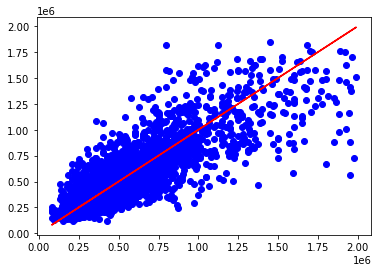

In [64]:
# predictions vs. actual data
plt.scatter(y_test,Price, color="b")
plt.plot(y_test,y_test, color="r")

In [65]:
# Found mean
# Calculated the score
MEA= np.mean(abs(y_test - Price))
score = r2_score(y_test,Price)
print("mean absolute error is:", MEA)
print("score is:", score)

mean absolute error is: 103547.25981537561
score is: 0.6957310260651683


#### Neural Network



In [77]:
scaler = MinMaxScaler()
# fit the scaler and scale training data 
X_train= scaler.fit_transform(x_train)
# scale the test data 
X_test = scaler.transform(x_test)

In [78]:
model = Sequential()
model.add(Input(shape=(42,)))
model.add(Dense(100,activation = "relu"))   # relu - limiting output between 0 and max
model.add(Dense(250,activation = "relu"))
model.add(Dense(200,activation = "relu"))
model.add(Dense(100,activation = "relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss= "mae")
model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs = 200,batch_size =128 )

2022-06-21 18:25:29.178963: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2022-06-21 18:25:29.388944: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-21 18:25:29.405712: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499990000 Hz


Epoch 1/200


  1/134 [..............................] - ETA: 1:31 - loss: 498410.0312

  6/134 [>.............................] - ETA: 1s - loss: 513936.1927  

 14/134 [==>...........................] - ETA: 0s - loss: 514791.1786

 22/134 [===>..........................] - ETA: 0s - loss: 515721.8125

 31/134 [=====>........................] - ETA: 0s - loss: 516379.7883

 38/134 [=======>......................] - ETA: 0s - loss: 517118.6546

 52/134 [==========>...................] - ETA: 0s - loss: 518561.3888

 65/134 [=============>................] - ETA: 0s - loss: 519158.9635

 77/134 [================>.............] - ETA: 0s - loss: 519445.0564

 90/134 [===================>..........] - ETA: 0s - loss: 519092.3635

105/134 [======================>.......] - ETA: 0s - loss: 517581.5702

118/134 [=========================>....] - ETA: 0s - loss: 514663.1793

129/134 [===========================>..] - ETA: 0s - loss: 510657.7636

134/134 [==============================] - 2s 7ms/step - loss: 507966.2771 - val_loss: 179710.3125


Epoch 2/200
  1/134 [..............................] - ETA: 0s - loss: 145823.0000

 15/134 [==>...........................] - ETA: 0s - loss: 170944.6031

 29/134 [=====>........................] - ETA: 0s - loss: 171287.1180

 42/134 [========>.....................] - ETA: 0s - loss: 170504.8977

 54/134 [===========>..................] - ETA: 0s - loss: 169502.4844

 70/134 [==============>...............] - ETA: 0s - loss: 168399.9612

 81/134 [=================>............] - ETA: 0s - loss: 167704.4931

 93/134 [===================>..........] - ETA: 0s - loss: 166935.9689

105/134 [======================>.......] - ETA: 0s - loss: 166252.9997

118/134 [=========================>....] - ETA: 0s - loss: 165451.7885

133/134 [============================>.] - ETA: 0s - loss: 164527.5465

134/134 [==============================] - 1s 5ms/step - loss: 164399.6169 - val_loss: 139981.5156


Epoch 3/200
  1/134 [..............................] - ETA: 0s - loss: 133679.0938

  9/134 [=>............................] - ETA: 0s - loss: 143004.5868

 19/134 [===>..........................] - ETA: 0s - loss: 140299.2467

 30/134 [=====>........................] - ETA: 0s - loss: 138741.2443

 45/134 [=========>....................] - ETA: 0s - loss: 136846.1476

 57/134 [===========>..................] - ETA: 0s - loss: 135775.4038

 70/134 [==============>...............] - ETA: 0s - loss: 134783.7645

 83/134 [=================>............] - ETA: 0s - loss: 133998.0853

 95/134 [====================>.........] - ETA: 0s - loss: 133404.6137

109/134 [=======================>......] - ETA: 0s - loss: 132711.7752

122/134 [==========================>...] - ETA: 0s - loss: 132052.5013

134/134 [==============================] - 1s 5ms/step - loss: 131427.5421 - val_loss: 114497.1484


Epoch 4/200
  1/134 [..............................] - ETA: 0s - loss: 105911.5156

 11/134 [=>............................] - ETA: 0s - loss: 109762.7060

 22/134 [===>..........................] - ETA: 0s - loss: 112022.1016

 31/134 [=====>........................] - ETA: 0s - loss: 112680.6079

 40/134 [=======>......................] - ETA: 0s - loss: 112606.7320

 49/134 [=========>....................] - ETA: 0s - loss: 112429.0424

 56/134 [===========>..................] - ETA: 0s - loss: 112162.7867

 64/134 [=============>................] - ETA: 0s - loss: 111895.4868

 71/134 [==============>...............] - ETA: 0s - loss: 111769.7301

 77/134 [================>.............] - ETA: 0s - loss: 111654.8396

 83/134 [=================>............] - ETA: 0s - loss: 111537.1928

 90/134 [===================>..........] - ETA: 0s - loss: 111414.6669

 98/134 [====================>.........] - ETA: 0s - loss: 111313.8418

111/134 [=======================>......] - ETA: 0s - loss: 111180.9155

122/134 [==========================>...] - ETA: 0s - loss: 111101.7101

129/134 [===========================>..] - ETA: 0s - loss: 111059.2351

134/134 [==============================] - 1s 8ms/step - loss: 111018.8194 - val_loss: 107433.4062


Epoch 5/200
  1/134 [..............................] - ETA: 1s - loss: 90611.8906

 11/134 [=>............................] - ETA: 0s - loss: 114311.9709

 19/134 [===>..........................] - ETA: 0s - loss: 114506.7763

 26/134 [====>.........................] - ETA: 0s - loss: 113629.8630

 31/134 [=====>........................] - ETA: 0s - loss: 113025.1250

 35/134 [======>.......................] - ETA: 0s - loss: 112573.4172

 38/134 [=======>......................] - ETA: 0s - loss: 112267.7054

 42/134 [========>.....................] - ETA: 0s - loss: 111951.4003

 47/134 [=========>....................] - ETA: 0s - loss: 111553.5399

 52/134 [==========>...................] - ETA: 0s - loss: 111122.8008

 60/134 [============>.................] - ETA: 0s - loss: 110666.4277

 69/134 [==============>...............] - ETA: 0s - loss: 110257.3697

 80/134 [================>.............] - ETA: 0s - loss: 109794.8567

 93/134 [===================>..........] - ETA: 0s - loss: 109289.9503

106/134 [======================>.......] - ETA: 0s - loss: 108849.6355

119/134 [=========================>....] - ETA: 0s - loss: 108439.9168

134/134 [==============================] - ETA: 0s - loss: 108070.1101

134/134 [==============================] - 1s 7ms/step - loss: 108047.6363 - val_loss: 104172.4375


Epoch 6/200
  1/134 [..............................] - ETA: 1s - loss: 95762.6797

 13/134 [=>............................] - ETA: 0s - loss: 100231.6130

 25/134 [====>.........................] - ETA: 0s - loss: 100514.9234

 37/134 [=======>......................] - ETA: 0s - loss: 100473.0773

 47/134 [=========>....................] - ETA: 0s - loss: 100652.4840

 61/134 [============>.................] - ETA: 0s - loss: 100961.8804

 72/134 [===============>..............] - ETA: 0s - loss: 101218.5468

 84/134 [=================>............] - ETA: 0s - loss: 101375.1943

 97/134 [====================>.........] - ETA: 0s - loss: 101455.7924

108/134 [=======================>......] - ETA: 0s - loss: 101487.5921

119/134 [=========================>....] - ETA: 0s - loss: 101485.9863

130/134 [============================>.] - ETA: 0s - loss: 101469.1478

134/134 [==============================] - 1s 5ms/step - loss: 101466.1896 - val_loss: 101222.5781


Epoch 7/200
  1/134 [..............................] - ETA: 0s - loss: 98891.9609

 11/134 [=>............................] - ETA: 0s - loss: 98386.7571

 22/134 [===>..........................] - ETA: 0s - loss: 98253.3022

 34/134 [======>.......................] - ETA: 0s - loss: 98218.4841

 47/134 [=========>....................] - ETA: 0s - loss: 98636.0851

 57/134 [===========>..................] - ETA: 0s - loss: 98819.0060

 67/134 [==============>...............] - ETA: 0s - loss: 99056.7810

 77/134 [================>.............] - ETA: 0s - loss: 99236.3476

 88/134 [==================>...........] - ETA: 0s - loss: 99243.8981

 99/134 [=====================>........] - ETA: 0s - loss: 99199.2104

110/134 [=======================>......] - ETA: 0s - loss: 99166.5774

121/134 [==========================>...] - ETA: 0s - loss: 99175.9496

129/134 [===========================>..] - ETA: 0s - loss: 99184.3156

134/134 [==============================] - 1s 6ms/step - loss: 99186.0231 - val_loss: 99429.3438


Epoch 8/200


  1/134 [..............................] - ETA: 0s - loss: 101122.2188



  9/134 [=>............................] - ETA: 0s - loss: 103646.2153

 16/134 [==>...........................] - ETA: 0s - loss: 102702.0063

 21/134 [===>..........................] - ETA: 0s - loss: 101858.6373

 25/134 [====>.........................] - ETA: 1s - loss: 101360.6656

 29/134 [=====>........................] - ETA: 1s - loss: 100852.2532

 34/134 [======>.......................] - ETA: 1s - loss: 100300.9377

 41/134 [========>.....................] - ETA: 0s - loss: 99790.4651 

 47/134 [=========>....................] - ETA: 0s - loss: 99482.4219

 54/134 [===========>..................] - ETA: 0s - loss: 99137.2264

 61/134 [============>.................] - ETA: 0s - loss: 98917.0073

 67/134 [==============>...............] - ETA: 0s - loss: 98859.2577

 74/134 [===============>..............] - ETA: 0s - loss: 98815.0152

 82/134 [=================>............] - ETA: 0s - loss: 98810.0868

 87/134 [==================>...........] - ETA: 0s - loss: 98773.9726

 95/134 [====================>.........] - ETA: 0s - loss: 98711.4275

103/134 [======================>.......] - ETA: 0s - loss: 98664.0083

109/134 [=======================>......] - ETA: 0s - loss: 98608.4837

117/134 [=========================>....] - ETA: 0s - loss: 98550.7569

119/134 [=========================>....] - ETA: 0s - loss: 98538.2346

124/134 [==========================>...] - ETA: 0s - loss: 98506.6339

131/134 [============================>.] - ETA: 0s - loss: 98463.8514

134/134 [==============================] - 1s 10ms/step - loss: 98440.4139 - val_loss: 97725.4453


Epoch 9/200
  1/134 [..............................] - ETA: 1s - loss: 98932.5156

  8/134 [>.............................] - ETA: 0s - loss: 99242.4639

 14/134 [==>...........................] - ETA: 1s - loss: 98298.0045

 20/134 [===>..........................] - ETA: 0s - loss: 97526.6395

 28/134 [=====>........................] - ETA: 0s - loss: 97308.9994

 34/134 [======>.......................] - ETA: 0s - loss: 97127.8727

 40/134 [=======>......................] - ETA: 0s - loss: 96965.9396

 47/134 [=========>....................] - ETA: 0s - loss: 96858.3283

 53/134 [==========>...................] - ETA: 0s - loss: 96710.2848

 59/134 [============>.................] - ETA: 0s - loss: 96562.0927

 66/134 [=============>................] - ETA: 0s - loss: 96495.9779

 73/134 [===============>..............] - ETA: 0s - loss: 96512.8736

 77/134 [================>.............] - ETA: 0s - loss: 96523.1446

 82/134 [=================>............] - ETA: 0s - loss: 96537.2495

 87/134 [==================>...........] - ETA: 0s - loss: 96536.9733

 90/134 [===================>..........] - ETA: 0s - loss: 96542.0917

 96/134 [====================>.........] - ETA: 0s - loss: 96559.4637

101/134 [=====================>........] - ETA: 0s - loss: 96576.6440

106/134 [======================>.......] - ETA: 0s - loss: 96584.7446

110/134 [=======================>......] - ETA: 0s - loss: 96584.6740

117/134 [=========================>....] - ETA: 0s - loss: 96571.0960

125/134 [==========================>...] - ETA: 0s - loss: 96542.9257

132/134 [============================>.] - ETA: 0s - loss: 96523.8039



134/134 [==============================] - 1s 11ms/step - loss: 96513.8962 - val_loss: 96703.3906


Epoch 10/200
  1/134 [..............................] - ETA: 0s - loss: 86803.7031

  9/134 [=>............................] - ETA: 0s - loss: 92932.3186

 17/134 [==>...........................] - ETA: 0s - loss: 92714.6245

 25/134 [====>.........................] - ETA: 0s - loss: 92520.9438

 37/134 [=======>......................] - ETA: 0s - loss: 92765.7050

 51/134 [==========>...................] - ETA: 0s - loss: 93247.2331

 65/134 [=============>................] - ETA: 0s - loss: 93619.5968

 79/134 [================>.............] - ETA: 0s - loss: 93883.1438

 93/134 [===================>..........] - ETA: 0s - loss: 94004.2018

109/134 [=======================>......] - ETA: 0s - loss: 94071.7635

125/134 [==========================>...] - ETA: 0s - loss: 94119.1070

134/134 [==============================] - 1s 5ms/step - loss: 94136.2701 - val_loss: 95114.2578


Epoch 11/200
  1/134 [..............................] - ETA: 0s - loss: 87296.4844

 15/134 [==>...........................] - ETA: 0s - loss: 92095.9151

 31/134 [=====>........................] - ETA: 0s - loss: 92450.2850

 46/134 [=========>....................] - ETA: 0s - loss: 92830.2430

 60/134 [============>.................] - ETA: 0s - loss: 92894.4085

 76/134 [================>.............] - ETA: 0s - loss: 92967.5087

 91/134 [===================>..........] - ETA: 0s - loss: 93005.1761

107/134 [======================>.......] - ETA: 0s - loss: 93065.8290

123/134 [==========================>...] - ETA: 0s - loss: 93050.2631

134/134 [==============================] - 1s 4ms/step - loss: 93037.2872 - val_loss: 94074.9297


Epoch 12/200
  1/134 [..............................] - ETA: 0s - loss: 116806.5469

 16/134 [==>...........................] - ETA: 0s - loss: 101119.4565

 28/134 [=====>........................] - ETA: 0s - loss: 98713.9757 

 37/134 [=======>......................] - ETA: 0s - loss: 97472.3742

 44/134 [========>.....................] - ETA: 0s - loss: 96811.9956

 53/134 [==========>...................] - ETA: 0s - loss: 96170.3306

 63/134 [=============>................] - ETA: 0s - loss: 95593.9260

 74/134 [===============>..............] - ETA: 0s - loss: 95136.6562

 78/134 [================>.............] - ETA: 0s - loss: 94985.3581

 84/134 [=================>............] - ETA: 0s - loss: 94760.0510

 91/134 [===================>..........] - ETA: 0s - loss: 94537.3642

102/134 [=====================>........] - ETA: 0s - loss: 94213.9450

111/134 [=======================>......] - ETA: 0s - loss: 94011.9007

123/134 [==========================>...] - ETA: 0s - loss: 93777.5982

133/134 [============================>.] - ETA: 0s - loss: 93637.2576

134/134 [==============================] - 1s 6ms/step - loss: 93611.8549 - val_loss: 92868.7500


Epoch 13/200


  1/134 [..............................] - ETA: 0s - loss: 82151.7812

 11/134 [=>............................] - ETA: 0s - loss: 88040.5987

 25/134 [====>.........................] - ETA: 0s - loss: 88568.3997

 36/134 [=======>......................] - ETA: 0s - loss: 88838.1866

 45/134 [=========>....................] - ETA: 0s - loss: 88869.7575

 56/134 [===========>..................] - ETA: 0s - loss: 88884.3604

 66/134 [=============>................] - ETA: 0s - loss: 88885.4034

 79/134 [================>.............] - ETA: 0s - loss: 89000.4179

 87/134 [==================>...........] - ETA: 0s - loss: 89084.8938

 97/134 [====================>.........] - ETA: 0s - loss: 89211.1927

110/134 [=======================>......] - ETA: 0s - loss: 89317.5562

124/134 [==========================>...] - ETA: 0s - loss: 89396.0312

134/134 [==============================] - 1s 5ms/step - loss: 89498.4099 - val_loss: 92130.6953


Epoch 14/200
  1/134 [..............................] - ETA: 1s - loss: 103563.5234

 13/134 [=>............................] - ETA: 0s - loss: 89561.1593 

 26/134 [====>.........................] - ETA: 0s - loss: 89753.7879

 41/134 [========>.....................] - ETA: 0s - loss: 89772.3302

 51/134 [==========>...................] - ETA: 0s - loss: 90000.5455

 62/134 [============>.................] - ETA: 0s - loss: 90040.8013

 75/134 [===============>..............] - ETA: 0s - loss: 90046.1370

 89/134 [==================>...........] - ETA: 0s - loss: 90056.6506

102/134 [=====================>........] - ETA: 0s - loss: 90028.3386

113/134 [========================>.....] - ETA: 0s - loss: 90041.8959

125/134 [==========================>...] - ETA: 0s - loss: 90054.5391

134/134 [==============================] - 1s 5ms/step - loss: 90053.3601 - val_loss: 91249.6641


Epoch 15/200
  1/134 [..............................] - ETA: 0s - loss: 83802.7500

 12/134 [=>............................] - ETA: 0s - loss: 87108.0124

 26/134 [====>.........................] - ETA: 0s - loss: 87858.4868

 40/134 [=======>......................] - ETA: 0s - loss: 88362.7881

 47/134 [=========>....................] - ETA: 0s - loss: 88505.1538

 55/134 [===========>..................] - ETA: 0s - loss: 88657.1384

 66/134 [=============>................] - ETA: 0s - loss: 88824.6816

 73/134 [===============>..............] - ETA: 0s - loss: 88864.9680

 79/134 [================>.............] - ETA: 0s - loss: 88912.6647

 90/134 [===================>..........] - ETA: 0s - loss: 88976.5482

100/134 [=====================>........] - ETA: 0s - loss: 89023.3461

107/134 [======================>.......] - ETA: 0s - loss: 89059.4505

117/134 [=========================>....] - ETA: 0s - loss: 89085.5280

129/134 [===========================>..] - ETA: 0s - loss: 89097.5955

134/134 [==============================] - 1s 6ms/step - loss: 89102.0040 - val_loss: 91232.5625


Epoch 16/200
  1/134 [..............................] - ETA: 1s - loss: 86818.9531

 14/134 [==>...........................] - ETA: 0s - loss: 86861.2980

 27/134 [=====>........................] - ETA: 0s - loss: 88089.9988

 33/134 [======>.......................] - ETA: 0s - loss: 88455.0634

 45/134 [=========>....................] - ETA: 0s - loss: 88742.4524

 55/134 [===========>..................] - ETA: 0s - loss: 88787.5416

 68/134 [==============>...............] - ETA: 0s - loss: 88987.9216

 78/134 [================>.............] - ETA: 0s - loss: 89072.1243

 91/134 [===================>..........] - ETA: 0s - loss: 89108.1035

103/134 [======================>.......] - ETA: 0s - loss: 89096.3657

106/134 [======================>.......] - ETA: 0s - loss: 89086.9716

115/134 [========================>.....] - ETA: 0s - loss: 89056.5853

122/134 [==========================>...] - ETA: 0s - loss: 89045.6914

129/134 [===========================>..] - ETA: 0s - loss: 89032.9944

134/134 [==============================] - 1s 6ms/step - loss: 89014.5827 - val_loss: 89948.1094


Epoch 17/200
  1/134 [..............................] - ETA: 0s - loss: 89689.8438

 13/134 [=>............................] - ETA: 0s - loss: 88897.6526

 25/134 [====>.........................] - ETA: 0s - loss: 87398.4806

 36/134 [=======>......................] - ETA: 0s - loss: 87037.1252

 50/134 [==========>...................] - ETA: 0s - loss: 87086.6377

 65/134 [=============>................] - ETA: 0s - loss: 87330.6833

 80/134 [================>.............] - ETA: 0s - loss: 87522.8438

 91/134 [===================>..........] - ETA: 0s - loss: 87607.0634

101/134 [=====================>........] - ETA: 0s - loss: 87638.7724

113/134 [========================>.....] - ETA: 0s - loss: 87678.2534

123/134 [==========================>...] - ETA: 0s - loss: 87714.1428

132/134 [============================>.] - ETA: 0s - loss: 87744.8388

134/134 [==============================] - 1s 5ms/step - loss: 87752.1970 - val_loss: 89536.7031


Epoch 18/200
  1/134 [..............................] - ETA: 0s - loss: 87630.5000

  9/134 [=>............................] - ETA: 0s - loss: 90518.9323

 17/134 [==>...........................] - ETA: 0s - loss: 90589.6540

 25/134 [====>.........................] - ETA: 0s - loss: 90370.4359

 34/134 [======>.......................] - ETA: 0s - loss: 90027.2748

 43/134 [========>.....................] - ETA: 0s - loss: 89858.5785

 53/134 [==========>...................] - ETA: 0s - loss: 89513.2764

 65/134 [=============>................] - ETA: 0s - loss: 89253.0683

 77/134 [================>.............] - ETA: 0s - loss: 89100.0198

 86/134 [==================>...........] - ETA: 0s - loss: 88967.7784

 98/134 [====================>.........] - ETA: 0s - loss: 88796.1060

109/134 [=======================>......] - ETA: 0s - loss: 88646.8356

118/134 [=========================>....] - ETA: 0s - loss: 88559.9045

127/134 [===========================>..] - ETA: 0s - loss: 88492.3011

134/134 [==============================] - 1s 6ms/step - loss: 88438.3565 - val_loss: 89244.6797


Epoch 19/200
  1/134 [..............................] - ETA: 2s - loss: 91434.2031

 13/134 [=>............................] - ETA: 0s - loss: 90914.0343

 25/134 [====>.........................] - ETA: 0s - loss: 88677.6481

 35/134 [======>.......................] - ETA: 0s - loss: 88096.5212

 48/134 [=========>....................] - ETA: 0s - loss: 87769.0902

 59/134 [============>.................] - ETA: 0s - loss: 87553.9094

 71/134 [==============>...............] - ETA: 0s - loss: 87436.5424

 83/134 [=================>............] - ETA: 0s - loss: 87331.2011

 92/134 [===================>..........] - ETA: 0s - loss: 87264.0477

103/134 [======================>.......] - ETA: 0s - loss: 87186.0655

118/134 [=========================>....] - ETA: 0s - loss: 87099.2810

131/134 [============================>.] - ETA: 0s - loss: 87057.8456

134/134 [==============================] - 1s 5ms/step - loss: 87053.2009 - val_loss: 88684.1328


Epoch 20/200
  1/134 [..............................] - ETA: 1s - loss: 85863.7344

 13/134 [=>............................] - ETA: 0s - loss: 88794.1412

 24/134 [====>.........................] - ETA: 0s - loss: 88411.8854

 33/134 [======>.......................] - ETA: 0s - loss: 88020.6683

 45/134 [=========>....................] - ETA: 0s - loss: 87758.5193

 57/134 [===========>..................] - ETA: 0s - loss: 87580.7072

 68/134 [==============>...............] - ETA: 0s - loss: 87541.8779

 77/134 [================>.............] - ETA: 0s - loss: 87475.6248

 81/134 [=================>............] - ETA: 0s - loss: 87447.5854

 88/134 [==================>...........] - ETA: 0s - loss: 87422.4905

 96/134 [====================>.........] - ETA: 0s - loss: 87372.8553

107/134 [======================>.......] - ETA: 0s - loss: 87278.9706

113/134 [========================>.....] - ETA: 0s - loss: 87235.1910

125/134 [==========================>...] - ETA: 0s - loss: 87171.6496

134/134 [==============================] - 1s 6ms/step - loss: 87127.3797 - val_loss: 88190.7109


Epoch 21/200
  1/134 [..............................] - ETA: 1s - loss: 84611.2812

 13/134 [=>............................] - ETA: 0s - loss: 84708.9742

 26/134 [====>.........................] - ETA: 0s - loss: 85326.6935

 37/134 [=======>......................] - ETA: 0s - loss: 85598.9003

 49/134 [=========>....................] - ETA: 0s - loss: 85503.5815

 62/134 [============>.................] - ETA: 0s - loss: 85321.4239

 74/134 [===============>..............] - ETA: 0s - loss: 85264.7728

 86/134 [==================>...........] - ETA: 0s - loss: 85323.4984

 96/134 [====================>.........] - ETA: 0s - loss: 85376.1112

107/134 [======================>.......] - ETA: 0s - loss: 85406.0431

118/134 [=========================>....] - ETA: 0s - loss: 85433.3414

130/134 [============================>.] - ETA: 0s - loss: 85491.5418

134/134 [==============================] - 1s 5ms/step - loss: 85523.1311 - val_loss: 87964.6250


Epoch 22/200


  1/134 [..............................] - ETA: 2s - loss: 74748.3281

 11/134 [=>............................] - ETA: 0s - loss: 78607.8260

 24/134 [====>.........................] - ETA: 0s - loss: 80648.1875

 36/134 [=======>......................] - ETA: 0s - loss: 81964.8759

 48/134 [=========>....................] - ETA: 0s - loss: 82713.9406

 62/134 [============>.................] - ETA: 0s - loss: 83223.9545

 76/134 [================>.............] - ETA: 0s - loss: 83672.7294

 91/134 [===================>..........] - ETA: 0s - loss: 83992.5205

103/134 [======================>.......] - ETA: 0s - loss: 84199.4704

116/134 [========================>.....] - ETA: 0s - loss: 84342.6408

129/134 [===========================>..] - ETA: 0s - loss: 84476.8864

134/134 [==============================] - 1s 5ms/step - loss: 84540.8128 - val_loss: 87554.2734


Epoch 23/200
  1/134 [..............................] - ETA: 1s - loss: 83560.9219

  8/134 [>.............................] - ETA: 0s - loss: 88584.4473

 21/134 [===>..........................] - ETA: 0s - loss: 87126.0960

 34/134 [======>.......................] - ETA: 0s - loss: 86384.1213

 44/134 [========>.....................] - ETA: 0s - loss: 86170.2550

 55/134 [===========>..................] - ETA: 0s - loss: 86028.2436

 65/134 [=============>................] - ETA: 0s - loss: 86009.7826

 77/134 [================>.............] - ETA: 0s - loss: 86100.0751

 90/134 [===================>..........] - ETA: 0s - loss: 86101.8594

101/134 [=====================>........] - ETA: 0s - loss: 86026.8507

112/134 [========================>.....] - ETA: 0s - loss: 85957.6106

124/134 [==========================>...] - ETA: 0s - loss: 85904.3265

134/134 [==============================] - 1s 5ms/step - loss: 85871.9143 - val_loss: 87728.7266


Epoch 24/200
  1/134 [..............................] - ETA: 1s - loss: 89025.3125

 10/134 [=>............................] - ETA: 0s - loss: 91887.9781

 18/134 [===>..........................] - ETA: 0s - loss: 90356.3876

 25/134 [====>.........................] - ETA: 0s - loss: 89538.4350

 34/134 [======>.......................] - ETA: 0s - loss: 88947.5241

 46/134 [=========>....................] - ETA: 0s - loss: 88545.8645

 55/134 [===========>..................] - ETA: 0s - loss: 88258.0982

 59/134 [============>.................] - ETA: 0s - loss: 88160.0862

 64/134 [=============>................] - ETA: 0s - loss: 88023.1819

 72/134 [===============>..............] - ETA: 0s - loss: 87817.0187

 80/134 [================>.............] - ETA: 0s - loss: 87621.5414

 88/134 [==================>...........] - ETA: 0s - loss: 87457.1530

 97/134 [====================>.........] - ETA: 0s - loss: 87257.6699

104/134 [======================>.......] - ETA: 0s - loss: 87117.6113

115/134 [========================>.....] - ETA: 0s - loss: 86930.7878

123/134 [==========================>...] - ETA: 0s - loss: 86826.8027

132/134 [============================>.] - ETA: 0s - loss: 86731.8018

134/134 [==============================] - 1s 7ms/step - loss: 86701.4850 - val_loss: 87216.3906


Epoch 25/200
  1/134 [..............................] - ETA: 1s - loss: 101789.2344

  9/134 [=>............................] - ETA: 0s - loss: 92390.2101 

 21/134 [===>..........................] - ETA: 0s - loss: 88504.6310

 31/134 [=====>........................] - ETA: 0s - loss: 87251.4327

 44/134 [========>.....................] - ETA: 0s - loss: 86495.3615

 57/134 [===========>..................] - ETA: 0s - loss: 86039.9507

 69/134 [==============>...............] - ETA: 0s - loss: 85761.2888

 80/134 [================>.............] - ETA: 0s - loss: 85623.1508

 90/134 [===================>..........] - ETA: 0s - loss: 85536.7082

103/134 [======================>.......] - ETA: 0s - loss: 85485.8180

117/134 [=========================>....] - ETA: 0s - loss: 85476.8673

126/134 [===========================>..] - ETA: 0s - loss: 85457.6273

134/134 [==============================] - ETA: 0s - loss: 85434.1427

134/134 [==============================] - 1s 6ms/step - loss: 85431.8707 - val_loss: 86635.4219


Epoch 26/200
  1/134 [..............................] - ETA: 1s - loss: 80960.3594

 12/134 [=>............................] - ETA: 0s - loss: 82609.2148

 23/134 [====>.........................] - ETA: 0s - loss: 83551.2330

 35/134 [======>.......................] - ETA: 0s - loss: 83801.5092

 49/134 [=========>....................] - ETA: 0s - loss: 84049.3106

 59/134 [============>.................] - ETA: 0s - loss: 84063.8590

 71/134 [==============>...............] - ETA: 0s - loss: 84105.4329

 83/134 [=================>............] - ETA: 0s - loss: 84137.7293

 94/134 [====================>.........] - ETA: 0s - loss: 84156.0244

109/134 [=======================>......] - ETA: 0s - loss: 84163.4477

119/134 [=========================>....] - ETA: 0s - loss: 84163.1670

130/134 [============================>.] - ETA: 0s - loss: 84215.8568

134/134 [==============================] - 1s 5ms/step - loss: 84241.6670 - val_loss: 86765.6094


Epoch 27/200
  1/134 [..............................] - ETA: 0s - loss: 97215.1719

 13/134 [=>............................] - ETA: 0s - loss: 86663.8654

 24/134 [====>.........................] - ETA: 0s - loss: 85551.3929

 36/134 [=======>......................] - ETA: 0s - loss: 85130.0970

 47/134 [=========>....................] - ETA: 0s - loss: 84947.7133

 59/134 [============>.................] - ETA: 0s - loss: 84809.6634

 72/134 [===============>..............] - ETA: 0s - loss: 84773.5720

 86/134 [==================>...........] - ETA: 0s - loss: 84769.4337

 99/134 [=====================>........] - ETA: 0s - loss: 84771.4741

109/134 [=======================>......] - ETA: 0s - loss: 84771.7013

121/134 [==========================>...] - ETA: 0s - loss: 84769.4003

<AxesSubplot:>

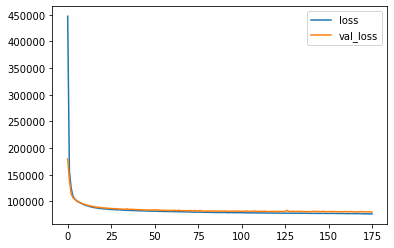

In [80]:
losses= pd.DataFrame(model.history.history)
losses.plot()

NameError: name 'losses' is not defined

In [81]:
# predict using the test data 
predictions = model.predict(X_test)
# evaluate the model
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))

80285.83303654834
125102.59858442693


In [35]:
# calcuate the score
r2_score(y_test,predictions)

0.813830142543026

In [44]:
# Save our model
housePrice = pd.read_csv("Data/kc_house_data.csv")
zipcodedf = pd.read_csv("Data/usa_zipcode_of_wa.csv")

zipcodedf = zipcodedf.dropna(subset=['City'])
zipcodedf = zipcodedf.rename(columns = {"zip":"zipcode"})

zipcodedf['zipcode'] = zipcodedf['zipcode'].astype(int)
merged_zip = pd.merge(zipcodedf, housePrice, on ="zipcode")

encon = LabelEncoder()
merged_zip['City'] = encon.fit_transform(merged_zip['City'])

# Drop not useful columns
merged_zip = merged_zip.drop(['zipcode', 'Zipcode name', 'id', 'State', 'lat', 'long', 'County Name'], axis = 1)

# remove outliers
merged_zip = merged_zip[merged_zip['price'] < 2e6] 

# convert date into datetime and split year, month, and day from it
merged_zip['date'] = pd.to_datetime(merged_zip['date'])
merged_zip['year'] = merged_zip['date'].dt.year
merged_zip['month'] = merged_zip['date'].dt.month


# calculate house age starting from the year that the house was sold
merged_zip = merged_zip.drop(["date"],axis = 1)
merged_zip['yr_age'] = abs(merged_zip['year'] - merged_zip["yr_built"])

# use 0 and 1 to represent whether the house is renewed or not
merged_zip['renovation'] = np.where(merged_zip['yr_renovated']==0,0,1)
merged_zip.drop(['yr_renovated'], inplace=True, axis=1)



# get features as X and response as y
X = merged_zip.drop(["price"], axis = 1)
y = merged_zip["price"]



x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
# fit the scaler and scale training data 
X_train= scaler.fit_transform(x_train)
# scale the test data 
X_test = scaler.transform(x_test)


In [46]:
model = Sequential()
model.add(Input(shape=(19,)))
model.add(Dense(100,kernel_initializer='uniform', activation = "relu"))   # relu - limiting output between 0 and max
model.add(Dense(250,activation = "relu"))
model.add(Dense(250,activation = "relu"))
model.add(Dense(100,activation = "relu"))
model.add(Dense(1))
opt = Adam(learning_rate = 0.1)
model.compile(optimizer = opt, loss = 'mae')
model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs = 400,batch_size =64 )

Epoch 1/400


  1/268 [..............................] - ETA: 2:31 - loss: 490624.2188

 12/268 [>.............................] - ETA: 1s - loss: 427463.6562  

 24/268 [=>............................] - ETA: 1s - loss: 361140.7578

 35/268 [==>...........................] - ETA: 1s - loss: 328242.1987

 52/268 [====>.........................] - ETA: 0s - loss: 295851.5661

 67/268 [======>.......................] - ETA: 0s - loss: 276423.4438

 83/268 [========>.....................] - ETA: 0s - loss: 260953.7361

 94/268 [=========>....................] - ETA: 0s - loss: 252512.4774

111/268 [===========>..................] - ETA: 0s - loss: 241768.1313

130/268 [=============>................] - ETA: 0s - loss: 231917.9784

145/268 [===============>..............] - ETA: 0s - loss: 225390.2875

162/268 [=================>............] - ETA: 0s - loss: 219063.1753

179/268 [===================>..........] - ETA: 0s - loss: 213609.3355

198/268 [=====================>........] - ETA: 0s - loss: 208514.7136

215/268 [=======================>......] - ETA: 0s - loss: 204631.9132

232/268 [========================>.....] - ETA: 0s - loss: 201209.4438

249/268 [==========================>...] - ETA: 0s - loss: 198122.8242

267/268 [============================>.] - ETA: 0s - loss: 195159.2487

268/268 [==============================] - 2s 6ms/step - loss: 194847.7149 - val_loss: 137487.8750


Epoch 2/400
  1/268 [..............................] - ETA: 2s - loss: 114325.9141

 16/268 [>.............................] - ETA: 0s - loss: 119743.2773

 25/268 [=>............................] - ETA: 1s - loss: 120796.3759

 35/268 [==>...........................] - ETA: 1s - loss: 121648.8917

 44/268 [===>..........................] - ETA: 1s - loss: 122596.6135

 54/268 [=====>........................] - ETA: 1s - loss: 123266.0203

 65/268 [======>.......................] - ETA: 0s - loss: 123632.5707

 74/268 [=======>......................] - ETA: 0s - loss: 124012.6943

 88/268 [========>.....................] - ETA: 0s - loss: 124780.5974

101/268 [==========>...................] - ETA: 0s - loss: 125476.7208

116/268 [===========>..................] - ETA: 0s - loss: 125906.2647

126/268 [=============>................] - ETA: 0s - loss: 126065.2507

142/268 [==============>...............] - ETA: 0s - loss: 126276.4850

161/268 [=================>............] - ETA: 0s - loss: 126525.6133

178/268 [==================>...........] - ETA: 0s - loss: 126645.3109

196/268 [====================>.........] - ETA: 0s - loss: 126686.5848

210/268 [======================>.......] - ETA: 0s - loss: 126704.3596

224/268 [========================>.....] - ETA: 0s - loss: 126719.6880

238/268 [=========================>....] - ETA: 0s - loss: 126742.0787

253/268 [===========================>..] - ETA: 0s - loss: 126764.9160

267/268 [============================>.] - ETA: 0s - loss: 126802.2952

268/268 [==============================] - 1s 4ms/step - loss: 126807.2524 - val_loss: 121305.4219


Epoch 3/400
  1/268 [..............................] - ETA: 2s - loss: 107657.7656

 17/268 [>.............................] - ETA: 0s - loss: 122901.3359

 34/268 [==>...........................] - ETA: 0s - loss: 124449.2227

 48/268 [====>.........................] - ETA: 0s - loss: 125253.1885

 63/268 [======>.......................] - ETA: 0s - loss: 125250.8271

 80/268 [=======>......................] - ETA: 0s - loss: 125097.6455

 89/268 [========>.....................] - ETA: 0s - loss: 124973.8574

 97/268 [=========>....................] - ETA: 0s - loss: 124842.2904

106/268 [==========>...................] - ETA: 0s - loss: 124772.5904

115/268 [===========>..................] - ETA: 0s - loss: 124744.0769

122/268 [============>.................] - ETA: 0s - loss: 124720.7645

132/268 [=============>................] - ETA: 0s - loss: 124659.9130

141/268 [==============>...............] - ETA: 0s - loss: 124598.5156

156/268 [================>.............] - ETA: 0s - loss: 124537.2807

171/268 [==================>...........] - ETA: 0s - loss: 124476.5501

189/268 [====================>.........] - ETA: 0s - loss: 124430.3475

208/268 [======================>.......] - ETA: 0s - loss: 124421.0464

225/268 [========================>.....] - ETA: 0s - loss: 124386.3219

244/268 [==========================>...] - ETA: 0s - loss: 124345.7309

262/268 [============================>.] - ETA: 0s - loss: 124308.7166

268/268 [==============================] - 1s 4ms/step - loss: 124291.3306 - val_loss: 117966.3438


Epoch 4/400


  1/268 [..............................] - ETA: 2s - loss: 124511.7578

 19/268 [=>............................] - ETA: 0s - loss: 116329.0707

 33/268 [==>...........................] - ETA: 0s - loss: 117028.7531

 49/268 [====>.........................] - ETA: 0s - loss: 119179.9659

 64/268 [======>.......................] - ETA: 0s - loss: 121075.6851

 77/268 [=======>......................] - ETA: 0s - loss: 122028.7011

 89/268 [========>.....................] - ETA: 0s - loss: 122522.8845

101/268 [==========>...................] - ETA: 0s - loss: 122812.9330

110/268 [===========>..................] - ETA: 0s - loss: 122875.3831

119/268 [============>.................] - ETA: 0s - loss: 122879.8281

127/268 [=============>................] - ETA: 0s - loss: 122888.6391

136/268 [==============>...............] - ETA: 0s - loss: 122883.3338

146/268 [===============>..............] - ETA: 0s - loss: 122851.7513

156/268 [================>.............] - ETA: 0s - loss: 122801.7076

166/268 [=================>............] - ETA: 0s - loss: 122732.9521

176/268 [==================>...........] - ETA: 0s - loss: 122647.5626

186/268 [===================>..........] - ETA: 0s - loss: 122570.2075

195/268 [====================>.........] - ETA: 0s - loss: 122505.9639

206/268 [======================>.......] - ETA: 0s - loss: 122418.6464

216/268 [=======================>......] - ETA: 0s - loss: 122347.6881

220/268 [=======================>......] - ETA: 0s - loss: 122329.6107

228/268 [========================>.....] - ETA: 0s - loss: 122303.3599

235/268 [=========================>....] - ETA: 0s - loss: 122280.5783

243/268 [==========================>...] - ETA: 0s - loss: 122259.1257

252/268 [===========================>..] - ETA: 0s - loss: 122234.5775

261/268 [============================>.] - ETA: 0s - loss: 122212.1381

268/268 [==============================] - 1s 6ms/step - loss: 122202.4890 - val_loss: 135865.6875


Epoch 5/400
  1/268 [..............................] - ETA: 3s - loss: 138827.9688

 16/268 [>.............................] - ETA: 0s - loss: 127690.3315

 33/268 [==>...........................] - ETA: 0s - loss: 123096.5059

 52/268 [====>.........................] - ETA: 0s - loss: 121864.9117

 68/268 [======>.......................] - ETA: 0s - loss: 121294.2740

 86/268 [========>.....................] - ETA: 0s - loss: 120838.0588

104/268 [==========>...................] - ETA: 0s - loss: 120733.4286

120/268 [============>.................] - ETA: 0s - loss: 120673.1673

134/268 [==============>...............] - ETA: 0s - loss: 120698.6564

150/268 [===============>..............] - ETA: 0s - loss: 120667.6416

165/268 [=================>............] - ETA: 0s - loss: 120595.4372

180/268 [===================>..........] - ETA: 0s - loss: 120574.4185

196/268 [====================>.........] - ETA: 0s - loss: 120658.7437

215/268 [=======================>......] - ETA: 0s - loss: 120806.0399

233/268 [=========================>....] - ETA: 0s - loss: 120886.1537

251/268 [===========================>..] - ETA: 0s - loss: 120932.0599

264/268 [============================>.] - ETA: 0s - loss: 120942.2894

268/268 [==============================] - 1s 4ms/step - loss: 120940.4841 - val_loss: 120338.4141


Epoch 6/400
  1/268 [..............................] - ETA: 1s - loss: 106495.8750

 18/268 [=>............................] - ETA: 0s - loss: 126970.1949

 36/268 [===>..........................] - ETA: 0s - loss: 124462.0673

 52/268 [====>.........................] - ETA: 0s - loss: 122145.9868

 69/268 [======>.......................] - ETA: 0s - loss: 121130.7005

 85/268 [========>.....................] - ETA: 0s - loss: 120363.1214

101/268 [==========>...................] - ETA: 0s - loss: 119823.9175

116/268 [===========>..................] - ETA: 0s - loss: 119482.6456

122/268 [============>.................] - ETA: 0s - loss: 119350.8484

132/268 [=============>................] - ETA: 0s - loss: 119147.9785

140/268 [==============>...............] - ETA: 0s - loss: 119009.4193

148/268 [===============>..............] - ETA: 0s - loss: 118914.9701

156/268 [================>.............] - ETA: 0s - loss: 118814.9577

164/268 [=================>............] - ETA: 0s - loss: 118721.2105

174/268 [==================>...........] - ETA: 0s - loss: 118605.4903

187/268 [===================>..........] - ETA: 0s - loss: 118482.5678

200/268 [=====================>........] - ETA: 0s - loss: 118370.1376

217/268 [=======================>......] - ETA: 0s - loss: 118270.0472

233/268 [=========================>....] - ETA: 0s - loss: 118216.7499

246/268 [==========================>...] - ETA: 0s - loss: 118179.5359

261/268 [============================>.] - ETA: 0s - loss: 118146.7447

268/268 [==============================] - 1s 4ms/step - loss: 118124.8647 - val_loss: 133947.7656


Epoch 7/400
  1/268 [..............................] - ETA: 1s - loss: 126681.3516

 18/268 [=>............................] - ETA: 0s - loss: 125794.3294

 35/268 [==>...........................] - ETA: 0s - loss: 122017.6127

 53/268 [====>.........................] - ETA: 0s - loss: 119966.2330

 69/268 [======>.......................] - ETA: 0s - loss: 119047.1342

 86/268 [========>.....................] - ETA: 0s - loss: 118321.9655

102/268 [==========>...................] - ETA: 0s - loss: 117916.9763

123/268 [============>.................] - ETA: 0s - loss: 117516.4255

135/268 [==============>...............] - ETA: 0s - loss: 117339.9092

153/268 [================>.............] - ETA: 0s - loss: 117126.5134

171/268 [==================>...........] - ETA: 0s - loss: 116994.9395

186/268 [===================>..........] - ETA: 0s - loss: 116911.5158

203/268 [=====================>........] - ETA: 0s - loss: 116839.9467

219/268 [=======================>......] - ETA: 0s - loss: 116793.9414

229/268 [========================>.....] - ETA: 0s - loss: 116784.5526

244/268 [==========================>...] - ETA: 0s - loss: 116749.6280

262/268 [============================>.] - ETA: 0s - loss: 116688.6960

268/268 [==============================] - 1s 4ms/step - loss: 116663.6353 - val_loss: 117565.0547


Epoch 8/400
  1/268 [..............................] - ETA: 2s - loss: 124724.2266

 18/268 [=>............................] - ETA: 0s - loss: 120295.8954

 34/268 [==>...........................] - ETA: 0s - loss: 118925.4876

 52/268 [====>.........................] - ETA: 0s - loss: 118646.0527

 68/268 [======>.......................] - ETA: 0s - loss: 118856.0300

 84/268 [========>.....................] - ETA: 0s - loss: 118886.8876

100/268 [==========>...................] - ETA: 0s - loss: 118730.5749

115/268 [===========>..................] - ETA: 0s - loss: 118511.2169

130/268 [=============>................] - ETA: 0s - loss: 118250.4835

149/268 [===============>..............] - ETA: 0s - loss: 118000.1904

165/268 [=================>............] - ETA: 0s - loss: 117835.8700

181/268 [===================>..........] - ETA: 0s - loss: 117700.1923

200/268 [=====================>........] - ETA: 0s - loss: 117571.1129

215/268 [=======================>......] - ETA: 0s - loss: 117486.0983

232/268 [========================>.....] - ETA: 0s - loss: 117408.5582

248/268 [==========================>...] - ETA: 0s - loss: 117318.4653

266/268 [============================>.] - ETA: 0s - loss: 117213.1104

268/268 [==============================] - 1s 4ms/step - loss: 117197.8262 - val_loss: 116501.5156


Epoch 9/400
  1/268 [..............................] - ETA: 1s - loss: 113835.7344

 10/268 [>.............................] - ETA: 1s - loss: 121979.6836

 19/268 [=>............................] - ETA: 1s - loss: 122232.8882

 32/268 [==>...........................] - ETA: 1s - loss: 121077.2295

 43/268 [===>..........................] - ETA: 1s - loss: 120285.4489

 53/268 [====>.........................] - ETA: 1s - loss: 119618.6523

 62/268 [=====>........................] - ETA: 1s - loss: 119005.2787

 70/268 [======>.......................] - ETA: 1s - loss: 118541.8666

 88/268 [========>.....................] - ETA: 0s - loss: 117912.6589

 96/268 [=========>....................] - ETA: 0s - loss: 117696.3924

108/268 [===========>..................] - ETA: 0s - loss: 117382.9240

118/268 [============>.................] - ETA: 0s - loss: 117131.7748

126/268 [=============>................] - ETA: 0s - loss: 116982.4782

132/268 [=============>................] - ETA: 0s - loss: 116901.9431

139/268 [==============>...............] - ETA: 0s - loss: 116819.9341

147/268 [===============>..............] - ETA: 0s - loss: 116721.0587

156/268 [================>.............] - ETA: 0s - loss: 116629.8938

164/268 [=================>............] - ETA: 0s - loss: 116549.2607

176/268 [==================>...........] - ETA: 0s - loss: 116449.6179

184/268 [===================>..........] - ETA: 0s - loss: 116391.1746

199/268 [=====================>........] - ETA: 0s - loss: 116285.9243

213/268 [======================>.......] - ETA: 0s - loss: 116244.9074

230/268 [========================>.....] - ETA: 0s - loss: 116250.1122

250/268 [==========================>...] - ETA: 0s - loss: 116286.0584

268/268 [==============================] - 1s 5ms/step - loss: 116300.5459 - val_loss: 113711.7109


Epoch 10/400
  1/268 [..............................] - ETA: 2s - loss: 145185.8750

 17/268 [>.............................] - ETA: 0s - loss: 118832.9871

 35/268 [==>...........................] - ETA: 0s - loss: 116115.4629

 54/268 [=====>........................] - ETA: 0s - loss: 115449.5124

 73/268 [=======>......................] - ETA: 0s - loss: 115128.2417

 88/268 [========>.....................] - ETA: 0s - loss: 115097.4503

103/268 [==========>...................] - ETA: 0s - loss: 115028.1065

120/268 [============>.................] - ETA: 0s - loss: 115019.3849

139/268 [==============>...............] - ETA: 0s - loss: 115067.3816

154/268 [================>.............] - ETA: 0s - loss: 115147.5047

169/268 [=================>............] - ETA: 0s - loss: 115267.5527

187/268 [===================>..........] - ETA: 0s - loss: 115356.5271

206/268 [======================>.......] - ETA: 0s - loss: 115400.9240

218/268 [=======================>......] - ETA: 0s - loss: 115403.4943

234/268 [=========================>....] - ETA: 0s - loss: 115382.5225

252/268 [===========================>..] - ETA: 0s - loss: 115357.2389

268/268 [==============================] - 1s 4ms/step - loss: 115333.6207 - val_loss: 114968.7422


Epoch 11/400
  1/268 [..............................] - ETA: 3s - loss: 128421.9531

 14/268 [>.............................] - ETA: 0s - loss: 110765.8460

 30/268 [==>...........................] - ETA: 0s - loss: 110117.4909

 45/268 [====>.........................] - ETA: 0s - loss: 110688.9939

 57/268 [=====>........................] - ETA: 0s - loss: 111067.2019

 70/268 [======>.......................] - ETA: 0s - loss: 111565.4480

 88/268 [========>.....................] - ETA: 0s - loss: 112050.7381

100/268 [==========>...................] - ETA: 0s - loss: 112191.2759

112/268 [===========>..................] - ETA: 0s - loss: 112295.2709

124/268 [============>.................] - ETA: 0s - loss: 112404.2142

134/268 [==============>...............] - ETA: 0s - loss: 112503.9379

146/268 [===============>..............] - ETA: 0s - loss: 112633.8098

159/268 [================>.............] - ETA: 0s - loss: 112767.0653

173/268 [==================>...........] - ETA: 0s - loss: 112910.1807

189/268 [====================>.........] - ETA: 0s - loss: 113055.6026

204/268 [=====================>........] - ETA: 0s - loss: 113178.7104

224/268 [========================>.....] - ETA: 0s - loss: 113394.7710

241/268 [=========================>....] - ETA: 0s - loss: 113537.5328

258/268 [===========================>..] - ETA: 0s - loss: 113627.1797

268/268 [==============================] - 1s 4ms/step - loss: 113673.4856 - val_loss: 114272.0781


Epoch 12/400


  1/268 [..............................] - ETA: 3s - loss: 108198.0938

 16/268 [>.............................] - ETA: 0s - loss: 123341.8081

 30/268 [==>...........................] - ETA: 0s - loss: 120626.6086

 46/268 [====>.........................] - ETA: 0s - loss: 119161.8577

 54/268 [=====>........................] - ETA: 0s - loss: 118576.4978

 68/268 [======>.......................] - ETA: 0s - loss: 117993.1482

 83/268 [========>.....................] - ETA: 0s - loss: 117495.3496

 97/268 [=========>....................] - ETA: 0s - loss: 117078.9414

114/268 [===========>..................] - ETA: 0s - loss: 116706.0811

129/268 [=============>................] - ETA: 0s - loss: 116436.5243

142/268 [==============>...............] - ETA: 0s - loss: 116242.4475

162/268 [=================>............] - ETA: 0s - loss: 115952.7097

172/268 [==================>...........] - ETA: 0s - loss: 115844.8379

182/268 [===================>..........] - ETA: 0s - loss: 115731.1039

196/268 [====================>.........] - ETA: 0s - loss: 115559.7603

212/268 [======================>.......] - ETA: 0s - loss: 115383.3314

229/268 [========================>.....] - ETA: 0s - loss: 115215.4719

246/268 [==========================>...] - ETA: 0s - loss: 115040.2289

262/268 [============================>.] - ETA: 0s - loss: 114893.0771

268/268 [==============================] - 1s 4ms/step - loss: 114837.4934 - val_loss: 112263.4688


Epoch 13/400
  1/268 [..............................] - ETA: 2s - loss: 102702.2656

 11/268 [>.............................] - ETA: 1s - loss: 106951.3956

 20/268 [=>............................] - ETA: 1s - loss: 109384.7137

 30/268 [==>...........................] - ETA: 1s - loss: 109608.2990

 42/268 [===>..........................] - ETA: 1s - loss: 109555.0465

 47/268 [====>.........................] - ETA: 1s - loss: 109532.7468

 58/268 [=====>........................] - ETA: 1s - loss: 109448.8920

 68/268 [======>.......................] - ETA: 1s - loss: 109476.6457

 82/268 [========>.....................] - ETA: 0s - loss: 109442.7830

 96/268 [=========>....................] - ETA: 0s - loss: 109485.7681

109/268 [===========>..................] - ETA: 0s - loss: 109448.7861

123/268 [============>.................] - ETA: 0s - loss: 109503.4245

140/268 [==============>...............] - ETA: 0s - loss: 109593.8244

158/268 [================>.............] - ETA: 0s - loss: 109651.2601

176/268 [==================>...........] - ETA: 0s - loss: 109758.6588

194/268 [====================>.........] - ETA: 0s - loss: 109886.5865

213/268 [======================>.......] - ETA: 0s - loss: 110043.1605

230/268 [========================>.....] - ETA: 0s - loss: 110175.7551

249/268 [==========================>...] - ETA: 0s - loss: 110316.9329

268/268 [==============================] - 1s 4ms/step - loss: 110457.7695 - val_loss: 111400.5703


Epoch 14/400
  1/268 [..............................] - ETA: 1s - loss: 122653.1016

 11/268 [>.............................] - ETA: 1s - loss: 108550.0376

 25/268 [=>............................] - ETA: 1s - loss: 110199.2191

 44/268 [===>..........................] - ETA: 0s - loss: 112558.7754

 62/268 [=====>........................] - ETA: 0s - loss: 113345.0832

 82/268 [========>.....................] - ETA: 0s - loss: 113312.7323

 86/268 [========>.....................] - ETA: 0s - loss: 113251.5751

 98/268 [=========>....................] - ETA: 0s - loss: 113071.7899

111/268 [===========>..................] - ETA: 0s - loss: 112947.9007

121/268 [============>.................] - ETA: 0s - loss: 112940.3398

130/268 [=============>................] - ETA: 0s - loss: 112983.0051

138/268 [==============>...............] - ETA: 0s - loss: 113012.9899

149/268 [===============>..............] - ETA: 0s - loss: 113015.4907

164/268 [=================>............] - ETA: 0s - loss: 113012.7134

180/268 [===================>..........] - ETA: 0s - loss: 112993.3906

197/268 [=====================>........] - ETA: 0s - loss: 112965.1474

213/268 [======================>.......] - ETA: 0s - loss: 112939.8115

229/268 [========================>.....] - ETA: 0s - loss: 112920.3408

245/268 [==========================>...] - ETA: 0s - loss: 112916.5572

262/268 [============================>.] - ETA: 0s - loss: 112914.1157

268/268 [==============================] - 1s 4ms/step - loss: 112911.7199 - val_loss: 108885.8438


Epoch 15/400
  1/268 [..............................] - ETA: 2s - loss: 113250.9219

 17/268 [>.............................] - ETA: 0s - loss: 107954.4214

 34/268 [==>...........................] - ETA: 0s - loss: 108114.1838

 51/268 [====>.........................] - ETA: 0s - loss: 108660.9969

 66/268 [======>.......................] - ETA: 0s - loss: 109158.2925

 82/268 [========>.....................] - ETA: 0s - loss: 109901.4496

100/268 [==========>...................] - ETA: 0s - loss: 110570.5737

115/268 [===========>..................] - ETA: 0s - loss: 111015.8789

133/268 [=============>................] - ETA: 0s - loss: 111438.3154

146/268 [===============>..............] - ETA: 0s - loss: 111641.5164

156/268 [================>.............] - ETA: 0s - loss: 111771.1236

171/268 [==================>...........] - ETA: 0s - loss: 111947.2013

187/268 [===================>..........] - ETA: 0s - loss: 112094.9851

201/268 [=====================>........] - ETA: 0s - loss: 112192.1858

214/268 [======================>.......] - ETA: 0s - loss: 112287.7356

231/268 [========================>.....] - ETA: 0s - loss: 112385.2948

249/268 [==========================>...] - ETA: 0s - loss: 112462.7916

268/268 [==============================] - 1s 4ms/step - loss: 112508.9917 - val_loss: 122573.3906


Epoch 16/400
  1/268 [..............................] - ETA: 1s - loss: 124390.7891

 17/268 [>.............................] - ETA: 0s - loss: 121630.0262

 34/268 [==>...........................] - ETA: 0s - loss: 120175.4083

 53/268 [====>.........................] - ETA: 0s - loss: 119074.1919

 71/268 [======>.......................] - ETA: 0s - loss: 117733.6366

 87/268 [========>.....................] - ETA: 0s - loss: 116841.6022

104/268 [==========>...................] - ETA: 0s - loss: 116130.0011

120/268 [============>.................] - ETA: 0s - loss: 115579.2124

133/268 [=============>................] - ETA: 0s - loss: 115191.9043

149/268 [===============>..............] - ETA: 0s - loss: 114749.0347

164/268 [=================>............] - ETA: 0s - loss: 114450.7194

176/268 [==================>...........] - ETA: 0s - loss: 114234.4232

192/268 [====================>.........] - ETA: 0s - loss: 113993.9822

208/268 [======================>.......] - ETA: 0s - loss: 113815.1991

224/268 [========================>.....] - ETA: 0s - loss: 113679.8400

241/268 [=========================>....] - ETA: 0s - loss: 113559.7838

252/268 [===========================>..] - ETA: 0s - loss: 113489.5560

260/268 [============================>.] - ETA: 0s - loss: 113450.2189

264/268 [============================>.] - ETA: 0s - loss: 113434.6521

268/268 [==============================] - 1s 5ms/step - loss: 113416.2126 - val_loss: 109571.1250


Epoch 17/400
  1/268 [..............................] - ETA: 1s - loss: 116099.9531

 11/268 [>.............................] - ETA: 1s - loss: 112122.1136

 19/268 [=>............................] - ETA: 1s - loss: 111362.3380

 28/268 [==>...........................] - ETA: 1s - loss: 110588.4824

 37/268 [===>..........................] - ETA: 1s - loss: 110146.4979

 49/268 [====>.........................] - ETA: 1s - loss: 110482.8732

 59/268 [=====>........................] - ETA: 1s - loss: 110755.0061

 67/268 [======>.......................] - ETA: 1s - loss: 110952.0414

 79/268 [=======>......................] - ETA: 1s - loss: 111260.9994

 94/268 [=========>....................] - ETA: 0s - loss: 111369.7632

106/268 [==========>...................] - ETA: 0s - loss: 111373.0755

122/268 [============>.................] - ETA: 0s - loss: 111438.7524

138/268 [==============>...............] - ETA: 0s - loss: 111484.8188

154/268 [================>.............] - ETA: 0s - loss: 111591.7974

172/268 [==================>...........] - ETA: 0s - loss: 111782.5515

186/268 [===================>..........] - ETA: 0s - loss: 111903.5514

202/268 [=====================>........] - ETA: 0s - loss: 111970.0364

218/268 [=======================>......] - ETA: 0s - loss: 112015.2023

229/268 [========================>.....] - ETA: 0s - loss: 112036.0806

244/268 [==========================>...] - ETA: 0s - loss: 112053.1798

262/268 [============================>.] - ETA: 0s - loss: 112054.9133

268/268 [==============================] - 1s 4ms/step - loss: 112069.0392 - val_loss: 138584.9844


Epoch 18/400


  1/268 [..............................] - ETA: 2s - loss: 129404.5469

 12/268 [>.............................] - ETA: 1s - loss: 123536.9043

 27/268 [==>...........................] - ETA: 0s - loss: 120005.2931

 39/268 [===>..........................] - ETA: 0s - loss: 118444.4297

 55/268 [=====>........................] - ETA: 0s - loss: 116974.0134

 68/268 [======>.......................] - ETA: 0s - loss: 116375.1163

 83/268 [========>.....................] - ETA: 0s - loss: 115625.1051

 97/268 [=========>....................] - ETA: 0s - loss: 115122.4020

114/268 [===========>..................] - ETA: 0s - loss: 114697.5691

129/268 [=============>................] - ETA: 0s - loss: 114479.6332

141/268 [==============>...............] - ETA: 0s - loss: 114340.2739

158/268 [================>.............] - ETA: 0s - loss: 114188.4265

175/268 [==================>...........] - ETA: 0s - loss: 114045.9186

191/268 [====================>.........] - ETA: 0s - loss: 113905.4198

206/268 [======================>.......] - ETA: 0s - loss: 113756.4878

213/268 [======================>.......] - ETA: 0s - loss: 113682.0396

218/268 [=======================>......] - ETA: 0s - loss: 113630.2329

225/268 [========================>.....] - ETA: 0s - loss: 113565.1159

238/268 [=========================>....] - ETA: 0s - loss: 113441.1862

252/268 [===========================>..] - ETA: 0s - loss: 113315.1654

268/268 [==============================] - 1s 4ms/step - loss: 113183.3522 - val_loss: 112762.5781


Epoch 19/400
  1/268 [..............................] - ETA: 1s - loss: 104732.6875

  9/268 [>.............................] - ETA: 1s - loss: 106491.5946

 18/268 [=>............................] - ETA: 1s - loss: 109924.6241

 27/268 [==>...........................] - ETA: 1s - loss: 110356.1513

 35/268 [==>...........................] - ETA: 1s - loss: 110170.9440

 43/268 [===>..........................] - ETA: 1s - loss: 109781.4791

 51/268 [====>.........................] - ETA: 1s - loss: 109558.4701

 67/268 [======>.......................] - ETA: 1s - loss: 109155.7674

 78/268 [=======>......................] - ETA: 1s - loss: 108862.8590

 90/268 [=========>....................] - ETA: 0s - loss: 108571.7178

107/268 [==========>...................] - ETA: 0s - loss: 108463.8718

120/268 [============>.................] - ETA: 0s - loss: 108432.9490

134/268 [==============>...............] - ETA: 0s - loss: 108463.6816

148/268 [===============>..............] - ETA: 0s - loss: 108586.9187

165/268 [=================>............] - ETA: 0s - loss: 108707.3451

182/268 [===================>..........] - ETA: 0s - loss: 108792.2318

196/268 [====================>.........] - ETA: 0s - loss: 108868.6873

207/268 [======================>.......] - ETA: 0s - loss: 108937.0537

225/268 [========================>.....] - ETA: 0s - loss: 109083.3889

244/268 [==========================>...] - ETA: 0s - loss: 109276.0206

256/268 [===========================>..] - ETA: 0s - loss: 109380.9938

265/268 [============================>.] - ETA: 0s - loss: 109444.1291

268/268 [==============================] - 1s 5ms/step - loss: 109469.1999 - val_loss: 108387.0156


Epoch 20/400
  1/268 [..............................] - ETA: 2s - loss: 93930.8594

 11/268 [>.............................] - ETA: 1s - loss: 103393.1790

 27/268 [==>...........................] - ETA: 0s - loss: 106084.1285

 40/268 [===>..........................] - ETA: 0s - loss: 107020.5230

 56/268 [=====>........................] - ETA: 0s - loss: 107946.8143

 70/268 [======>.......................] - ETA: 0s - loss: 108373.3922

 86/268 [========>.....................] - ETA: 0s - loss: 108633.8371

102/268 [==========>...................] - ETA: 0s - loss: 108699.5222

117/268 [============>.................] - ETA: 0s - loss: 108806.9223

134/268 [==============>...............] - ETA: 0s - loss: 108943.5536

151/268 [===============>..............] - ETA: 0s - loss: 109075.0422

167/268 [=================>............] - ETA: 0s - loss: 109182.0392

186/268 [===================>..........] - ETA: 0s - loss: 109339.3503

198/268 [=====================>........] - ETA: 0s - loss: 109447.7556

210/268 [======================>.......] - ETA: 0s - loss: 109549.4356

226/268 [========================>.....] - ETA: 0s - loss: 109661.5642

244/268 [==========================>...] - ETA: 0s - loss: 109750.9290

259/268 [===========================>..] - ETA: 0s - loss: 109802.0699

268/268 [==============================] - 1s 4ms/step - loss: 109831.7048 - val_loss: 109389.2188


Epoch 21/400
  1/268 [..............................] - ETA: 1s - loss: 123354.1797

 13/268 [>.............................] - ETA: 1s - loss: 115494.3383

 28/268 [==>...........................] - ETA: 0s - loss: 114479.0614

 45/268 [====>.........................] - ETA: 0s - loss: 113851.4042

 62/268 [=====>........................] - ETA: 0s - loss: 113755.4459

 75/268 [=======>......................] - ETA: 0s - loss: 113993.7939

 93/268 [=========>....................] - ETA: 0s - loss: 114152.1718

112/268 [===========>..................] - ETA: 0s - loss: 113994.0433

127/268 [=============>................] - ETA: 0s - loss: 113871.3983

147/268 [===============>..............] - ETA: 0s - loss: 113780.9089

167/268 [=================>............] - ETA: 0s - loss: 113698.9255

186/268 [===================>..........] - ETA: 0s - loss: 113572.6858

203/268 [=====================>........] - ETA: 0s - loss: 113457.5446

221/268 [=======================>......] - ETA: 0s - loss: 113388.7329

233/268 [=========================>....] - ETA: 0s - loss: 113354.7557

145/268 [===============>..............] - ETA: 0s - loss: 97039.4329

167/268 [=================>............] - ETA: 0s - loss: 97288.4248

189/268 [====================>.........] - ETA: 0s - loss: 97534.6062

211/268 [======================>.......] - ETA: 0s - loss: 97753.2771

233/268 [=========================>....] - ETA: 0s - loss: 97948.7124

253/268 [===========================>..] - ETA: 0s - loss: 98126.9212

268/268 [==============================] - 1s 3ms/step - loss: 98259.5321 - val_loss: 101417.5781


Epoch 115/400
  1/268 [..............................] - ETA: 0s - loss: 96209.5703

 21/268 [=>............................] - ETA: 0s - loss: 98107.8237

 40/268 [===>..........................] - ETA: 0s - loss: 98818.2047

 61/268 [=====>........................] - ETA: 0s - loss: 99027.9065

 81/268 [========>.....................] - ETA: 0s - loss: 99183.4863

102/268 [==========>...................] - ETA: 0s - loss: 99463.0306

123/268 [============>.................] - ETA: 0s - loss: 99548.0006

146/268 [===============>..............] - ETA: 0s - loss: 99699.0843

169/268 [=================>............] - ETA: 0s - loss: 99770.6743

192/268 [====================>.........] - ETA: 0s - loss: 99861.7662

215/268 [=======================>......] - ETA: 0s - loss: 99965.0088

236/268 [=========================>....] - ETA: 0s - loss: 100002.6241

252/268 [===========================>..] - ETA: 0s - loss: 100016.1785

268/268 [==============================] - 1s 3ms/step - loss: 100032.5860 - val_loss: 102550.1094


Epoch 116/400
  1/268 [..............................] - ETA: 0s - loss: 127000.0000

 22/268 [=>............................] - ETA: 0s - loss: 110418.0572

 40/268 [===>..........................] - ETA: 0s - loss: 107565.5027

 60/268 [=====>........................] - ETA: 0s - loss: 106065.9275

 80/268 [=======>......................] - ETA: 0s - loss: 105266.0814

101/268 [==========>...................] - ETA: 0s - loss: 104482.9830

122/268 [============>.................] - ETA: 0s - loss: 103745.9856

142/268 [==============>...............] - ETA: 0s - loss: 103298.8590

163/268 [=================>............] - ETA: 0s - loss: 102958.5459

185/268 [===================>..........] - ETA: 0s - loss: 102713.4266

207/268 [======================>.......] - ETA: 0s - loss: 102485.2515

227/268 [========================>.....] - ETA: 0s - loss: 102310.5142

235/268 [=========================>....] - ETA: 0s - loss: 102255.9194

246/268 [==========================>...] - ETA: 0s - loss: 102191.5917

256/268 [===========================>..] - ETA: 0s - loss: 102140.6172

267/268 [============================>.] - ETA: 0s - loss: 102085.9582

268/268 [==============================] - 1s 3ms/step - loss: 102076.2256 - val_loss: 101495.4062


Epoch 117/400
  1/268 [..............................] - ETA: 0s - loss: 96215.1094

 21/268 [=>............................] - ETA: 0s - loss: 94694.9926

 43/268 [===>..........................] - ETA: 0s - loss: 96167.8939

 62/268 [=====>........................] - ETA: 0s - loss: 97133.9477

 82/268 [========>.....................] - ETA: 0s - loss: 97602.0161

101/268 [==========>...................] - ETA: 0s - loss: 98083.0085

122/268 [============>.................] - ETA: 0s - loss: 98542.1914

139/268 [==============>...............] - ETA: 0s - loss: 98860.2370

160/268 [================>.............] - ETA: 0s - loss: 99102.6699

179/268 [===================>..........] - ETA: 0s - loss: 99242.3853

198/268 [=====================>........] - ETA: 0s - loss: 99370.5218

218/268 [=======================>......] - ETA: 0s - loss: 99486.7302

240/268 [=========================>....] - ETA: 0s - loss: 99563.8510

261/268 [============================>.] - ETA: 0s - loss: 99615.5459

268/268 [==============================] - 1s 3ms/step - loss: 99633.8362 - val_loss: 101699.7031


Epoch 118/400
  1/268 [..............................] - ETA: 0s - loss: 86739.7188

 21/268 [=>............................] - ETA: 0s - loss: 99979.5309

 43/268 [===>..........................] - ETA: 0s - loss: 101254.7257

 62/268 [=====>........................] - ETA: 0s - loss: 101961.9254

 83/268 [========>.....................] - ETA: 0s - loss: 102511.9109

105/268 [==========>...................] - ETA: 0s - loss: 102812.4338

124/268 [============>.................] - ETA: 0s - loss: 102784.9587

144/268 [===============>..............] - ETA: 0s - loss: 102598.1402

155/268 [================>.............] - ETA: 0s - loss: 102505.9129

172/268 [==================>...........] - ETA: 0s - loss: 102386.4710

193/268 [====================>.........] - ETA: 0s - loss: 102301.0155

215/268 [=======================>......] - ETA: 0s - loss: 102239.8782

236/268 [=========================>....] - ETA: 0s - loss: 102188.2282

257/268 [===========================>..] - ETA: 0s - loss: 102110.5286

268/268 [==============================] - 1s 3ms/step - loss: 102053.1968 - val_loss: 104820.6875


Epoch 119/400


  1/268 [..............................] - ETA: 1s - loss: 94914.1094

 15/268 [>.............................] - ETA: 0s - loss: 94539.3120

 35/268 [==>...........................] - ETA: 0s - loss: 94873.0473

 53/268 [====>.........................] - ETA: 0s - loss: 96611.2154

 73/268 [=======>......................] - ETA: 0s - loss: 97823.1675

 94/268 [=========>....................] - ETA: 0s - loss: 98513.3986

115/268 [===========>..................] - ETA: 0s - loss: 99032.8849

137/268 [==============>...............] - ETA: 0s - loss: 99411.5992

159/268 [================>.............] - ETA: 0s - loss: 99646.2499

180/268 [===================>..........] - ETA: 0s - loss: 99765.5922

201/268 [=====================>........] - ETA: 0s - loss: 99879.2099

222/268 [=======================>......] - ETA: 0s - loss: 99972.0125

242/268 [==========================>...] - ETA: 0s - loss: 100036.7263

263/268 [============================>.] - ETA: 0s - loss: 100103.5152

268/268 [==============================] - 1s 3ms/step - loss: 100120.7119 - val_loss: 103993.9844


Epoch 120/400
  1/268 [..............................] - ETA: 1s - loss: 125194.0547

 17/268 [>.............................] - ETA: 0s - loss: 104680.1889

 38/268 [===>..........................] - ETA: 0s - loss: 100802.1606

 60/268 [=====>........................] - ETA: 0s - loss: 99414.5344 

 81/268 [========>.....................] - ETA: 0s - loss: 99113.2426

101/268 [==========>...................] - ETA: 0s - loss: 99202.5865

122/268 [============>.................] - ETA: 0s - loss: 99232.2687

143/268 [===============>..............] - ETA: 0s - loss: 99277.3896

163/268 [=================>............] - ETA: 0s - loss: 99346.2481

185/268 [===================>..........] - ETA: 0s - loss: 99437.3425

202/268 [=====================>........] - ETA: 0s - loss: 99495.0686

222/268 [=======================>......] - ETA: 0s - loss: 99559.0083

242/268 [==========================>...] - ETA: 0s - loss: 99587.2309

261/268 [============================>.] - ETA: 0s - loss: 99600.9171

268/268 [==============================] - 1s 3ms/step - loss: 99609.5588 - val_loss: 102601.6328


Epoch 121/400
  1/268 [..............................] - ETA: 0s - loss: 94020.7969

 21/268 [=>............................] - ETA: 0s - loss: 98514.9881

 40/268 [===>..........................] - ETA: 0s - loss: 98446.7482

 60/268 [=====>........................] - ETA: 0s - loss: 98621.4104

 80/268 [=======>......................] - ETA: 0s - loss: 99084.8166

 98/268 [=========>....................] - ETA: 0s - loss: 99381.6451

117/268 [============>.................] - ETA: 0s - loss: 99473.6005

136/268 [==============>...............] - ETA: 0s - loss: 99397.8377

155/268 [================>.............] - ETA: 0s - loss: 99371.5594

176/268 [==================>...........] - ETA: 0s - loss: 99408.3673

193/268 [====================>.........] - ETA: 0s - loss: 99438.7919

213/268 [======================>.......] - ETA: 0s - loss: 99474.7516

233/268 [=========================>....] - ETA: 0s - loss: 99494.4680

251/268 [===========================>..] - ETA: 0s - loss: 99514.6449

268/268 [==============================] - 1s 3ms/step - loss: 99539.5013 - val_loss: 102244.9141


Epoch 122/400
  1/268 [..............................] - ETA: 0s - loss: 102647.6719

 21/268 [=>............................] - ETA: 0s - loss: 100046.3408

 40/268 [===>..........................] - ETA: 0s - loss: 100814.4273

 59/268 [=====>........................] - ETA: 0s - loss: 100697.8375

 78/268 [=======>......................] - ETA: 0s - loss: 100529.3956

 97/268 [=========>....................] - ETA: 0s - loss: 100365.6171

110/268 [===========>..................] - ETA: 0s - loss: 100280.1368

126/268 [=============>................] - ETA: 0s - loss: 100255.5374

147/268 [===============>..............] - ETA: 0s - loss: 100281.6254

168/268 [=================>............] - ETA: 0s - loss: 100229.8766

190/268 [====================>.........] - ETA: 0s - loss: 100123.8014

210/268 [======================>.......] - ETA: 0s - loss: 100052.4770

231/268 [========================>.....] - ETA: 0s - loss: 100012.3469

251/268 [===========================>..] - ETA: 0s - loss: 99982.8366 

268/268 [==============================] - 1s 3ms/step - loss: 99953.3419 - val_loss: 102870.5938


Epoch 123/400
  1/268 [..............................] - ETA: 0s - loss: 96397.0312

 13/268 [>.............................] - ETA: 1s - loss: 94096.1064

 28/268 [==>...........................] - ETA: 0s - loss: 94092.9330

 45/268 [====>.........................] - ETA: 0s - loss: 95376.8616

 60/268 [=====>........................] - ETA: 0s - loss: 96827.7411

 78/268 [=======>......................] - ETA: 0s - loss: 97807.7831

 97/268 [=========>....................] - ETA: 0s - loss: 98466.7876

116/268 [===========>..................] - ETA: 0s - loss: 98817.2006

135/268 [==============>...............] - ETA: 0s - loss: 99095.6441

153/268 [================>.............] - ETA: 0s - loss: 99335.8655

173/268 [==================>...........] - ETA: 0s - loss: 99574.1634

193/268 [====================>.........] - ETA: 0s - loss: 99733.4875

213/268 [======================>.......] - ETA: 0s - loss: 99837.1548

235/268 [=========================>....] - ETA: 0s - loss: 99918.7174

257/268 [===========================>..] - ETA: 0s - loss: 99994.6781

268/268 [==============================] - 1s 3ms/step - loss: 100024.2674 - val_loss: 104701.0078


Epoch 124/400
  1/268 [..............................] - ETA: 0s - loss: 93052.4219

 14/268 [>.............................] - ETA: 0s - loss: 99349.7623

 34/268 [==>...........................] - ETA: 0s - loss: 100408.0471

 54/268 [=====>........................] - ETA: 0s - loss: 100886.6319

 74/268 [=======>......................] - ETA: 0s - loss: 100815.8821

 95/268 [=========>....................] - ETA: 0s - loss: 100839.2020

115/268 [===========>..................] - ETA: 0s - loss: 100960.8849

136/268 [==============>...............] - ETA: 0s - loss: 100967.7063

155/268 [================>.............] - ETA: 0s - loss: 100975.9416

176/268 [==================>...........] - ETA: 0s - loss: 100967.8893

196/268 [====================>.........] - ETA: 0s - loss: 100928.4049

217/268 [=======================>......] - ETA: 0s - loss: 100872.7584

238/268 [=========================>....] - ETA: 0s - loss: 100828.3365

253/268 [===========================>..] - ETA: 0s - loss: 100803.4834

262/268 [============================>.] - ETA: 0s - loss: 100781.2553

268/268 [==============================] - 1s 3ms/step - loss: 100762.4187 - val_loss: 101961.4609


Epoch 125/400


  1/268 [..............................] - ETA: 1s - loss: 98343.2578

 22/268 [=>............................] - ETA: 0s - loss: 96092.4357

 43/268 [===>..........................] - ETA: 0s - loss: 95957.2440

 63/268 [======>.......................] - ETA: 0s - loss: 95862.5672

 84/268 [========>.....................] - ETA: 0s - loss: 96078.5481

105/268 [==========>...................] - ETA: 0s - loss: 96436.4824

127/268 [=============>................] - ETA: 0s - loss: 96670.4833

145/268 [===============>..............] - ETA: 0s - loss: 96856.3001

167/268 [=================>............] - ETA: 0s - loss: 97142.8962

185/268 [===================>..........] - ETA: 0s - loss: 97312.6804

203/268 [=====================>........] - ETA: 0s - loss: 97437.9769

224/268 [========================>.....] - ETA: 0s - loss: 97571.5006

245/268 [==========================>...] - ETA: 0s - loss: 97680.5565

266/268 [============================>.] - ETA: 0s - loss: 97796.4979

268/268 [==============================] - 1s 3ms/step - loss: 97813.8875 - val_loss: 101290.9766


Epoch 126/400
  1/268 [..............................] - ETA: 0s - loss: 88833.6250

 20/268 [=>............................] - ETA: 0s - loss: 99046.1348

 40/268 [===>..........................] - ETA: 0s - loss: 98188.0988

 59/268 [=====>........................] - ETA: 0s - loss: 97762.0930

 78/268 [=======>......................] - ETA: 0s - loss: 97513.8438

 98/268 [=========>....................] - ETA: 0s - loss: 97721.1114

118/268 [============>.................] - ETA: 0s - loss: 97940.6936

135/268 [==============>...............] - ETA: 0s - loss: 98052.8997

153/268 [================>.............] - ETA: 0s - loss: 98186.6265

172/268 [==================>...........] - ETA: 0s - loss: 98275.8533

193/268 [====================>.........] - ETA: 0s - loss: 98339.5791

214/268 [======================>.......] - ETA: 0s - loss: 98382.4992

235/268 [=========================>....] - ETA: 0s - loss: 98430.1899

255/268 [===========================>..] - ETA: 0s - loss: 98489.5777

268/268 [==============================] - 1s 3ms/step - loss: 98543.2677 - val_loss: 103759.6328


Epoch 127/400
  1/268 [..............................] - ETA: 0s - loss: 80921.1484

 22/268 [=>............................] - ETA: 0s - loss: 99282.9073

 44/268 [===>..........................] - ETA: 0s - loss: 100161.2427

 64/268 [======>.......................] - ETA: 0s - loss: 100183.4611

 84/268 [========>.....................] - ETA: 0s - loss: 100167.6965

104/268 [==========>...................] - ETA: 0s - loss: 100147.2934

121/268 [============>.................] - ETA: 0s - loss: 100037.8279

141/268 [==============>...............] - ETA: 0s - loss: 99860.1072 

161/268 [=================>............] - ETA: 0s - loss: 99770.1278

178/268 [==================>...........] - ETA: 0s - loss: 99783.5171

198/268 [=====================>........] - ETA: 0s - loss: 99797.8512

219/268 [=======================>......] - ETA: 0s - loss: 99830.9319

237/268 [=========================>....] - ETA: 0s - loss: 99846.2894

258/268 [===========================>..] - ETA: 0s - loss: 99849.6220

268/268 [==============================] - 1s 3ms/step - loss: 99859.2299 - val_loss: 104609.3984


Epoch 128/400
  1/268 [..............................] - ETA: 1s - loss: 75313.6172

 21/268 [=>............................] - ETA: 0s - loss: 94245.3534

 40/268 [===>..........................] - ETA: 0s - loss: 95514.9082

 59/268 [=====>........................] - ETA: 0s - loss: 96571.3087

 79/268 [=======>......................] - ETA: 0s - loss: 97205.8627

 97/268 [=========>....................] - ETA: 0s - loss: 97659.4660

116/268 [===========>..................] - ETA: 0s - loss: 97981.3513

137/268 [==============>...............] - ETA: 0s - loss: 98214.6534

158/268 [================>.............] - ETA: 0s - loss: 98368.1499

180/268 [===================>..........] - ETA: 0s - loss: 98514.8871

200/268 [=====================>........] - ETA: 0s - loss: 98599.9207

221/268 [=======================>......] - ETA: 0s - loss: 98650.5281

241/268 [=========================>....] - ETA: 0s - loss: 98694.7584

263/268 [============================>.] - ETA: 0s - loss: 98748.1874

268/268 [==============================] - 1s 3ms/step - loss: 98760.3439 - val_loss: 105603.7969


Epoch 129/400
  1/268 [..............................] - ETA: 0s - loss: 65506.2930

 22/268 [=>............................] - ETA: 0s - loss: 94185.7175

 44/268 [===>..........................] - ETA: 0s - loss: 95018.2700

 64/268 [======>.......................] - ETA: 0s - loss: 95681.3914

 83/268 [========>.....................] - ETA: 0s - loss: 96375.2669

103/268 [==========>...................] - ETA: 0s - loss: 97080.9111

121/268 [============>.................] - ETA: 0s - loss: 97523.7405

140/268 [==============>...............] - ETA: 0s - loss: 97833.6851

160/268 [================>.............] - ETA: 0s - loss: 98008.1056

180/268 [===================>..........] - ETA: 0s - loss: 98105.4426

199/268 [=====================>........] - ETA: 0s - loss: 98192.2680

218/268 [=======================>......] - ETA: 0s - loss: 98291.9262

239/268 [=========================>....] - ETA: 0s - loss: 98404.3616

260/268 [============================>.] - ETA: 0s - loss: 98523.2876

268/268 [==============================] - 1s 3ms/step - loss: 98574.1530 - val_loss: 102630.9141


Epoch 130/400
  1/268 [..............................] - ETA: 0s - loss: 93962.0781

 20/268 [=>............................] - ETA: 0s - loss: 95204.1305

 41/268 [===>..........................] - ETA: 0s - loss: 96690.4514

 63/268 [======>.......................] - ETA: 0s - loss: 97426.1097

 85/268 [========>.....................] - ETA: 0s - loss: 97887.8525

107/268 [==========>...................] - ETA: 0s - loss: 98134.1173

128/268 [=============>................] - ETA: 0s - loss: 98295.6662

145/268 [===============>..............] - ETA: 0s - loss: 98414.8760

166/268 [=================>............] - ETA: 0s - loss: 98499.7041

186/268 [===================>..........] - ETA: 0s - loss: 98551.1292

208/268 [======================>.......] - ETA: 0s - loss: 98631.0391

230/268 [========================>.....] - ETA: 0s - loss: 98698.0914

249/268 [==========================>...] - ETA: 0s - loss: 98748.6428

268/268 [==============================] - ETA: 0s - loss: 98781.5365

268/268 [==============================] - 1s 3ms/step - loss: 98782.6123 - val_loss: 102035.1094


Epoch 131/400
  1/268 [..............................] - ETA: 0s - loss: 116156.0469

 17/268 [>.............................] - ETA: 0s - loss: 101828.6751

 33/268 [==>...........................] - ETA: 0s - loss: 100923.1667

 49/268 [====>.........................] - ETA: 0s - loss: 100621.6075

 63/268 [======>.......................] - ETA: 0s - loss: 100355.4540

 80/268 [=======>......................] - ETA: 0s - loss: 100040.9651

 96/268 [=========>....................] - ETA: 0s - loss: 99916.5126 

116/268 [===========>..................] - ETA: 0s - loss: 99833.8560

134/268 [==============>...............] - ETA: 0s - loss: 99737.2692

155/268 [================>.............] - ETA: 0s - loss: 99644.1004

177/268 [==================>...........] - ETA: 0s - loss: 99607.7348

199/268 [=====================>........] - ETA: 0s - loss: 99652.1656

221/268 [=======================>......] - ETA: 0s - loss: 99666.9663

243/268 [==========================>...] - ETA: 0s - loss: 99659.8769

263/268 [============================>.] - ETA: 0s - loss: 99643.8366

268/268 [==============================] - 1s 3ms/step - loss: 99637.7143 - val_loss: 103157.7500


Epoch 132/400
  1/268 [..............................] - ETA: 0s - loss: 105957.8750

 20/268 [=>............................] - ETA: 0s - loss: 99303.2301 

 41/268 [===>..........................] - ETA: 0s - loss: 99053.1629

 62/268 [=====>........................] - ETA: 0s - loss: 98744.0599

 84/268 [========>.....................] - ETA: 0s - loss: 98997.8944

103/268 [==========>...................] - ETA: 0s - loss: 99261.0125

109/268 [===========>..................] - ETA: 0s - loss: 99300.9762

120/268 [============>.................] - ETA: 0s - loss: 99374.4398

134/268 [==============>...............] - ETA: 0s - loss: 99484.2265

156/268 [================>.............] - ETA: 0s - loss: 99646.4031

178/268 [==================>...........] - ETA: 0s - loss: 99739.1631

201/268 [=====================>........] - ETA: 0s - loss: 99842.9573

223/268 [=======================>......] - ETA: 0s - loss: 99906.8486

245/268 [==========================>...] - ETA: 0s - loss: 99952.5308

263/268 [============================>.] - ETA: 0s - loss: 99962.3925

268/268 [==============================] - 1s 3ms/step - loss: 99960.8363 - val_loss: 103298.5625


Epoch 133/400
  1/268 [..............................] - ETA: 0s - loss: 99837.1562

 19/268 [=>............................] - ETA: 0s - loss: 103093.7323

 38/268 [===>..........................] - ETA: 0s - loss: 102513.6012

 57/268 [=====>........................] - ETA: 0s - loss: 101162.5055

 76/268 [=======>......................] - ETA: 0s - loss: 100211.5293

 96/268 [=========>....................] - ETA: 0s - loss: 99729.8367 

115/268 [===========>..................] - ETA: 0s - loss: 99423.1164

135/268 [==============>...............] - ETA: 0s - loss: 99243.7120

155/268 [================>.............] - ETA: 0s - loss: 99136.0215

172/268 [==================>...........] - ETA: 0s - loss: 99076.4282

187/268 [===================>..........] - ETA: 0s - loss: 99059.6966

207/268 [======================>.......] - ETA: 0s - loss: 99032.7309

226/268 [========================>.....] - ETA: 0s - loss: 99047.5560

245/268 [==========================>...] - ETA: 0s - loss: 99054.0702

262/268 [============================>.] - ETA: 0s - loss: 99065.5293

268/268 [==============================] - 1s 3ms/step - loss: 99073.1020 - val_loss: 103630.3672


Epoch 134/400
  1/268 [..............................] - ETA: 0s - loss: 94399.8750

 22/268 [=>............................] - ETA: 0s - loss: 96241.1744

 42/268 [===>..........................] - ETA: 0s - loss: 96383.1256

 59/268 [=====>........................] - ETA: 0s - loss: 96314.3211

 76/268 [=======>......................] - ETA: 0s - loss: 96425.8859

 92/268 [=========>....................] - ETA: 0s - loss: 96687.8422

107/268 [==========>...................] - ETA: 0s - loss: 96867.0235

127/268 [=============>................] - ETA: 0s - loss: 97086.9430

145/268 [===============>..............] - ETA: 0s - loss: 97242.7413

165/268 [=================>............] - ETA: 0s - loss: 97404.7223

186/268 [===================>..........] - ETA: 0s - loss: 97574.3833

208/268 [======================>.......] - ETA: 0s - loss: 97708.3025

229/268 [========================>.....] - ETA: 0s - loss: 97841.6604

249/268 [==========================>...] - ETA: 0s - loss: 97953.8969

268/268 [==============================] - 1s 3ms/step - loss: 98047.4430 - val_loss: 104196.7656


Epoch 135/400
  1/268 [..............................] - ETA: 0s - loss: 111983.7656

 19/268 [=>............................] - ETA: 0s - loss: 95801.2644 

 38/268 [===>..........................] - ETA: 0s - loss: 95860.0255

 58/268 [=====>........................] - ETA: 0s - loss: 95805.8641

 77/268 [=======>......................] - ETA: 0s - loss: 95669.9408

 95/268 [=========>....................] - ETA: 0s - loss: 95786.1080

115/268 [===========>..................] - ETA: 0s - loss: 95909.1353

134/268 [==============>...............] - ETA: 0s - loss: 96041.3909

153/268 [================>.............] - ETA: 0s - loss: 96194.9237

172/268 [==================>...........] - ETA: 0s - loss: 96374.9704

193/268 [====================>.........] - ETA: 0s - loss: 96544.9189

214/268 [======================>.......] - ETA: 0s - loss: 96689.0473

234/268 [=========================>....] - ETA: 0s - loss: 96823.8401

252/268 [===========================>..] - ETA: 0s - loss: 96952.3495

268/268 [==============================] - 1s 3ms/step - loss: 97081.7869 - val_loss: 100774.8125


Epoch 136/400
  1/268 [..............................] - ETA: 0s - loss: 104107.3438

 19/268 [=>............................] - ETA: 0s - loss: 97573.4988 

 38/268 [===>..........................] - ETA: 0s - loss: 99255.4151

 58/268 [=====>........................] - ETA: 0s - loss: 99863.2887

 76/268 [=======>......................] - ETA: 0s - loss: 100154.2593

 95/268 [=========>....................] - ETA: 0s - loss: 100433.9762

116/268 [===========>..................] - ETA: 0s - loss: 100517.1339

137/268 [==============>...............] - ETA: 0s - loss: 100480.9314

156/268 [================>.............] - ETA: 0s - loss: 100401.8376

175/268 [==================>...........] - ETA: 0s - loss: 100330.8861

194/268 [====================>.........] - ETA: 0s - loss: 100271.2807

211/268 [======================>.......] - ETA: 0s - loss: 100221.5750

232/268 [========================>.....] - ETA: 0s - loss: 100178.4864

253/268 [===========================>..] - ETA: 0s - loss: 100132.3888

268/268 [==============================] - 1s 3ms/step - loss: 100092.3329 - val_loss: 102000.9609


Epoch 137/400
  1/268 [..............................] - ETA: 0s - loss: 82459.5469

 21/268 [=>............................] - ETA: 0s - loss: 93135.9479

 41/268 [===>..........................] - ETA: 0s - loss: 95218.6048

 61/268 [=====>........................] - ETA: 0s - loss: 95617.8007

 70/268 [======>.......................] - ETA: 0s - loss: 95687.0542

 80/268 [=======>......................] - ETA: 0s - loss: 95758.7177

 90/268 [=========>....................] - ETA: 0s - loss: 95839.7075

108/268 [===========>..................] - ETA: 0s - loss: 95958.5981

123/268 [============>.................] - ETA: 0s - loss: 96065.5689

141/268 [==============>...............] - ETA: 0s - loss: 96132.3757

161/268 [=================>............] - ETA: 0s - loss: 96243.7021

179/268 [===================>..........] - ETA: 0s - loss: 96384.2035

192/268 [====================>.........] - ETA: 0s - loss: 96506.8228

210/268 [======================>.......] - ETA: 0s - loss: 96658.3137

230/268 [========================>.....] - ETA: 0s - loss: 96819.2861

250/268 [==========================>...] - ETA: 0s - loss: 96995.7894

268/268 [==============================] - 1s 3ms/step - loss: 97130.7398 - val_loss: 103303.8438


Epoch 138/400
  1/268 [..............................] - ETA: 0s - loss: 87831.9766

 21/268 [=>............................] - ETA: 0s - loss: 93254.8400

 41/268 [===>..........................] - ETA: 0s - loss: 94367.2529

 62/268 [=====>........................] - ETA: 0s - loss: 95496.3531

 82/268 [========>.....................] - ETA: 0s - loss: 96176.6820

103/268 [==========>...................] - ETA: 0s - loss: 96611.8695

124/268 [============>.................] - ETA: 0s - loss: 97000.5328

146/268 [===============>..............] - ETA: 0s - loss: 97279.7920

167/268 [=================>............] - ETA: 0s - loss: 97465.2042

189/268 [====================>.........] - ETA: 0s - loss: 97601.3251

197/268 [=====================>........] - ETA: 0s - loss: 97638.2080

207/268 [======================>.......] - ETA: 0s - loss: 97682.7363

217/268 [=======================>......] - ETA: 0s - loss: 97717.7484

228/268 [========================>.....] - ETA: 0s - loss: 97747.4361

241/268 [=========================>....] - ETA: 0s - loss: 97795.1497

257/268 [===========================>..] - ETA: 0s - loss: 97877.9446

268/268 [==============================] - 1s 3ms/step - loss: 97947.4775 - val_loss: 102854.9609


Epoch 139/400
  1/268 [..............................] - ETA: 0s - loss: 85594.4062

 23/268 [=>............................] - ETA: 0s - loss: 98787.6349

 43/268 [===>..........................] - ETA: 0s - loss: 98064.1757

 60/268 [=====>........................] - ETA: 0s - loss: 98124.6411

 75/268 [=======>......................] - ETA: 0s - loss: 97951.4930

 96/268 [=========>....................] - ETA: 0s - loss: 97643.8786

115/268 [===========>..................] - ETA: 0s - loss: 97593.3756

132/268 [=============>................] - ETA: 0s - loss: 97660.1301

149/268 [===============>..............] - ETA: 0s - loss: 97754.4598

161/268 [=================>............] - ETA: 0s - loss: 97788.8917

179/268 [===================>..........] - ETA: 0s - loss: 97864.6201

196/268 [====================>.........] - ETA: 0s - loss: 97954.8998

214/268 [======================>.......] - ETA: 0s - loss: 98059.8079

234/268 [=========================>....] - ETA: 0s - loss: 98186.8203

255/268 [===========================>..] - ETA: 0s - loss: 98296.2745

268/268 [==============================] - 1s 3ms/step - loss: 98353.3331 - val_loss: 106698.0703


Epoch 140/400
  1/268 [..............................] - ETA: 1s - loss: 90418.6875

 17/268 [>.............................] - ETA: 0s - loss: 95445.2725

 37/268 [===>..........................] - ETA: 0s - loss: 96633.6810

 58/268 [=====>........................] - ETA: 0s - loss: 96902.9352

 79/268 [=======>......................] - ETA: 0s - loss: 97058.0508

 99/268 [==========>...................] - ETA: 0s - loss: 97361.4726

119/268 [============>.................] - ETA: 0s - loss: 97668.1735

137/268 [==============>...............] - ETA: 0s - loss: 97870.6318

158/268 [================>.............] - ETA: 0s - loss: 98042.2975

178/268 [==================>...........] - ETA: 0s - loss: 98230.4488

199/268 [=====================>........] - ETA: 0s - loss: 98424.3763

220/268 [=======================>......] - ETA: 0s - loss: 98599.2426

241/268 [=========================>....] - ETA: 0s - loss: 98730.9936

260/268 [============================>.] - ETA: 0s - loss: 98828.7367

268/268 [==============================] - 1s 3ms/step - loss: 98865.6813 - val_loss: 102728.3594


Epoch 141/400
  1/268 [..............................] - ETA: 1s - loss: 101681.7969

 17/268 [>.............................] - ETA: 0s - loss: 105169.2891

 36/268 [===>..........................] - ETA: 0s - loss: 102786.5495

 56/268 [=====>........................] - ETA: 0s - loss: 101550.3559

 76/268 [=======>......................] - ETA: 0s - loss: 101033.9360

 94/268 [=========>....................] - ETA: 0s - loss: 100807.1062

114/268 [===========>..................] - ETA: 0s - loss: 100568.7777

130/268 [=============>................] - ETA: 0s - loss: 100409.5457

146/268 [===============>..............] - ETA: 0s - loss: 100233.0298

166/268 [=================>............] - ETA: 0s - loss: 100052.2102

187/268 [===================>..........] - ETA: 0s - loss: 99902.0523 

208/268 [======================>.......] - ETA: 0s - loss: 99813.5522

228/268 [========================>.....] - ETA: 0s - loss: 99762.2499

247/268 [==========================>...] - ETA: 0s - loss: 99713.9196

267/268 [============================>.] - ETA: 0s - loss: 99668.9555

268/268 [==============================] - 1s 3ms/step - loss: 99664.3492 - val_loss: 103818.1016


Epoch 142/400
  1/268 [..............................] - ETA: 1s - loss: 100426.9297

 19/268 [=>............................] - ETA: 0s - loss: 98011.3668 

 40/268 [===>..........................] - ETA: 0s - loss: 98211.5377

 61/268 [=====>........................] - ETA: 0s - loss: 99010.3211

 82/268 [========>.....................] - ETA: 0s - loss: 99003.5836

 98/268 [=========>....................] - ETA: 0s - loss: 99065.5226

117/268 [============>.................] - ETA: 0s - loss: 99118.6174

138/268 [==============>...............] - ETA: 0s - loss: 99117.1110

159/268 [================>.............] - ETA: 0s - loss: 99116.0840

179/268 [===================>..........] - ETA: 0s - loss: 99110.2892

200/268 [=====================>........] - ETA: 0s - loss: 99097.5821

220/268 [=======================>......] - ETA: 0s - loss: 99104.8978

239/268 [=========================>....] - ETA: 0s - loss: 99087.4955

257/268 [===========================>..] - ETA: 0s - loss: 99071.0358

268/268 [==============================] - 1s 3ms/step - loss: 99074.9491 - val_loss: 101016.6172


Epoch 143/400
  1/268 [..............................] - ETA: 0s - loss: 94581.1719

 20/268 [=>............................] - ETA: 0s - loss: 101259.2883

 40/268 [===>..........................] - ETA: 0s - loss: 101062.8275

 61/268 [=====>........................] - ETA: 0s - loss: 100637.5734

 79/268 [=======>......................] - ETA: 0s - loss: 100522.7595

 98/268 [=========>....................] - ETA: 0s - loss: 100353.9981

120/268 [============>.................] - ETA: 0s - loss: 100267.4202

142/268 [==============>...............] - ETA: 0s - loss: 100240.4122

164/268 [=================>............] - ETA: 0s - loss: 100213.9362

180/268 [===================>..........] - ETA: 0s - loss: 100215.1657

200/268 [=====================>........] - ETA: 0s - loss: 100205.3266

220/268 [=======================>......] - ETA: 0s - loss: 100197.2059

242/268 [==========================>...] - ETA: 0s - loss: 100183.4459

264/268 [============================>.] - ETA: 0s - loss: 100152.1407

268/268 [==============================] - 1s 3ms/step - loss: 100144.3414 - val_loss: 102375.0703


Epoch 144/400
  1/268 [..............................] - ETA: 0s - loss: 93203.8594

 22/268 [=>............................] - ETA: 0s - loss: 96538.2564

 43/268 [===>..........................] - ETA: 0s - loss: 96637.6715

 64/268 [======>.......................] - ETA: 0s - loss: 96632.3950

 86/268 [========>.....................] - ETA: 0s - loss: 96661.0214

107/268 [==========>...................] - ETA: 0s - loss: 96658.3394

129/268 [=============>................] - ETA: 0s - loss: 96842.4960

139/268 [==============>...............] - ETA: 0s - loss: 96927.9401

150/268 [===============>..............] - ETA: 0s - loss: 97023.2234

164/268 [=================>............] - ETA: 0s - loss: 97176.4901

182/268 [===================>..........] - ETA: 0s - loss: 97386.2725

199/268 [=====================>........] - ETA: 0s - loss: 97547.9774

217/268 [=======================>......] - ETA: 0s - loss: 97679.1514

236/268 [=========================>....] - ETA: 0s - loss: 97829.1163

251/268 [===========================>..] - ETA: 0s - loss: 97921.5111

268/268 [==============================] - 1s 3ms/step - loss: 98033.5076 - val_loss: 100821.1562


Epoch 145/400
  1/268 [..............................] - ETA: 0s - loss: 82090.8594

 20/268 [=>............................] - ETA: 0s - loss: 94109.9105

 41/268 [===>..........................] - ETA: 0s - loss: 96463.3834

 60/268 [=====>........................] - ETA: 0s - loss: 96887.0648

 80/268 [=======>......................] - ETA: 0s - loss: 97000.5873

101/268 [==========>...................] - ETA: 0s - loss: 97280.8392

124/268 [============>.................] - ETA: 0s - loss: 97489.9903

145/268 [===============>..............] - ETA: 0s - loss: 97557.5687

167/268 [=================>............] - ETA: 0s - loss: 97588.2579

187/268 [===================>..........] - ETA: 0s - loss: 97626.9190

208/268 [======================>.......] - ETA: 0s - loss: 97695.3854

229/268 [========================>.....] - ETA: 0s - loss: 97760.2457

247/268 [==========================>...] - ETA: 0s - loss: 97822.6778

260/268 [============================>.] - ETA: 0s - loss: 97863.5085

268/268 [==============================] - 1s 3ms/step - loss: 97887.2536 - val_loss: 100363.1484


Epoch 146/400
  1/268 [..............................] - ETA: 0s - loss: 97730.8594

 22/268 [=>............................] - ETA: 0s - loss: 93549.3363

 43/268 [===>..........................] - ETA: 0s - loss: 93257.2246

 62/268 [=====>........................] - ETA: 0s - loss: 93622.9722

 82/268 [========>.....................] - ETA: 0s - loss: 94138.1784

102/268 [==========>...................] - ETA: 0s - loss: 94658.4891

123/268 [============>.................] - ETA: 0s - loss: 95203.1044

145/268 [===============>..............] - ETA: 0s - loss: 95658.1954

166/268 [=================>............] - ETA: 0s - loss: 96042.8470

187/268 [===================>..........] - ETA: 0s - loss: 96353.1955

206/268 [======================>.......] - ETA: 0s - loss: 96611.5291

226/268 [========================>.....] - ETA: 0s - loss: 96848.4761

247/268 [==========================>...] - ETA: 0s - loss: 97053.2224

265/268 [============================>.] - ETA: 0s - loss: 97192.1825

268/268 [==============================] - 1s 3ms/step - loss: 97220.1895 - val_loss: 101406.4453


Epoch 147/400
  1/268 [..............................] - ETA: 0s - loss: 77911.9375

 21/268 [=>............................] - ETA: 0s - loss: 95706.3367

 41/268 [===>..........................] - ETA: 0s - loss: 97218.9489

 61/268 [=====>........................] - ETA: 0s - loss: 97932.4234

 76/268 [=======>......................] - ETA: 0s - loss: 98217.1696

 96/268 [=========>....................] - ETA: 0s - loss: 98354.6019

117/268 [============>.................] - ETA: 0s - loss: 98507.8942

137/268 [==============>...............] - ETA: 0s - loss: 98609.7325

157/268 [================>.............] - ETA: 0s - loss: 98629.1760

179/268 [===================>..........] - ETA: 0s - loss: 98669.1855

198/268 [=====================>........] - ETA: 0s - loss: 98704.5283

220/268 [=======================>......] - ETA: 0s - loss: 98740.6163

242/268 [==========================>...] - ETA: 0s - loss: 98773.1944

264/268 [============================>.] - ETA: 0s - loss: 98814.2385

268/268 [==============================] - 1s 3ms/step - loss: 98823.3748 - val_loss: 104659.1172


Epoch 148/400
  1/268 [..............................] - ETA: 0s - loss: 88487.5859

 19/268 [=>............................] - ETA: 0s - loss: 93327.3750

 38/268 [===>..........................] - ETA: 0s - loss: 94301.7646

 58/268 [=====>........................] - ETA: 0s - loss: 95014.3141

 70/268 [======>.......................] - ETA: 0s - loss: 95321.2677

 86/268 [========>.....................] - ETA: 0s - loss: 95779.3085

104/268 [==========>...................] - ETA: 0s - loss: 96110.7046

118/268 [============>.................] - ETA: 0s - loss: 96380.1821

137/268 [==============>...............] - ETA: 0s - loss: 96660.2407

159/268 [================>.............] - ETA: 0s - loss: 96930.6348

181/268 [===================>..........] - ETA: 0s - loss: 97139.4390

202/268 [=====================>........] - ETA: 0s - loss: 97261.4209

223/268 [=======================>......] - ETA: 0s - loss: 97343.9484

244/268 [==========================>...] - ETA: 0s - loss: 97456.2196

265/268 [============================>.] - ETA: 0s - loss: 97566.6213

268/268 [==============================] - 1s 3ms/step - loss: 97586.5750 - val_loss: 101506.0469


Epoch 149/400
  1/268 [..............................] - ETA: 1s - loss: 92346.7656

 21/268 [=>............................] - ETA: 0s - loss: 95185.2046

 42/268 [===>..........................] - ETA: 0s - loss: 96922.2697

 64/268 [======>.......................] - ETA: 0s - loss: 97296.8663

 86/268 [========>.....................] - ETA: 0s - loss: 97662.8907

105/268 [==========>...................] - ETA: 0s - loss: 97883.7722

112/268 [===========>..................] - ETA: 0s - loss: 97917.3553

124/268 [============>.................] - ETA: 0s - loss: 97962.1593

138/268 [==============>...............] - ETA: 0s - loss: 97989.2896

158/268 [================>.............] - ETA: 0s - loss: 98085.7309

181/268 [===================>..........] - ETA: 0s - loss: 98211.0942

204/268 [=====================>........] - ETA: 0s - loss: 98367.6000

222/268 [=======================>......] - ETA: 0s - loss: 98460.6575

243/268 [==========================>...] - ETA: 0s - loss: 98556.6020

263/268 [============================>.] - ETA: 0s - loss: 98626.5821

268/268 [==============================] - 1s 3ms/step - loss: 98640.7686 - val_loss: 101884.4297


Epoch 150/400
  1/268 [..............................] - ETA: 1s - loss: 78170.2578

 16/268 [>.............................] - ETA: 0s - loss: 94898.6519

 37/268 [===>..........................] - ETA: 0s - loss: 97473.4470

 59/268 [=====>........................] - ETA: 0s - loss: 97740.1712

 81/268 [========>.....................] - ETA: 0s - loss: 98006.5596

101/268 [==========>...................] - ETA: 0s - loss: 98317.8090

122/268 [============>.................] - ETA: 0s - loss: 98490.3202

144/268 [===============>..............] - ETA: 0s - loss: 98492.1931

165/268 [=================>............] - ETA: 0s - loss: 98439.3330

187/268 [===================>..........] - ETA: 0s - loss: 98407.5035

209/268 [======================>.......] - ETA: 0s - loss: 98396.9091

228/268 [========================>.....] - ETA: 0s - loss: 98370.9963

245/268 [==========================>...] - ETA: 0s - loss: 98366.6032

259/268 [===========================>..] - ETA: 0s - loss: 98378.7612

268/268 [==============================] - 1s 3ms/step - loss: 98391.4037 - val_loss: 100517.1406


Epoch 151/400


  1/268 [..............................] - ETA: 1s - loss: 95141.5156

 14/268 [>.............................] - ETA: 1s - loss: 93590.4224

 35/268 [==>...........................] - ETA: 0s - loss: 96332.7681

 53/268 [====>.........................] - ETA: 0s - loss: 97183.0824

 70/268 [======>.......................] - ETA: 0s - loss: 97799.8424

 90/268 [=========>....................] - ETA: 0s - loss: 98572.1488

105/268 [==========>...................] - ETA: 0s - loss: 98917.9824

124/268 [============>.................] - ETA: 0s - loss: 99214.5924

145/268 [===============>..............] - ETA: 0s - loss: 99459.8008

167/268 [=================>............] - ETA: 0s - loss: 99606.5875

189/268 [====================>.........] - ETA: 0s - loss: 99647.6260

211/268 [======================>.......] - ETA: 0s - loss: 99674.6010

233/268 [=========================>....] - ETA: 0s - loss: 99693.1276

250/268 [==========================>...] - ETA: 0s - loss: 99688.9937

268/268 [==============================] - 1s 3ms/step - loss: 99699.7221 - val_loss: 100588.1641


Epoch 152/400
  1/268 [..............................] - ETA: 0s - loss: 107530.5234

 23/268 [=>............................] - ETA: 0s - loss: 96686.9025 

 40/268 [===>..........................] - ETA: 0s - loss: 97057.6377

 58/268 [=====>........................] - ETA: 0s - loss: 97133.9644

 78/268 [=======>......................] - ETA: 0s - loss: 97333.0645

 98/268 [=========>....................] - ETA: 0s - loss: 97706.2034

116/268 [===========>..................] - ETA: 0s - loss: 97986.7642

136/268 [==============>...............] - ETA: 0s - loss: 98105.3386

156/268 [================>.............] - ETA: 0s - loss: 98189.4080

178/268 [==================>...........] - ETA: 0s - loss: 98283.8216

200/268 [=====================>........] - ETA: 0s - loss: 98345.2489

222/268 [=======================>......] - ETA: 0s - loss: 98350.9479

243/268 [==========================>...] - ETA: 0s - loss: 98337.6738

266/268 [============================>.] - ETA: 0s - loss: 98331.0872

268/268 [==============================] - 1s 3ms/step - loss: 98335.2356 - val_loss: 101160.0938


Epoch 153/400
  1/268 [..............................] - ETA: 1s - loss: 82572.9375

 18/268 [=>............................] - ETA: 0s - loss: 100586.5807

 38/268 [===>..........................] - ETA: 0s - loss: 100431.9990

 59/268 [=====>........................] - ETA: 0s - loss: 99696.1393 

 80/268 [=======>......................] - ETA: 0s - loss: 99208.6827

 98/268 [=========>....................] - ETA: 0s - loss: 98869.9304

117/268 [============>.................] - ETA: 0s - loss: 98494.2330

136/268 [==============>...............] - ETA: 0s - loss: 98191.5934

155/268 [================>.............] - ETA: 0s - loss: 98010.1826

175/268 [==================>...........] - ETA: 0s - loss: 97907.8506

192/268 [====================>.........] - ETA: 0s - loss: 97848.5995

213/268 [======================>.......] - ETA: 0s - loss: 97793.3314

233/268 [=========================>....] - ETA: 0s - loss: 97786.3197

250/268 [==========================>...] - ETA: 0s - loss: 97800.1214

261/268 [============================>.] - ETA: 0s - loss: 97810.7059

268/268 [==============================] - 1s 3ms/step - loss: 97824.9366 - val_loss: 102159.4219


Epoch 154/400
  1/268 [..............................] - ETA: 0s - loss: 106722.7031

 15/268 [>.............................] - ETA: 0s - loss: 99510.5781 

 34/268 [==>...........................] - ETA: 0s - loss: 98784.7312

 49/268 [====>.........................] - ETA: 0s - loss: 98671.6298

 70/268 [======>.......................] - ETA: 0s - loss: 98552.3911

 92/268 [=========>....................] - ETA: 0s - loss: 98326.4804

111/268 [===========>..................] - ETA: 0s - loss: 98179.1798

129/268 [=============>................] - ETA: 0s - loss: 98139.6447

146/268 [===============>..............] - ETA: 0s - loss: 98173.7992

160/268 [================>.............] - ETA: 0s - loss: 98205.6150

178/268 [==================>...........] - ETA: 0s - loss: 98235.1162

199/268 [=====================>........] - ETA: 0s - loss: 98266.2343

220/268 [=======================>......] - ETA: 0s - loss: 98252.2131

241/268 [=========================>....] - ETA: 0s - loss: 98284.0230

263/268 [============================>.] - ETA: 0s - loss: 98332.9271

268/268 [==============================] - 1s 3ms/step - loss: 98343.6542 - val_loss: 100818.4062


Epoch 155/400
  1/268 [..............................] - ETA: 1s - loss: 102352.0703

 19/268 [=>............................] - ETA: 0s - loss: 95744.4161 

 40/268 [===>..........................] - ETA: 0s - loss: 96248.3793

 61/268 [=====>........................] - ETA: 0s - loss: 96546.9595

 84/268 [========>.....................] - ETA: 0s - loss: 97212.1177

107/268 [==========>...................] - ETA: 0s - loss: 97357.2288

130/268 [=============>................] - ETA: 0s - loss: 97438.9524

153/268 [================>.............] - ETA: 0s - loss: 97603.5088

175/268 [==================>...........] - ETA: 0s - loss: 97671.1942

197/268 [=====================>........] - ETA: 0s - loss: 97723.5665

220/268 [=======================>......] - ETA: 0s - loss: 97787.3237

237/268 [=========================>....] - ETA: 0s - loss: 97848.5498

259/268 [===========================>..] - ETA: 0s - loss: 97928.1505

268/268 [==============================] - 1s 3ms/step - loss: 97963.8460 - val_loss: 100782.4453


Epoch 156/400
  1/268 [..............................] - ETA: 0s - loss: 86527.7734

 21/268 [=>............................] - ETA: 0s - loss: 95350.5818

 43/268 [===>..........................] - ETA: 0s - loss: 95386.9237

 65/268 [======>.......................] - ETA: 0s - loss: 95923.8017

 88/268 [========>.....................] - ETA: 0s - loss: 96046.4130

110/268 [===========>..................] - ETA: 0s - loss: 96361.1016

133/268 [=============>................] - ETA: 0s - loss: 96699.4198

155/268 [================>.............] - ETA: 0s - loss: 96924.3908

179/268 [===================>..........] - ETA: 0s - loss: 97126.0666

202/268 [=====================>........] - ETA: 0s - loss: 97309.8633

225/268 [========================>.....] - ETA: 0s - loss: 97429.4039

247/268 [==========================>...] - ETA: 0s - loss: 97529.9343

265/268 [============================>.] - ETA: 0s - loss: 97574.7925

268/268 [==============================] - 1s 3ms/step - loss: 97585.8202 - val_loss: 100632.5000


Epoch 157/400
  1/268 [..............................] - ETA: 0s - loss: 104082.4297

 19/268 [=>............................] - ETA: 0s - loss: 97514.0502 

 41/268 [===>..........................] - ETA: 0s - loss: 97488.8474

 64/268 [======>.......................] - ETA: 0s - loss: 97589.3785

 85/268 [========>.....................] - ETA: 0s - loss: 97579.8123

107/268 [==========>...................] - ETA: 0s - loss: 97438.4072

129/268 [=============>................] - ETA: 0s - loss: 97295.1074

151/268 [===============>..............] - ETA: 0s - loss: 97197.2577

173/268 [==================>...........] - ETA: 0s - loss: 97121.6100

195/268 [====================>.........] - ETA: 0s - loss: 97103.8266

218/268 [=======================>......] - ETA: 0s - loss: 97110.6457

241/268 [=========================>....] - ETA: 0s - loss: 97160.3609

264/268 [============================>.] - ETA: 0s - loss: 97231.4713

268/268 [==============================] - 1s 3ms/step - loss: 97247.4526 - val_loss: 100865.5000


Epoch 158/400
  1/268 [..............................] - ETA: 0s - loss: 110968.4766

  7/268 [..............................] - ETA: 2s - loss: 99160.9665 

 19/268 [=>............................] - ETA: 1s - loss: 99639.1928

 29/268 [==>...........................] - ETA: 1s - loss: 99678.4846

 40/268 [===>..........................] - ETA: 1s - loss: 99186.9854

 47/268 [====>.........................] - ETA: 1s - loss: 99002.6596

 66/268 [======>.......................] - ETA: 0s - loss: 98603.1996

 82/268 [========>.....................] - ETA: 0s - loss: 98513.1239

102/268 [==========>...................] - ETA: 0s - loss: 98537.2358

123/268 [============>.................] - ETA: 0s - loss: 98627.3681

145/268 [===============>..............] - ETA: 0s - loss: 98629.9984

165/268 [=================>............] - ETA: 0s - loss: 98605.4779

185/268 [===================>..........] - ETA: 0s - loss: 98560.2588

206/268 [======================>.......] - ETA: 0s - loss: 98505.2503

227/268 [========================>.....] - ETA: 0s - loss: 98452.7458

247/268 [==========================>...] - ETA: 0s - loss: 98416.3486

268/268 [==============================] - 1s 3ms/step - loss: 98369.5317 - val_loss: 102075.8672


Epoch 159/400
  1/268 [..............................] - ETA: 0s - loss: 101633.7344

 22/268 [=>............................] - ETA: 0s - loss: 97906.6573 

 43/268 [===>..........................] - ETA: 0s - loss: 97163.1481

 64/268 [======>.......................] - ETA: 0s - loss: 97301.7258

 84/268 [========>.....................] - ETA: 0s - loss: 97634.5768

 99/268 [==========>...................] - ETA: 0s - loss: 97708.7960

119/268 [============>.................] - ETA: 0s - loss: 97744.3212

140/268 [==============>...............] - ETA: 0s - loss: 97746.9563

161/268 [=================>............] - ETA: 0s - loss: 97813.1638

182/268 [===================>..........] - ETA: 0s - loss: 97890.0327

200/268 [=====================>........] - ETA: 0s - loss: 97942.2200

220/268 [=======================>......] - ETA: 0s - loss: 97969.8014

239/268 [=========================>....] - ETA: 0s - loss: 98003.2914

259/268 [===========================>..] - ETA: 0s - loss: 98038.1334

268/268 [==============================] - 1s 3ms/step - loss: 98054.1778 - val_loss: 101495.7031


Epoch 160/400
  1/268 [..............................] - ETA: 0s - loss: 99976.5312

 22/268 [=>............................] - ETA: 0s - loss: 92128.5298

 43/268 [===>..........................] - ETA: 0s - loss: 93267.6081

 65/268 [======>.......................] - ETA: 0s - loss: 94559.5669

 86/268 [========>.....................] - ETA: 0s - loss: 95108.5268

107/268 [==========>...................] - ETA: 0s - loss: 95589.8191

129/268 [=============>................] - ETA: 0s - loss: 96035.6423

146/268 [===============>..............] - ETA: 0s - loss: 96284.0160

168/268 [=================>............] - ETA: 0s - loss: 96538.6188

189/268 [====================>.........] - ETA: 0s - loss: 96753.5472

210/268 [======================>.......] - ETA: 0s - loss: 96901.2952

230/268 [========================>.....] - ETA: 0s - loss: 97019.9706

252/268 [===========================>..] - ETA: 0s - loss: 97136.0150

256/268 [===========================>..] - ETA: 0s - loss: 97156.0108

265/268 [============================>.] - ETA: 0s - loss: 97194.1704

268/268 [==============================] - 1s 3ms/step - loss: 97210.5725 - val_loss: 101783.1250


Epoch 161/400
  1/268 [..............................] - ETA: 0s - loss: 97940.4609

 18/268 [=>............................] - ETA: 0s - loss: 101037.1029

 39/268 [===>..........................] - ETA: 0s - loss: 100239.0459

 60/268 [=====>........................] - ETA: 0s - loss: 100316.5939

 81/268 [========>.....................] - ETA: 0s - loss: 100327.3360

103/268 [==========>...................] - ETA: 0s - loss: 100066.8790

123/268 [============>.................] - ETA: 0s - loss: 99780.4635 

145/268 [===============>..............] - ETA: 0s - loss: 99460.4290

166/268 [=================>............] - ETA: 0s - loss: 99240.6148

187/268 [===================>..........] - ETA: 0s - loss: 99075.7265

209/268 [======================>.......] - ETA: 0s - loss: 98936.1997

230/268 [========================>.....] - ETA: 0s - loss: 98835.1874

240/268 [=========================>....] - ETA: 0s - loss: 98799.9381

250/268 [==========================>...] - ETA: 0s - loss: 98778.2721

261/268 [============================>.] - ETA: 0s - loss: 98750.6225

268/268 [==============================] - 1s 3ms/step - loss: 98731.0314 - val_loss: 102053.9609


Epoch 162/400
  1/268 [..............................] - ETA: 0s - loss: 107576.8281

 13/268 [>.............................] - ETA: 1s - loss: 104549.2897

 25/268 [=>............................] - ETA: 1s - loss: 101738.8069

 41/268 [===>..........................] - ETA: 0s - loss: 99542.6397 

 61/268 [=====>........................] - ETA: 0s - loss: 98264.7673

 79/268 [=======>......................] - ETA: 0s - loss: 97855.1297

 96/268 [=========>....................] - ETA: 0s - loss: 97603.5580

114/268 [===========>..................] - ETA: 0s - loss: 97398.1012

135/268 [==============>...............] - ETA: 0s - loss: 97352.9951

155/268 [================>.............] - ETA: 0s - loss: 97332.1837

176/268 [==================>...........] - ETA: 0s - loss: 97357.5244

198/268 [=====================>........] - ETA: 0s - loss: 97402.4291

219/268 [=======================>......] - ETA: 0s - loss: 97442.8105

240/268 [=========================>....] - ETA: 0s - loss: 97474.4971

260/268 [============================>.] - ETA: 0s - loss: 97508.3568

268/268 [==============================] - 1s 3ms/step - loss: 97514.8818 - val_loss: 100155.2500


Epoch 163/400
  1/268 [..............................] - ETA: 0s - loss: 90485.4844

 20/268 [=>............................] - ETA: 0s - loss: 100054.8324

 41/268 [===>..........................] - ETA: 0s - loss: 100014.6631

 58/268 [=====>........................] - ETA: 0s - loss: 99700.5973 

 78/268 [=======>......................] - ETA: 0s - loss: 99420.4753

 98/268 [=========>....................] - ETA: 0s - loss: 99224.8146

119/268 [============>.................] - ETA: 0s - loss: 99013.5880

138/268 [==============>...............] - ETA: 0s - loss: 98937.1920

157/268 [================>.............] - ETA: 0s - loss: 98889.9459

178/268 [==================>...........] - ETA: 0s - loss: 98880.4250

198/268 [=====================>........] - ETA: 0s - loss: 98878.7732

218/268 [=======================>......] - ETA: 0s - loss: 98874.7420

239/268 [=========================>....] - ETA: 0s - loss: 98862.8827

260/268 [============================>.] - ETA: 0s - loss: 98840.1437

268/268 [==============================] - 1s 3ms/step - loss: 98827.7609 - val_loss: 102049.9766


Epoch 164/400
  1/268 [..............................] - ETA: 0s - loss: 90613.3828

 23/268 [=>............................] - ETA: 0s - loss: 98077.8067

 44/268 [===>..........................] - ETA: 0s - loss: 98724.4684

 66/268 [======>.......................] - ETA: 0s - loss: 98580.4787

 83/268 [========>.....................] - ETA: 0s - loss: 98441.9470

103/268 [==========>...................] - ETA: 0s - loss: 98416.3084

125/268 [============>.................] - ETA: 0s - loss: 98388.8399

147/268 [===============>..............] - ETA: 0s - loss: 98367.0088

169/268 [=================>............] - ETA: 0s - loss: 98326.2296

186/268 [===================>..........] - ETA: 0s - loss: 98305.0026

208/268 [======================>.......] - ETA: 0s - loss: 98268.8736

230/268 [========================>.....] - ETA: 0s - loss: 98222.7135

250/268 [==========================>...] - ETA: 0s - loss: 98193.0365

268/268 [==============================] - 1s 3ms/step - loss: 98170.6441 - val_loss: 100946.5859


Epoch 165/400
  1/268 [..............................] - ETA: 0s - loss: 107150.6875



 19/268 [=>............................] - ETA: 0s - loss: 108916.1197

 37/268 [===>..........................] - ETA: 0s - loss: 105862.8970

 57/268 [=====>........................] - ETA: 0s - loss: 104121.9056

 79/268 [=======>......................] - ETA: 0s - loss: 102803.2420

101/268 [==========>...................] - ETA: 0s - loss: 102113.6287

123/268 [============>.................] - ETA: 0s - loss: 101561.4520

145/268 [===============>..............] - ETA: 0s - loss: 101126.1415

165/268 [=================>............] - ETA: 0s - loss: 100760.4142

186/268 [===================>..........] - ETA: 0s - loss: 100462.6767

205/268 [=====================>........] - ETA: 0s - loss: 100231.1331

226/268 [========================>.....] - ETA: 0s - loss: 100006.4592

242/268 [==========================>...] - ETA: 0s - loss: 99862.8946 

263/268 [============================>.] - ETA: 0s - loss: 99709.7047

268/268 [==============================] - 1s 3ms/step - loss: 99668.9712 - val_loss: 103102.1172


Epoch 166/400
  1/268 [..............................] - ETA: 0s - loss: 94894.5938

 21/268 [=>............................] - ETA: 0s - loss: 96999.3397

 42/268 [===>..........................] - ETA: 0s - loss: 97022.4247

 64/268 [======>.......................] - ETA: 0s - loss: 97339.4072

 86/268 [========>.....................] - ETA: 0s - loss: 97365.9342

108/268 [===========>..................] - ETA: 0s - loss: 97506.2424

126/268 [=============>................] - ETA: 0s - loss: 97587.9229

148/268 [===============>..............] - ETA: 0s - loss: 97726.4183

170/268 [==================>...........] - ETA: 0s - loss: 97782.9524

192/268 [====================>.........] - ETA: 0s - loss: 97818.9047

215/268 [=======================>......] - ETA: 0s - loss: 97829.8616

237/268 [=========================>....] - ETA: 0s - loss: 97840.2663

259/268 [===========================>..] - ETA: 0s - loss: 97863.7828

268/268 [==============================] - 1s 3ms/step - loss: 97883.5230 - val_loss: 100885.8594


Epoch 167/400


  1/268 [..............................] - ETA: 0s - loss: 88108.0625

 21/268 [=>............................] - ETA: 0s - loss: 95756.2336

 36/268 [===>..........................] - ETA: 0s - loss: 95293.2645

 55/268 [=====>........................] - ETA: 0s - loss: 95906.5466

 73/268 [=======>......................] - ETA: 0s - loss: 96569.2869

 93/268 [=========>....................] - ETA: 0s - loss: 96880.6173

115/268 [===========>..................] - ETA: 0s - loss: 97066.6128

136/268 [==============>...............] - ETA: 0s - loss: 97120.5344

158/268 [================>.............] - ETA: 0s - loss: 97152.8383

180/268 [===================>..........] - ETA: 0s - loss: 97211.9791

200/268 [=====================>........] - ETA: 0s - loss: 97261.8480

222/268 [=======================>......] - ETA: 0s - loss: 97293.5423

245/268 [==========================>...] - ETA: 0s - loss: 97310.1661

266/268 [============================>.] - ETA: 0s - loss: 97332.2223

268/268 [==============================] - 1s 3ms/step - loss: 97335.8408 - val_loss: 100208.8516


Epoch 168/400
  1/268 [..............................] - ETA: 1s - loss: 88562.5000

 19/268 [=>............................] - ETA: 0s - loss: 91919.0201

 40/268 [===>..........................] - ETA: 0s - loss: 94025.5031

 62/268 [=====>........................] - ETA: 0s - loss: 94984.2526

 83/268 [========>.....................] - ETA: 0s - loss: 95404.0480

100/268 [==========>...................] - ETA: 0s - loss: 95595.9455

122/268 [============>.................] - ETA: 0s - loss: 95841.8320

143/268 [===============>..............] - ETA: 0s - loss: 96059.1078

164/268 [=================>............] - ETA: 0s - loss: 96232.8647

186/268 [===================>..........] - ETA: 0s - loss: 96380.6343

207/268 [======================>.......] - ETA: 0s - loss: 96471.0690

227/268 [========================>.....] - ETA: 0s - loss: 96533.1935

247/268 [==========================>...] - ETA: 0s - loss: 96561.9411

268/268 [==============================] - ETA: 0s - loss: 96627.8310

268/268 [==============================] - 1s 3ms/step - loss: 96631.1070 - val_loss: 100446.2266


Epoch 169/400
  1/268 [..............................] - ETA: 1s - loss: 77658.0781

 19/268 [=>............................] - ETA: 0s - loss: 93241.5481

 39/268 [===>..........................] - ETA: 0s - loss: 92915.9201

 61/268 [=====>........................] - ETA: 0s - loss: 93659.6131

 82/268 [========>.....................] - ETA: 0s - loss: 94231.2268

104/268 [==========>...................] - ETA: 0s - loss: 94886.7055

125/268 [============>.................] - ETA: 0s - loss: 95451.8283

142/268 [==============>...............] - ETA: 0s - loss: 95841.2702

162/268 [=================>............] - ETA: 0s - loss: 96138.1168

183/268 [===================>..........] - ETA: 0s - loss: 96375.9473

201/268 [=====================>........] - ETA: 0s - loss: 96506.5371

220/268 [=======================>......] - ETA: 0s - loss: 96625.1118

240/268 [=========================>....] - ETA: 0s - loss: 96741.8687

259/268 [===========================>..] - ETA: 0s - loss: 96838.6798

268/268 [==============================] - 1s 3ms/step - loss: 96891.5659 - val_loss: 101164.7656


Epoch 170/400
  1/268 [..............................] - ETA: 0s - loss: 86103.5703

 23/268 [=>............................] - ETA: 0s - loss: 94541.0177

 45/268 [====>.........................] - ETA: 0s - loss: 95593.4552

 67/268 [======>.......................] - ETA: 0s - loss: 95993.4026

 87/268 [========>.....................] - ETA: 0s - loss: 96198.2139

109/268 [===========>..................] - ETA: 0s - loss: 96414.5145

130/268 [=============>................] - ETA: 0s - loss: 96591.0760

152/268 [================>.............] - ETA: 0s - loss: 96782.8630

174/268 [==================>...........] - ETA: 0s - loss: 96893.6257

196/268 [====================>.........] - ETA: 0s - loss: 96985.4450

217/268 [=======================>......] - ETA: 0s - loss: 97049.2614

240/268 [=========================>....] - ETA: 0s - loss: 97121.6690

262/268 [============================>.] - ETA: 0s - loss: 97191.5928

268/268 [==============================] - 1s 3ms/step - loss: 97211.9025 - val_loss: 100218.0938


Epoch 171/400
  1/268 [..............................] - ETA: 0s - loss: 93305.9375

 21/268 [=>............................] - ETA: 0s - loss: 95713.4397

 41/268 [===>..........................] - ETA: 0s - loss: 97348.2391

 61/268 [=====>........................] - ETA: 0s - loss: 98136.0485

 80/268 [=======>......................] - ETA: 0s - loss: 98484.8287

100/268 [==========>...................] - ETA: 0s - loss: 98456.7953

122/268 [============>.................] - ETA: 0s - loss: 98439.2550

144/268 [===============>..............] - ETA: 0s - loss: 98452.8165

164/268 [=================>............] - ETA: 0s - loss: 98426.3482

185/268 [===================>..........] - ETA: 0s - loss: 98431.6135

207/268 [======================>.......] - ETA: 0s - loss: 98402.1942

229/268 [========================>.....] - ETA: 0s - loss: 98349.2937

251/268 [===========================>..] - ETA: 0s - loss: 98290.0963

268/268 [==============================] - 1s 3ms/step - loss: 98242.0985 - val_loss: 102317.9609


Epoch 172/400
  1/268 [..............................] - ETA: 1s - loss: 113201.6172

 12/268 [>.............................] - ETA: 1s - loss: 101541.7904

 24/268 [=>............................] - ETA: 1s - loss: 101088.3125

 44/268 [===>..........................] - ETA: 0s - loss: 99057.1728 

 65/268 [======>.......................] - ETA: 0s - loss: 98262.5471

 86/268 [========>.....................] - ETA: 0s - loss: 98060.1030

107/268 [==========>...................] - ETA: 0s - loss: 97984.4297

129/268 [=============>................] - ETA: 0s - loss: 97987.7154

150/268 [===============>..............] - ETA: 0s - loss: 97900.5052

172/268 [==================>...........] - ETA: 0s - loss: 97876.0709

194/268 [====================>.........] - ETA: 0s - loss: 97885.1896

216/268 [=======================>......] - ETA: 0s - loss: 97910.8453

238/268 [=========================>....] - ETA: 0s - loss: 97915.1924

260/268 [============================>.] - ETA: 0s - loss: 97900.6248

268/268 [==============================] - 1s 3ms/step - loss: 97898.5540 - val_loss: 106160.2969


Epoch 173/400
  1/268 [..............................] - ETA: 0s - loss: 98618.2812

 22/268 [=>............................] - ETA: 0s - loss: 99629.7170

 41/268 [===>..........................] - ETA: 0s - loss: 99544.7090

 51/268 [====>.........................] - ETA: 0s - loss: 99619.0116

 70/268 [======>.......................] - ETA: 0s - loss: 99888.9541

 92/268 [=========>....................] - ETA: 0s - loss: 100122.8364

110/268 [===========>..................] - ETA: 0s - loss: 100094.5716

129/268 [=============>................] - ETA: 0s - loss: 99945.2472 

150/268 [===============>..............] - ETA: 0s - loss: 99722.5982

171/268 [==================>...........] - ETA: 0s - loss: 99536.2249

192/268 [====================>.........] - ETA: 0s - loss: 99364.9152

212/268 [======================>.......] - ETA: 0s - loss: 99235.8026

230/268 [========================>.....] - ETA: 0s - loss: 99153.4575

251/268 [===========================>..] - ETA: 0s - loss: 99059.3338

268/268 [==============================] - 1s 3ms/step - loss: 98965.4818 - val_loss: 101905.4609


Epoch 174/400
  1/268 [..............................] - ETA: 0s - loss: 93324.0156

 22/268 [=>............................] - ETA: 0s - loss: 96559.9652

 43/268 [===>..........................] - ETA: 0s - loss: 97462.8688

 64/268 [======>.......................] - ETA: 0s - loss: 98043.6195

 84/268 [========>.....................] - ETA: 0s - loss: 98313.8131

105/268 [==========>...................] - ETA: 0s - loss: 98402.7876

125/268 [============>.................] - ETA: 0s - loss: 98481.1666

145/268 [===============>..............] - ETA: 0s - loss: 98547.1101

166/268 [=================>............] - ETA: 0s - loss: 98552.0430

187/268 [===================>..........] - ETA: 0s - loss: 98523.2982

203/268 [=====================>........] - ETA: 0s - loss: 98509.9514

221/268 [=======================>......] - ETA: 0s - loss: 98498.2070

243/268 [==========================>...] - ETA: 0s - loss: 98470.5094

264/268 [============================>.] - ETA: 0s - loss: 98443.7290

268/268 [==============================] - 1s 3ms/step - loss: 98435.4933 - val_loss: 99305.9922


Epoch 175/400
  1/268 [..............................] - ETA: 0s - loss: 113966.7188

 22/268 [=>............................] - ETA: 0s - loss: 103464.9563

 44/268 [===>..........................] - ETA: 0s - loss: 101381.3462

 66/268 [======>.......................] - ETA: 0s - loss: 100508.9800

 88/268 [========>.....................] - ETA: 0s - loss: 100119.9893

109/268 [===========>..................] - ETA: 0s - loss: 99905.8177 

131/268 [=============>................] - ETA: 0s - loss: 99693.4626

153/268 [================>.............] - ETA: 0s - loss: 99462.5284

175/268 [==================>...........] - ETA: 0s - loss: 99302.7348

197/268 [=====================>........] - ETA: 0s - loss: 99168.5582

216/268 [=======================>......] - ETA: 0s - loss: 99058.7115

238/268 [=========================>....] - ETA: 0s - loss: 98965.0732

261/268 [============================>.] - ETA: 0s - loss: 98889.8285

268/268 [==============================] - 1s 3ms/step - loss: 98856.4532 - val_loss: 100273.1016


Epoch 176/400
  1/268 [..............................] - ETA: 1s - loss: 124499.7578

 20/268 [=>............................] - ETA: 0s - loss: 101019.8945

 41/268 [===>..........................] - ETA: 0s - loss: 98151.7723 

 65/268 [======>.......................] - ETA: 0s - loss: 97035.6681

 87/268 [========>.....................] - ETA: 0s - loss: 96540.5415

109/268 [===========>..................] - ETA: 0s - loss: 96367.8518

131/268 [=============>................] - ETA: 0s - loss: 96405.5830

153/268 [================>.............] - ETA: 0s - loss: 96552.9679

175/268 [==================>...........] - ETA: 0s - loss: 96659.0377

196/268 [====================>.........] - ETA: 0s - loss: 96765.9134

215/268 [=======================>......] - ETA: 0s - loss: 96902.0047

235/268 [=========================>....] - ETA: 0s - loss: 97011.6310

256/268 [===========================>..] - ETA: 0s - loss: 97103.6961

268/268 [==============================] - 1s 3ms/step - loss: 97150.3255 - val_loss: 100081.0781


Epoch 177/400
  1/268 [..............................] - ETA: 0s - loss: 86811.8125

 22/268 [=>............................] - ETA: 0s - loss: 93938.9183

 43/268 [===>..........................] - ETA: 0s - loss: 94920.8132

 65/268 [======>.......................] - ETA: 0s - loss: 95927.6364

 83/268 [========>.....................] - ETA: 0s - loss: 96263.8805

100/268 [==========>...................] - ETA: 0s - loss: 96505.3341

120/268 [============>.................] - ETA: 0s - loss: 96727.7670

141/268 [==============>...............] - ETA: 0s - loss: 96879.5094

162/268 [=================>............] - ETA: 0s - loss: 96963.8020

178/268 [==================>...........] - ETA: 0s - loss: 97030.7577

198/268 [=====================>........] - ETA: 0s - loss: 97121.4440

219/268 [=======================>......] - ETA: 0s - loss: 97188.7679

239/268 [=========================>....] - ETA: 0s - loss: 97258.6013

260/268 [============================>.] - ETA: 0s - loss: 97318.8392

268/268 [==============================] - 1s 3ms/step - loss: 97332.0283 - val_loss: 101040.9609


Epoch 178/400
  1/268 [..............................] - ETA: 0s - loss: 113821.6328

 22/268 [=>............................] - ETA: 0s - loss: 96554.0593 

 44/268 [===>..........................] - ETA: 0s - loss: 96137.5657

 66/268 [======>.......................] - ETA: 0s - loss: 96281.3282

 87/268 [========>.....................] - ETA: 0s - loss: 96207.8725

106/268 [==========>...................] - ETA: 0s - loss: 96196.4175

126/268 [=============>................] - ETA: 0s - loss: 96308.6164

147/268 [===============>..............] - ETA: 0s - loss: 96404.6166

168/268 [=================>............] - ETA: 0s - loss: 96495.4338

173/268 [==================>...........] - ETA: 0s - loss: 96504.3820

183/268 [===================>..........] - ETA: 0s - loss: 96528.9232

194/268 [====================>.........] - ETA: 0s - loss: 96566.8248

204/268 [=====================>........] - ETA: 0s - loss: 96595.8069

221/268 [=======================>......] - ETA: 0s - loss: 96647.3040

241/268 [=========================>....] - ETA: 0s - loss: 96718.1249

262/268 [============================>.] - ETA: 0s - loss: 96785.6665

268/268 [==============================] - 1s 3ms/step - loss: 96801.7239 - val_loss: 101134.8594


Epoch 179/400
  1/268 [..............................] - ETA: 0s - loss: 100959.0156

 22/268 [=>............................] - ETA: 0s - loss: 96781.4251 

 44/268 [===>..........................] - ETA: 0s - loss: 94866.5721

 66/268 [======>.......................] - ETA: 0s - loss: 95084.1946

 86/268 [========>.....................] - ETA: 0s - loss: 95497.1432

107/268 [==========>...................] - ETA: 0s - loss: 95804.2874

128/268 [=============>................] - ETA: 0s - loss: 96005.3306

150/268 [===============>..............] - ETA: 0s - loss: 96184.1166

168/268 [=================>............] - ETA: 0s - loss: 96281.7299

186/268 [===================>..........] - ETA: 0s - loss: 96314.1735

205/268 [=====================>........] - ETA: 0s - loss: 96366.1296

216/268 [=======================>......] - ETA: 0s - loss: 96406.5646

227/268 [========================>.....] - ETA: 0s - loss: 96448.3279

237/268 [=========================>....] - ETA: 0s - loss: 96493.1659

251/268 [===========================>..] - ETA: 0s - loss: 96555.7984

268/268 [==============================] - 1s 3ms/step - loss: 96647.3295 - val_loss: 99612.5000


Epoch 180/400


  1/268 [..............................] - ETA: 1s - loss: 84147.4609

 18/268 [=>............................] - ETA: 0s - loss: 96477.0052

 39/268 [===>..........................] - ETA: 0s - loss: 97101.4303

 61/268 [=====>........................] - ETA: 0s - loss: 97479.1961

 84/268 [========>.....................] - ETA: 0s - loss: 97634.8809

106/268 [==========>...................] - ETA: 0s - loss: 97631.1647

128/268 [=============>................] - ETA: 0s - loss: 97615.4394

150/268 [===============>..............] - ETA: 0s - loss: 97674.0021

172/268 [==================>...........] - ETA: 0s - loss: 97802.3172

193/268 [====================>.........] - ETA: 0s - loss: 97931.8835

214/268 [======================>.......] - ETA: 0s - loss: 98059.4698

235/268 [=========================>....] - ETA: 0s - loss: 98151.3106

256/268 [===========================>..] - ETA: 0s - loss: 98200.2054

268/268 [==============================] - 1s 3ms/step - loss: 98216.9657 - val_loss: 100604.2109


Epoch 181/400
  1/268 [..............................] - ETA: 0s - loss: 106171.8125

 14/268 [>.............................] - ETA: 0s - loss: 94636.0374 

 34/268 [==>...........................] - ETA: 0s - loss: 92849.1441

 55/268 [=====>........................] - ETA: 0s - loss: 92659.3196

 75/268 [=======>......................] - ETA: 0s - loss: 93247.6866

 96/268 [=========>....................] - ETA: 0s - loss: 93806.2136

116/268 [===========>..................] - ETA: 0s - loss: 94304.4003

137/268 [==============>...............] - ETA: 0s - loss: 94724.3546

157/268 [================>.............] - ETA: 0s - loss: 95023.2121

178/268 [==================>...........] - ETA: 0s - loss: 95219.8288

197/268 [=====================>........] - ETA: 0s - loss: 95355.5928

218/268 [=======================>......] - ETA: 0s - loss: 95498.0420

239/268 [=========================>....] - ETA: 0s - loss: 95619.7791

260/268 [============================>.] - ETA: 0s - loss: 95728.8725

268/268 [==============================] - 1s 3ms/step - loss: 95768.3634 - val_loss: 99647.2969


Epoch 182/400
  1/268 [..............................] - ETA: 0s - loss: 85349.7812

 21/268 [=>............................] - ETA: 0s - loss: 94944.5246

 43/268 [===>..........................] - ETA: 0s - loss: 95927.0551

 64/268 [======>.......................] - ETA: 0s - loss: 96686.8081

 80/268 [=======>......................] - ETA: 0s - loss: 96837.4270

 98/268 [=========>....................] - ETA: 0s - loss: 97033.1097

120/268 [============>.................] - ETA: 0s - loss: 97251.7737

142/268 [==============>...............] - ETA: 0s - loss: 97308.8798

164/268 [=================>............] - ETA: 0s - loss: 97310.7708

187/268 [===================>..........] - ETA: 0s - loss: 97359.2284

209/268 [======================>.......] - ETA: 0s - loss: 97371.8186

232/268 [========================>.....] - ETA: 0s - loss: 97357.4604

250/268 [==========================>...] - ETA: 0s - loss: 97357.0872

268/268 [==============================] - 1s 3ms/step - loss: 97364.4133 - val_loss: 99542.0859


Epoch 183/400


  1/268 [..............................] - ETA: 1s - loss: 104141.5469

 23/268 [=>............................] - ETA: 0s - loss: 102030.8339

 45/268 [====>.........................] - ETA: 0s - loss: 100265.7314

 67/268 [======>.......................] - ETA: 0s - loss: 99888.7866 

 88/268 [========>.....................] - ETA: 0s - loss: 99436.5091

108/268 [===========>..................] - ETA: 0s - loss: 99143.3310

128/268 [=============>................] - ETA: 0s - loss: 99063.1616

149/268 [===============>..............] - ETA: 0s - loss: 98963.6210

168/268 [=================>............] - ETA: 0s - loss: 98906.9203

187/268 [===================>..........] - ETA: 0s - loss: 98884.1517

202/268 [=====================>........] - ETA: 0s - loss: 98862.9650

223/268 [=======================>......] - ETA: 0s - loss: 98816.4821

244/268 [==========================>...] - ETA: 0s - loss: 98746.9150

266/268 [============================>.] - ETA: 0s - loss: 98671.8813

268/268 [==============================] - 1s 3ms/step - loss: 98661.8798 - val_loss: 99377.7969


Epoch 184/400
  1/268 [..............................] - ETA: 1s - loss: 93899.9062

 20/268 [=>............................] - ETA: 0s - loss: 101878.4062

 40/268 [===>..........................] - ETA: 0s - loss: 100622.4750

 59/268 [=====>........................] - ETA: 0s - loss: 99705.4582 

 79/268 [=======>......................] - ETA: 0s - loss: 99097.7971

 99/268 [==========>...................] - ETA: 0s - loss: 98883.0751

120/268 [============>.................] - ETA: 0s - loss: 98760.8409

141/268 [==============>...............] - ETA: 0s - loss: 98658.2862

162/268 [=================>............] - ETA: 0s - loss: 98542.5430

185/268 [===================>..........] - ETA: 0s - loss: 98395.1617

206/268 [======================>.......] - ETA: 0s - loss: 98245.0774

226/268 [========================>.....] - ETA: 0s - loss: 98100.2957

248/268 [==========================>...] - ETA: 0s - loss: 97953.1057

267/268 [============================>.] - ETA: 0s - loss: 97860.7462

268/268 [==============================] - 1s 3ms/step - loss: 97851.2097 - val_loss: 101573.3516


Epoch 185/400
  1/268 [..............................] - ETA: 0s - loss: 104697.0234

 18/268 [=>............................] - ETA: 0s - loss: 93178.4466 

 35/268 [==>...........................] - ETA: 0s - loss: 93415.8080

 52/268 [====>.........................] - ETA: 0s - loss: 93503.9464

 71/268 [======>.......................] - ETA: 0s - loss: 93795.1555

 92/268 [=========>....................] - ETA: 0s - loss: 94144.7019

113/268 [===========>..................] - ETA: 0s - loss: 94497.7752

135/268 [==============>...............] - ETA: 0s - loss: 94856.8628

156/268 [================>.............] - ETA: 0s - loss: 95186.3696

177/268 [==================>...........] - ETA: 0s - loss: 95488.7684

197/268 [=====================>........] - ETA: 0s - loss: 95701.4936

217/268 [=======================>......] - ETA: 0s - loss: 95858.9783

238/268 [=========================>....] - ETA: 0s - loss: 95978.3405

259/268 [===========================>..] - ETA: 0s - loss: 96078.9808

268/268 [==============================] - 1s 3ms/step - loss: 96119.1572 - val_loss: 98798.7422


Epoch 186/400
  1/268 [..............................] - ETA: 0s - loss: 124926.9453

 18/268 [=>............................] - ETA: 0s - loss: 105285.2561

 37/268 [===>..........................] - ETA: 0s - loss: 100356.8891

 56/268 [=====>........................] - ETA: 0s - loss: 98995.1821 

 77/268 [=======>......................] - ETA: 0s - loss: 98565.9435

 99/268 [==========>...................] - ETA: 0s - loss: 98201.3849

121/268 [============>.................] - ETA: 0s - loss: 98076.9822

143/268 [===============>..............] - ETA: 0s - loss: 98060.4307

165/268 [=================>............] - ETA: 0s - loss: 98115.7862

188/268 [====================>.........] - ETA: 0s - loss: 98128.1769

211/268 [======================>.......] - ETA: 0s - loss: 98095.4633

233/268 [=========================>....] - ETA: 0s - loss: 98058.7783

252/268 [===========================>..] - ETA: 0s - loss: 98042.5633

268/268 [==============================] - 1s 3ms/step - loss: 98027.4904 - val_loss: 100548.7812


Epoch 187/400
  1/268 [..............................] - ETA: 0s - loss: 99301.0000

 20/268 [=>............................] - ETA: 0s - loss: 98862.9930

 40/268 [===>..........................] - ETA: 0s - loss: 97485.3455

 61/268 [=====>........................] - ETA: 0s - loss: 96956.7246

 82/268 [========>.....................] - ETA: 0s - loss: 96873.8437

102/268 [==========>...................] - ETA: 0s - loss: 96845.9733

119/268 [============>.................] - ETA: 0s - loss: 96815.5609

140/268 [==============>...............] - ETA: 0s - loss: 96843.4705

159/268 [================>.............] - ETA: 0s - loss: 96908.8796

179/268 [===================>..........] - ETA: 0s - loss: 96920.1655

200/268 [=====================>........] - ETA: 0s - loss: 96955.8544

223/268 [=======================>......] - ETA: 0s - loss: 96981.5746

246/268 [==========================>...] - ETA: 0s - loss: 97022.6669

268/268 [==============================] - ETA: 0s - loss: 97078.9054

268/268 [==============================] - 1s 3ms/step - loss: 97080.9380 - val_loss: 99426.7734


Epoch 188/400
  1/268 [..............................] - ETA: 1s - loss: 96176.7969

 20/268 [=>............................] - ETA: 0s - loss: 94461.8371

 42/268 [===>..........................] - ETA: 0s - loss: 95051.3504

 63/268 [======>.......................] - ETA: 0s - loss: 95468.9852

 83/268 [========>.....................] - ETA: 0s - loss: 95520.8971

105/268 [==========>...................] - ETA: 0s - loss: 95519.2066

126/268 [=============>................] - ETA: 0s - loss: 95596.2372

148/268 [===============>..............] - ETA: 0s - loss: 95691.9689

168/268 [=================>............] - ETA: 0s - loss: 95800.4684

190/268 [====================>.........] - ETA: 0s - loss: 95915.2829

212/268 [======================>.......] - ETA: 0s - loss: 96037.1213

222/268 [=======================>......] - ETA: 0s - loss: 96080.0883

233/268 [=========================>....] - ETA: 0s - loss: 96118.5983

244/268 [==========================>...] - ETA: 0s - loss: 96150.9046

255/268 [===========================>..] - ETA: 0s - loss: 96201.4692

266/268 [============================>.] - ETA: 0s - loss: 96259.8725

268/268 [==============================] - 1s 3ms/step - loss: 96277.2552 - val_loss: 104961.8984


Epoch 189/400
  1/268 [..............................] - ETA: 1s - loss: 84114.6016

 18/268 [=>............................] - ETA: 0s - loss: 99054.1267

 36/268 [===>..........................] - ETA: 0s - loss: 99013.7504

 58/268 [=====>........................] - ETA: 0s - loss: 99250.9931

 79/268 [=======>......................] - ETA: 0s - loss: 99166.0652

100/268 [==========>...................] - ETA: 0s - loss: 99146.1929

122/268 [============>.................] - ETA: 0s - loss: 99052.9776

144/268 [===============>..............] - ETA: 0s - loss: 98835.8634

163/268 [=================>............] - ETA: 0s - loss: 98629.2130

183/268 [===================>..........] - ETA: 0s - loss: 98465.5463

205/268 [=====================>........] - ETA: 0s - loss: 98334.4098

228/268 [========================>.....] - ETA: 0s - loss: 98201.6837

249/268 [==========================>...] - ETA: 0s - loss: 98152.0570

268/268 [==============================] - ETA: 0s - loss: 98110.7505

268/268 [==============================] - 1s 3ms/step - loss: 98108.6129 - val_loss: 98825.0703


Epoch 190/400
  1/268 [..............................] - ETA: 1s - loss: 91268.3984

 18/268 [=>............................] - ETA: 0s - loss: 94550.6372

 36/268 [===>..........................] - ETA: 0s - loss: 95558.7561

 58/268 [=====>........................] - ETA: 0s - loss: 96161.8404

 79/268 [=======>......................] - ETA: 0s - loss: 96570.3339

101/268 [==========>...................] - ETA: 0s - loss: 96747.6429

122/268 [============>.................] - ETA: 0s - loss: 96796.3096

144/268 [===============>..............] - ETA: 0s - loss: 96777.1367

163/268 [=================>............] - ETA: 0s - loss: 96750.8203

185/268 [===================>..........] - ETA: 0s - loss: 96687.4393

207/268 [======================>.......] - ETA: 0s - loss: 96666.1460

229/268 [========================>.....] - ETA: 0s - loss: 96663.0546

249/268 [==========================>...] - ETA: 0s - loss: 96691.7212

268/268 [==============================] - 1s 3ms/step - loss: 96715.7139 - val_loss: 100160.9375


Epoch 191/400
  1/268 [..............................] - ETA: 0s - loss: 92170.8750

 19/268 [=>............................] - ETA: 0s - loss: 92133.3935

 39/268 [===>..........................] - ETA: 0s - loss: 94149.0523

 59/268 [=====>........................] - ETA: 0s - loss: 94968.6220

 75/268 [=======>......................] - ETA: 0s - loss: 95261.9056

 95/268 [=========>....................] - ETA: 0s - loss: 95532.2333

117/268 [============>.................] - ETA: 0s - loss: 95746.9023

139/268 [==============>...............] - ETA: 0s - loss: 95844.5257

161/268 [=================>............] - ETA: 0s - loss: 95908.3069

183/268 [===================>..........] - ETA: 0s - loss: 96020.9269

200/268 [=====================>........] - ETA: 0s - loss: 96143.9970

220/268 [=======================>......] - ETA: 0s - loss: 96254.7053

241/268 [=========================>....] - ETA: 0s - loss: 96353.3447

259/268 [===========================>..] - ETA: 0s - loss: 96411.6961

268/268 [==============================] - 1s 3ms/step - loss: 96438.3211 - val_loss: 100668.1328


Epoch 192/400
  1/268 [..............................] - ETA: 0s - loss: 90605.5156

 22/268 [=>............................] - ETA: 0s - loss: 100210.7930

 43/268 [===>..........................] - ETA: 0s - loss: 99999.2307 

 64/268 [======>.......................] - ETA: 0s - loss: 99790.6818

 81/268 [========>.....................] - ETA: 0s - loss: 99376.2246

103/268 [==========>...................] - ETA: 0s - loss: 99070.4379

124/268 [============>.................] - ETA: 0s - loss: 98975.9959

146/268 [===============>..............] - ETA: 0s - loss: 98836.3489

167/268 [=================>............] - ETA: 0s - loss: 98730.8399

184/268 [===================>..........] - ETA: 0s - loss: 98625.0827

206/268 [======================>.......] - ETA: 0s - loss: 98511.8464

229/268 [========================>.....] - ETA: 0s - loss: 98378.6108

251/268 [===========================>..] - ETA: 0s - loss: 98284.6400



268/268 [==============================] - 1s 3ms/step - loss: 98191.6109 - val_loss: 103236.8438


Epoch 193/400
  1/268 [..............................] - ETA: 0s - loss: 94663.0000

 16/268 [>.............................] - ETA: 0s - loss: 96406.7324

 37/268 [===>..........................] - ETA: 0s - loss: 95132.3765

 58/268 [=====>........................] - ETA: 0s - loss: 95235.0345

 80/268 [=======>......................] - ETA: 0s - loss: 95616.5488

102/268 [==========>...................] - ETA: 0s - loss: 95950.2963

124/268 [============>.................] - ETA: 0s - loss: 96080.7405

146/268 [===============>..............] - ETA: 0s - loss: 96197.7045

167/268 [=================>............] - ETA: 0s - loss: 96248.3416

189/268 [====================>.........] - ETA: 0s - loss: 96311.2750

212/268 [======================>.......] - ETA: 0s - loss: 96382.4981

234/268 [=========================>....] - ETA: 0s - loss: 96424.7280

256/268 [===========================>..] - ETA: 0s - loss: 96469.7237

268/268 [==============================] - 1s 3ms/step - loss: 96491.8429 - val_loss: 104761.4375


Epoch 194/400
  1/268 [..............................] - ETA: 0s - loss: 97789.8125

 22/268 [=>............................] - ETA: 0s - loss: 91119.9332

 44/268 [===>..........................] - ETA: 0s - loss: 93203.3551

 66/268 [======>.......................] - ETA: 0s - loss: 93849.0625

 88/268 [========>.....................] - ETA: 0s - loss: 94408.8451

110/268 [===========>..................] - ETA: 0s - loss: 94733.4734

131/268 [=============>................] - ETA: 0s - loss: 94916.7199

153/268 [================>.............] - ETA: 0s - loss: 95085.8919

176/268 [==================>...........] - ETA: 0s - loss: 95164.5239

198/268 [=====================>........] - ETA: 0s - loss: 95206.2848

216/268 [=======================>......] - ETA: 0s - loss: 95266.1793

228/268 [========================>.....] - ETA: 0s - loss: 95304.7817

248/268 [==========================>...] - ETA: 0s - loss: 95375.7107

268/268 [==============================] - ETA: 0s - loss: 95461.6992

268/268 [==============================] - 1s 3ms/step - loss: 95466.4362 - val_loss: 101658.4141


Epoch 195/400
  1/268 [..............................] - ETA: 0s - loss: 106351.7500

 23/268 [=>............................] - ETA: 0s - loss: 97069.8353 

 41/268 [===>..........................] - ETA: 0s - loss: 96903.1542

 55/268 [=====>........................] - ETA: 0s - loss: 97063.6251

 76/268 [=======>......................] - ETA: 0s - loss: 97027.9840

 94/268 [=========>....................] - ETA: 0s - loss: 97040.4926

116/268 [===========>..................] - ETA: 0s - loss: 97061.0610

136/268 [==============>...............] - ETA: 0s - loss: 97054.9752

153/268 [================>.............] - ETA: 0s - loss: 97027.1106

175/268 [==================>...........] - ETA: 0s - loss: 96991.8432

196/268 [====================>.........] - ETA: 0s - loss: 96992.6501

214/268 [======================>.......] - ETA: 0s - loss: 96994.3361

235/268 [=========================>....] - ETA: 0s - loss: 97017.1220

257/268 [===========================>..] - ETA: 0s - loss: 97055.2767

268/268 [==============================] - 1s 3ms/step - loss: 97069.3583 - val_loss: 102005.0859


Epoch 196/400
  1/268 [..............................] - ETA: 0s - loss: 81685.4766

 22/268 [=>............................] - ETA: 0s - loss: 93350.8519

 40/268 [===>..........................] - ETA: 0s - loss: 94351.1980

 60/268 [=====>........................] - ETA: 0s - loss: 95124.8820

 80/268 [=======>......................] - ETA: 0s - loss: 95297.6556

 99/268 [==========>...................] - ETA: 0s - loss: 95403.5072

120/268 [============>.................] - ETA: 0s - loss: 95504.7971

126/268 [=============>................] - ETA: 0s - loss: 95517.5756

137/268 [==============>...............] - ETA: 0s - loss: 95532.2138

148/268 [===============>..............] - ETA: 0s - loss: 95561.2043

160/268 [================>.............] - ETA: 0s - loss: 95583.9327

177/268 [==================>...........] - ETA: 0s - loss: 95630.8320

195/268 [====================>.........] - ETA: 0s - loss: 95724.3917

215/268 [=======================>......] - ETA: 0s - loss: 95811.1597

235/268 [=========================>....] - ETA: 0s - loss: 95888.6474

253/268 [===========================>..] - ETA: 0s - loss: 95946.7501

268/268 [==============================] - 1s 4ms/step - loss: 95989.8842 - val_loss: 99676.2344


Epoch 197/400
  1/268 [..............................] - ETA: 1s - loss: 110672.4062

 18/268 [=>............................] - ETA: 0s - loss: 98040.8615 

 38/268 [===>..........................] - ETA: 0s - loss: 97497.5833

 57/268 [=====>........................] - ETA: 0s - loss: 97614.1367

 73/268 [=======>......................] - ETA: 0s - loss: 97747.3600

 93/268 [=========>....................] - ETA: 0s - loss: 97894.9713

114/268 [===========>..................] - ETA: 0s - loss: 98050.5639

136/268 [==============>...............] - ETA: 0s - loss: 97984.1655

145/268 [===============>..............] - ETA: 0s - loss: 97929.6653

159/268 [================>.............] - ETA: 0s - loss: 97865.3412

176/268 [==================>...........] - ETA: 0s - loss: 97846.5534

197/268 [=====================>........] - ETA: 0s - loss: 97808.6510

220/268 [=======================>......] - ETA: 0s - loss: 97764.1354

241/268 [=========================>....] - ETA: 0s - loss: 97699.3640

262/268 [============================>.] - ETA: 0s - loss: 97650.6691

268/268 [==============================] - 1s 3ms/step - loss: 97636.8046 - val_loss: 101953.5156


Epoch 198/400
  1/268 [..............................] - ETA: 0s - loss: 93622.1719

 20/268 [=>............................] - ETA: 0s - loss: 100225.9660

 41/268 [===>..........................] - ETA: 0s - loss: 98524.5034 

 64/268 [======>.......................] - ETA: 0s - loss: 97782.8522

 85/268 [========>.....................] - ETA: 0s - loss: 97415.8597

106/268 [==========>...................] - ETA: 0s - loss: 97035.8422

127/268 [=============>................] - ETA: 0s - loss: 96764.8708

145/268 [===============>..............] - ETA: 0s - loss: 96679.1720

167/268 [=================>............] - ETA: 0s - loss: 96642.0882

188/268 [====================>.........] - ETA: 0s - loss: 96590.3143

210/268 [======================>.......] - ETA: 0s - loss: 96591.3158

232/268 [========================>.....] - ETA: 0s - loss: 96582.9017

247/268 [==========================>...] - ETA: 0s - loss: 96588.9509

268/268 [==============================] - 1s 3ms/step - loss: 96602.1724 - val_loss: 100692.8828


Epoch 199/400
  1/268 [..............................] - ETA: 0s - loss: 76021.6641

 22/268 [=>............................] - ETA: 0s - loss: 93074.2035

 44/268 [===>..........................] - ETA: 0s - loss: 95910.5726

 65/268 [======>.......................] - ETA: 0s - loss: 96962.2410

 86/268 [========>.....................] - ETA: 0s - loss: 97275.6633

109/268 [===========>..................] - ETA: 0s - loss: 97487.0349

131/268 [=============>................] - ETA: 0s - loss: 97615.9477

153/268 [================>.............] - ETA: 0s - loss: 97771.9262

174/268 [==================>...........] - ETA: 0s - loss: 97868.5604

196/268 [====================>.........] - ETA: 0s - loss: 97956.4202

217/268 [=======================>......] - ETA: 0s - loss: 98009.9498

238/268 [=========================>....] - ETA: 0s - loss: 98062.3090

254/268 [===========================>..] - ETA: 0s - loss: 98064.3190

268/268 [==============================] - 1s 3ms/step - loss: 98053.3365 - val_loss: 100147.5000


Epoch 200/400
  1/268 [..............................] - ETA: 1s - loss: 93665.3203

 20/268 [=>............................] - ETA: 0s - loss: 99998.4336

 28/268 [==>...........................] - ETA: 0s - loss: 99597.2330

 36/268 [===>..........................] - ETA: 1s - loss: 99518.2240

 48/268 [====>.........................] - ETA: 0s - loss: 99117.9854

 65/268 [======>.......................] - ETA: 0s - loss: 98665.5129

 86/268 [========>.....................] - ETA: 0s - loss: 98239.6814

106/268 [==========>...................] - ETA: 0s - loss: 98022.2192

126/268 [=============>................] - ETA: 0s - loss: 97971.0260

147/268 [===============>..............] - ETA: 0s - loss: 97907.6105

169/268 [=================>............] - ETA: 0s - loss: 97801.4799

191/268 [====================>.........] - ETA: 0s - loss: 97658.1018

213/268 [======================>.......] - ETA: 0s - loss: 97548.0694

235/268 [=========================>....] - ETA: 0s - loss: 97451.6931

257/268 [===========================>..] - ETA: 0s - loss: 97362.6986

268/268 [==============================] - 1s 3ms/step - loss: 97315.9442 - val_loss: 99199.8828


Epoch 201/400
  1/268 [..............................] - ETA: 0s - loss: 101982.6172

 22/268 [=>............................] - ETA: 0s - loss: 92691.3864 

 43/268 [===>..........................] - ETA: 0s - loss: 93166.4653

 65/268 [======>.......................] - ETA: 0s - loss: 93588.3012

 86/268 [========>.....................] - ETA: 0s - loss: 94089.6607

102/268 [==========>...................] - ETA: 0s - loss: 94295.0822

122/268 [============>.................] - ETA: 0s - loss: 94457.5783

143/268 [===============>..............] - ETA: 0s - loss: 94603.2955

165/268 [=================>............] - ETA: 0s - loss: 94715.0767

188/268 [====================>.........] - ETA: 0s - loss: 94818.6205

210/268 [======================>.......] - ETA: 0s - loss: 94926.2474

231/268 [========================>.....] - ETA: 0s - loss: 95038.0049

252/268 [===========================>..] - ETA: 0s - loss: 95130.0445

268/268 [==============================] - 1s 3ms/step - loss: 95195.4243 - val_loss: 99703.6406


Epoch 202/400
  1/268 [..............................] - ETA: 1s - loss: 114913.3438

 22/268 [=>............................] - ETA: 0s - loss: 95850.8004 

 43/268 [===>..........................] - ETA: 0s - loss: 94129.8966

 63/268 [======>.......................] - ETA: 0s - loss: 93885.0624

 85/268 [========>.....................] - ETA: 0s - loss: 94135.3735

101/268 [==========>...................] - ETA: 0s - loss: 94342.7254

123/268 [============>.................] - ETA: 0s - loss: 94548.1315

144/268 [===============>..............] - ETA: 0s - loss: 94759.9398

166/268 [=================>............] - ETA: 0s - loss: 95031.3198

189/268 [====================>.........] - ETA: 0s - loss: 95267.9762

210/268 [======================>.......] - ETA: 0s - loss: 95434.4506

227/268 [========================>.....] - ETA: 0s - loss: 95552.0084

248/268 [==========================>...] - ETA: 0s - loss: 95664.2393

268/268 [==============================] - 1s 3ms/step - loss: 95744.4770 - val_loss: 100368.5781


Epoch 203/400
  1/268 [..............................] - ETA: 1s - loss: 104182.8672

 20/268 [=>............................] - ETA: 0s - loss: 101110.4328

 41/268 [===>..........................] - ETA: 0s - loss: 99707.0507 

 60/268 [=====>........................] - ETA: 0s - loss: 98696.3103

 78/268 [=======>......................] - ETA: 0s - loss: 97920.2980

 99/268 [==========>...................] - ETA: 0s - loss: 97378.4874

120/268 [============>.................] - ETA: 0s - loss: 97041.4818

139/268 [==============>...............] - ETA: 0s - loss: 96871.2424

159/268 [================>.............] - ETA: 0s - loss: 96728.1267

175/268 [==================>...........] - ETA: 0s - loss: 96666.8636

195/268 [====================>.........] - ETA: 0s - loss: 96624.5282

214/268 [======================>.......] - ETA: 0s - loss: 96627.7818

233/268 [=========================>....] - ETA: 0s - loss: 96629.9932

253/268 [===========================>..] - ETA: 0s - loss: 96618.5137

268/268 [==============================] - 1s 3ms/step - loss: 96612.4635 - val_loss: 99009.6094


Epoch 204/400
  1/268 [..............................] - ETA: 0s - loss: 97691.7812

 20/268 [=>............................] - ETA: 0s - loss: 97454.3625

 40/268 [===>..........................] - ETA: 0s - loss: 97621.8371

 57/268 [=====>........................] - ETA: 0s - loss: 97292.2597

 79/268 [=======>......................] - ETA: 0s - loss: 96955.7870

 95/268 [=========>....................] - ETA: 0s - loss: 96862.6199

111/268 [===========>..................] - ETA: 0s - loss: 96809.1602

129/268 [=============>................] - ETA: 0s - loss: 96854.2500

148/268 [===============>..............] - ETA: 0s - loss: 96926.0030

166/268 [=================>............] - ETA: 0s - loss: 96979.7627

187/268 [===================>..........] - ETA: 0s - loss: 96954.6496

205/268 [=====================>........] - ETA: 0s - loss: 96909.6741

225/268 [========================>.....] - ETA: 0s - loss: 96867.3532

247/268 [==========================>...] - ETA: 0s - loss: 96827.3168

268/268 [==============================] - 1s 3ms/step - loss: 96806.3361 - val_loss: 101476.3672


Epoch 205/400
  1/268 [..............................] - ETA: 0s - loss: 95930.6094

 16/268 [>.............................] - ETA: 1s - loss: 97456.5122

 23/268 [=>............................] - ETA: 1s - loss: 96929.2045

 33/268 [==>...........................] - ETA: 1s - loss: 96572.1884

 44/268 [===>..........................] - ETA: 1s - loss: 96333.4624

 63/268 [======>.......................] - ETA: 0s - loss: 96081.9520

 78/268 [=======>......................] - ETA: 0s - loss: 95886.2785

 95/268 [=========>....................] - ETA: 0s - loss: 95828.0652

117/268 [============>.................] - ETA: 0s - loss: 95950.2162

140/268 [==============>...............] - ETA: 0s - loss: 96143.7595

163/268 [=================>............] - ETA: 0s - loss: 96252.9178

184/268 [===================>..........] - ETA: 0s - loss: 96317.0222

203/268 [=====================>........] - ETA: 0s - loss: 96388.6546

226/268 [========================>.....] - ETA: 0s - loss: 96455.1767

249/268 [==========================>...] - ETA: 0s - loss: 96505.3614

268/268 [==============================] - 1s 3ms/step - loss: 96539.8897 - val_loss: 99256.7578


Epoch 206/400


  1/268 [..............................] - ETA: 1s - loss: 70574.4141

 20/268 [=>............................] - ETA: 0s - loss: 88914.4305

 42/268 [===>..........................] - ETA: 0s - loss: 91869.5249

 64/268 [======>.......................] - ETA: 0s - loss: 93567.8669

 86/268 [========>.....................] - ETA: 0s - loss: 94673.8876

109/268 [===========>..................] - ETA: 0s - loss: 95269.4221

131/268 [=============>................] - ETA: 0s - loss: 95517.5570

153/268 [================>.............] - ETA: 0s - loss: 95623.1322

172/268 [==================>...........] - ETA: 0s - loss: 95708.6711

191/268 [====================>.........] - ETA: 0s - loss: 95755.9595

210/268 [======================>.......] - ETA: 0s - loss: 95820.5959

231/268 [========================>.....] - ETA: 0s - loss: 95905.2205

252/268 [===========================>..] - ETA: 0s - loss: 95978.4777

268/268 [==============================] - 1s 3ms/step - loss: 96018.3467 - val_loss: 98180.4062


Epoch 207/400
  1/268 [..............................] - ETA: 0s - loss: 80494.0547

 21/268 [=>............................] - ETA: 0s - loss: 93573.5294

 39/268 [===>..........................] - ETA: 0s - loss: 94331.4750

 58/268 [=====>........................] - ETA: 0s - loss: 94483.7973

 81/268 [========>.....................] - ETA: 0s - loss: 94646.1386

104/268 [==========>...................] - ETA: 0s - loss: 94773.2236

127/268 [=============>................] - ETA: 0s - loss: 94931.9709

150/268 [===============>..............] - ETA: 0s - loss: 95100.6450

173/268 [==================>...........] - ETA: 0s - loss: 95275.9253

194/268 [====================>.........] - ETA: 0s - loss: 95422.8621

215/268 [=======================>......] - ETA: 0s - loss: 95539.2469

237/268 [=========================>....] - ETA: 0s - loss: 95639.4114

260/268 [============================>.] - ETA: 0s - loss: 95729.9703

268/268 [==============================] - 1s 3ms/step - loss: 95751.6116 - val_loss: 98619.6094


Epoch 208/400
  1/268 [..............................] - ETA: 1s - loss: 94576.9219

 19/268 [=>............................] - ETA: 0s - loss: 94826.8466

 41/268 [===>..........................] - ETA: 0s - loss: 94827.1328

 63/268 [======>.......................] - ETA: 0s - loss: 94602.6066

 85/268 [========>.....................] - ETA: 0s - loss: 94438.3960

108/268 [===========>..................] - ETA: 0s - loss: 94424.7483

126/268 [=============>................] - ETA: 0s - loss: 94444.7786

148/268 [===============>..............] - ETA: 0s - loss: 94442.1670

169/268 [=================>............] - ETA: 0s - loss: 94520.5177

190/268 [====================>.........] - ETA: 0s - loss: 94691.6716

210/268 [======================>.......] - ETA: 0s - loss: 94830.6385

231/268 [========================>.....] - ETA: 0s - loss: 94968.4948

252/268 [===========================>..] - ETA: 0s - loss: 95087.9764

267/268 [============================>.] - ETA: 0s - loss: 95165.9819

268/268 [==============================] - 1s 3ms/step - loss: 95175.5321 - val_loss: 99050.5938


Epoch 209/400
  1/268 [..............................] - ETA: 1s - loss: 98381.8438

 18/268 [=>............................] - ETA: 0s - loss: 91575.6319

 37/268 [===>..........................] - ETA: 0s - loss: 92958.7437

 57/268 [=====>........................] - ETA: 0s - loss: 93503.5835

 78/268 [=======>......................] - ETA: 0s - loss: 93980.4156

 98/268 [=========>....................] - ETA: 0s - loss: 94533.7942

119/268 [============>.................] - ETA: 0s - loss: 94883.8682

139/268 [==============>...............] - ETA: 0s - loss: 95067.5396

158/268 [================>.............] - ETA: 0s - loss: 95232.7704

177/268 [==================>...........] - ETA: 0s - loss: 95401.6558

192/268 [====================>.........] - ETA: 0s - loss: 95496.4958

205/268 [=====================>........] - ETA: 0s - loss: 95550.5061

220/268 [=======================>......] - ETA: 0s - loss: 95603.8959

238/268 [=========================>....] - ETA: 0s - loss: 95657.0530

257/268 [===========================>..] - ETA: 0s - loss: 95687.8189

268/268 [==============================] - 1s 3ms/step - loss: 95705.2147 - val_loss: 100136.9844


Epoch 210/400
  1/268 [..............................] - ETA: 1s - loss: 93132.2969

 19/268 [=>............................] - ETA: 0s - loss: 97296.5715

 29/268 [==>...........................] - ETA: 1s - loss: 97747.3470

 38/268 [===>..........................] - ETA: 1s - loss: 97744.1238

 46/268 [====>.........................] - ETA: 1s - loss: 97468.3640

 57/268 [=====>........................] - ETA: 1s - loss: 97212.2174

 71/268 [======>.......................] - ETA: 0s - loss: 96928.6358

 82/268 [========>.....................] - ETA: 0s - loss: 96712.0301

101/268 [==========>...................] - ETA: 0s - loss: 96492.8147

121/268 [============>.................] - ETA: 0s - loss: 96407.1896

141/268 [==============>...............] - ETA: 0s - loss: 96298.3562

160/268 [================>.............] - ETA: 0s - loss: 96267.4785

176/268 [==================>...........] - ETA: 0s - loss: 96257.2611

194/268 [====================>.........] - ETA: 0s - loss: 96249.8473

211/268 [======================>.......] - ETA: 0s - loss: 96244.0336

226/268 [========================>.....] - ETA: 0s - loss: 96235.6798

241/268 [=========================>....] - ETA: 0s - loss: 96227.1267

255/268 [===========================>..] - ETA: 0s - loss: 96224.1377

268/268 [==============================] - 1s 4ms/step - loss: 96225.8765 - val_loss: 98734.3672


Epoch 211/400
  1/268 [..............................] - ETA: 0s - loss: 103913.6562

 19/268 [=>............................] - ETA: 0s - loss: 97519.4942 

 38/268 [===>..........................] - ETA: 0s - loss: 97293.6075

 58/268 [=====>........................] - ETA: 0s - loss: 96683.4902

 78/268 [=======>......................] - ETA: 0s - loss: 96159.4861

 98/268 [=========>....................] - ETA: 0s - loss: 95776.9801

119/268 [============>.................] - ETA: 0s - loss: 95485.2640

139/268 [==============>...............] - ETA: 0s - loss: 95370.3676

160/268 [================>.............] - ETA: 0s - loss: 95379.8019

181/268 [===================>..........] - ETA: 0s - loss: 95446.5439

201/268 [=====================>........] - ETA: 0s - loss: 95496.6787

221/268 [=======================>......] - ETA: 0s - loss: 95516.6252

243/268 [==========================>...] - ETA: 0s - loss: 95520.7362

260/268 [============================>.] - ETA: 0s - loss: 95541.4812

268/268 [==============================] - 1s 3ms/step - loss: 95555.7414 - val_loss: 100429.8516


Epoch 212/400
  1/268 [..............................] - ETA: 0s - loss: 119510.7812

 21/268 [=>............................] - ETA: 0s - loss: 101703.5074

 38/268 [===>..........................] - ETA: 0s - loss: 100190.1404

 59/268 [=====>........................] - ETA: 0s - loss: 99248.3676 

 81/268 [========>.....................] - ETA: 0s - loss: 98520.0030

104/268 [==========>...................] - ETA: 0s - loss: 98114.9334

126/268 [=============>................] - ETA: 0s - loss: 97984.4869

144/268 [===============>..............] - ETA: 0s - loss: 97877.6602

165/268 [=================>............] - ETA: 0s - loss: 97838.1028

187/268 [===================>..........] - ETA: 0s - loss: 97809.3289

208/268 [======================>.......] - ETA: 0s - loss: 97738.4276

228/268 [========================>.....] - ETA: 0s - loss: 97662.5519

249/268 [==========================>...] - ETA: 0s - loss: 97579.1941

268/268 [==============================] - 1s 3ms/step - loss: 97499.9118 - val_loss: 99114.4766


Epoch 213/400
  1/268 [..............................] - ETA: 0s - loss: 95839.7891

 19/268 [=>............................] - ETA: 0s - loss: 93984.7196

 39/268 [===>..........................] - ETA: 0s - loss: 94497.9742

 61/268 [=====>........................] - ETA: 0s - loss: 94701.7117

 83/268 [========>.....................] - ETA: 0s - loss: 94928.4371

105/268 [==========>...................] - ETA: 0s - loss: 94922.7291

126/268 [=============>................] - ETA: 0s - loss: 95057.5684

147/268 [===============>..............] - ETA: 0s - loss: 95167.1431

161/268 [=================>............] - ETA: 0s - loss: 95254.7172

171/268 [==================>...........] - ETA: 0s - loss: 95323.0868

179/268 [===================>..........] - ETA: 0s - loss: 95377.2131

188/268 [====================>.........] - ETA: 0s - loss: 95427.0706

196/268 [====================>.........] - ETA: 0s - loss: 95473.6612

213/268 [======================>.......] - ETA: 0s - loss: 95589.7824

232/268 [========================>.....] - ETA: 0s - loss: 95728.8811

253/268 [===========================>..] - ETA: 0s - loss: 95854.0785

268/268 [==============================] - 1s 3ms/step - loss: 95929.7846 - val_loss: 99756.6406


Epoch 214/400
  1/268 [..............................] - ETA: 0s - loss: 96550.0625

 22/268 [=>............................] - ETA: 0s - loss: 97322.5938

 43/268 [===>..........................] - ETA: 0s - loss: 96442.7747

 65/268 [======>.......................] - ETA: 0s - loss: 95807.5181

 77/268 [=======>......................] - ETA: 0s - loss: 95762.6553

 90/268 [=========>....................] - ETA: 0s - loss: 95763.0270

101/268 [==========>...................] - ETA: 0s - loss: 95764.3157

111/268 [===========>..................] - ETA: 0s - loss: 95793.6876

122/268 [============>.................] - ETA: 0s - loss: 95790.3978

135/268 [==============>...............] - ETA: 0s - loss: 95750.9586

152/268 [================>.............] - ETA: 0s - loss: 95779.7840

171/268 [==================>...........] - ETA: 0s - loss: 95871.6958

190/268 [====================>.........] - ETA: 0s - loss: 95938.6189

198/268 [=====================>........] - ETA: 0s - loss: 95947.5261

209/268 [======================>.......] - ETA: 0s - loss: 95950.8009

219/268 [=======================>......] - ETA: 0s - loss: 95959.8620

236/268 [=========================>....] - ETA: 0s - loss: 95962.6848

253/268 [===========================>..] - ETA: 0s - loss: 95969.6672

268/268 [==============================] - 1s 4ms/step - loss: 95982.2544 - val_loss: 99074.5156


Epoch 215/400
  1/268 [..............................] - ETA: 0s - loss: 68788.6875

 19/268 [=>............................] - ETA: 0s - loss: 86021.0058

 38/268 [===>..........................] - ETA: 0s - loss: 89960.6386

 57/268 [=====>........................] - ETA: 0s - loss: 91815.6534

 76/268 [=======>......................] - ETA: 0s - loss: 92871.3115

 96/268 [=========>....................] - ETA: 0s - loss: 93285.2291

117/268 [============>.................] - ETA: 0s - loss: 93533.7361

136/268 [==============>...............] - ETA: 0s - loss: 93738.9164

157/268 [================>.............] - ETA: 0s - loss: 93961.9002

179/268 [===================>..........] - ETA: 0s - loss: 94172.1038

200/268 [=====================>........] - ETA: 0s - loss: 94385.9434

221/268 [=======================>......] - ETA: 0s - loss: 94540.3302

237/268 [=========================>....] - ETA: 0s - loss: 94657.7953

256/268 [===========================>..] - ETA: 0s - loss: 94789.4284

268/268 [==============================] - 1s 3ms/step - loss: 94863.8713 - val_loss: 99359.0156


Epoch 216/400
  1/268 [..............................] - ETA: 0s - loss: 84798.5312

 21/268 [=>............................] - ETA: 0s - loss: 95227.8605

 39/268 [===>..........................] - ETA: 0s - loss: 96631.2254

 57/268 [=====>........................] - ETA: 0s - loss: 96882.9605

 78/268 [=======>......................] - ETA: 0s - loss: 97030.8742

100/268 [==========>...................] - ETA: 0s - loss: 97035.0082

122/268 [============>.................] - ETA: 0s - loss: 96992.3803

144/268 [===============>..............] - ETA: 0s - loss: 96957.6269

166/268 [=================>............] - ETA: 0s - loss: 96958.8605

187/268 [===================>..........] - ETA: 0s - loss: 96949.5460

207/268 [======================>.......] - ETA: 0s - loss: 96920.2027

222/268 [=======================>......] - ETA: 0s - loss: 96873.7787

245/268 [==========================>...] - ETA: 0s - loss: 96819.4944

268/268 [==============================] - ETA: 0s - loss: 96794.0087

268/268 [==============================] - 1s 3ms/step - loss: 96793.1792 - val_loss: 101086.3281


Epoch 217/400
  1/268 [..............................] - ETA: 1s - loss: 88064.7031

 20/268 [=>............................] - ETA: 0s - loss: 95505.5520

 42/268 [===>..........................] - ETA: 0s - loss: 96592.6715

 60/268 [=====>........................] - ETA: 0s - loss: 96737.4738

 82/268 [========>.....................] - ETA: 0s - loss: 96625.5382

104/268 [==========>...................] - ETA: 0s - loss: 96469.8769

126/268 [=============>................] - ETA: 0s - loss: 96367.6837

149/268 [===============>..............] - ETA: 0s - loss: 96297.3450

163/268 [=================>............] - ETA: 0s - loss: 96283.7548

185/268 [===================>..........] - ETA: 0s - loss: 96274.9644

208/268 [======================>.......] - ETA: 0s - loss: 96295.4680

230/268 [========================>.....] - ETA: 0s - loss: 96338.7197

252/268 [===========================>..] - ETA: 0s - loss: 96373.1147

268/268 [==============================] - 1s 3ms/step - loss: 96388.9065 - val_loss: 99856.3594


Epoch 218/400
  1/268 [..............................] - ETA: 0s - loss: 112913.0312

 20/268 [=>............................] - ETA: 0s - loss: 107006.1965

 42/268 [===>..........................] - ETA: 0s - loss: 103939.0530

 65/268 [======>.......................] - ETA: 0s - loss: 101892.1621

 87/268 [========>.....................] - ETA: 0s - loss: 100746.8281

105/268 [==========>...................] - ETA: 0s - loss: 100136.9050

126/268 [=============>................] - ETA: 0s - loss: 99681.1132 

148/268 [===============>..............] - ETA: 0s - loss: 99357.4525

171/268 [==================>...........] - ETA: 0s - loss: 99102.7080

194/268 [====================>.........] - ETA: 0s - loss: 98877.9661

216/268 [=======================>......] - ETA: 0s - loss: 98648.2943

235/268 [=========================>....] - ETA: 0s - loss: 98460.7335

256/268 [===========================>..] - ETA: 0s - loss: 98301.5311

268/268 [==============================] - 1s 3ms/step - loss: 98210.9009 - val_loss: 100171.6016


Epoch 219/400
  1/268 [..............................] - ETA: 0s - loss: 107382.3203

 23/268 [=>............................] - ETA: 0s - loss: 101946.9158

 46/268 [====>.........................] - ETA: 0s - loss: 100590.4402

 69/268 [======>.......................] - ETA: 0s - loss: 99621.5953 

 91/268 [=========>....................] - ETA: 0s - loss: 98922.9045

108/268 [===========>..................] - ETA: 0s - loss: 98476.9429

127/268 [=============>................] - ETA: 0s - loss: 98057.7179

149/268 [===============>..............] - ETA: 0s - loss: 97777.3970

172/268 [==================>...........] - ETA: 0s - loss: 97556.3122

195/268 [====================>.........] - ETA: 0s - loss: 97372.5450

218/268 [=======================>......] - ETA: 0s - loss: 97203.9522

241/268 [=========================>....] - ETA: 0s - loss: 97067.0757

264/268 [============================>.] - ETA: 0s - loss: 96957.8639

268/268 [==============================] - 1s 3ms/step - loss: 96937.3855 - val_loss: 99523.8516


Epoch 220/400
  1/268 [..............................] - ETA: 0s - loss: 94096.0547

 20/268 [=>............................] - ETA: 0s - loss: 93797.9113

 41/268 [===>..........................] - ETA: 0s - loss: 94334.8308

 62/268 [=====>........................] - ETA: 0s - loss: 94441.2040

 84/268 [========>.....................] - ETA: 0s - loss: 94227.2598

106/268 [==========>...................] - ETA: 0s - loss: 94220.9869

128/268 [=============>................] - ETA: 0s - loss: 94342.3605

149/268 [===============>..............] - ETA: 0s - loss: 94440.7600

168/268 [=================>............] - ETA: 0s - loss: 94519.0532

189/268 [====================>.........] - ETA: 0s - loss: 94610.7717

211/268 [======================>.......] - ETA: 0s - loss: 94722.0711

233/268 [=========================>....] - ETA: 0s - loss: 94848.2751

255/268 [===========================>..] - ETA: 0s - loss: 94949.0768

268/268 [==============================] - 1s 3ms/step - loss: 95022.0572 - val_loss: 100492.7578


Epoch 221/400
  1/268 [..............................] - ETA: 0s - loss: 104146.8906

  8/268 [..............................] - ETA: 1s - loss: 90778.6104 

 18/268 [=>............................] - ETA: 1s - loss: 92201.0842

 29/268 [==>...........................] - ETA: 1s - loss: 92970.6393

 40/268 [===>..........................] - ETA: 1s - loss: 93579.8725

 56/268 [=====>........................] - ETA: 1s - loss: 94073.1306

 75/268 [=======>......................] - ETA: 0s - loss: 94366.3251

 97/268 [=========>....................] - ETA: 0s - loss: 94597.0946

117/268 [============>.................] - ETA: 0s - loss: 94682.0291

139/268 [==============>...............] - ETA: 0s - loss: 94702.1804

161/268 [=================>............] - ETA: 0s - loss: 94709.0069

181/268 [===================>..........] - ETA: 0s - loss: 94707.3210

200/268 [=====================>........] - ETA: 0s - loss: 94773.5216

221/268 [=======================>......] - ETA: 0s - loss: 94890.8184

243/268 [==========================>...] - ETA: 0s - loss: 95039.8683

261/268 [============================>.] - ETA: 0s - loss: 95130.1910

268/268 [==============================] - 1s 3ms/step - loss: 95170.6866 - val_loss: 101102.3672


Epoch 222/400
  1/268 [..............................] - ETA: 0s - loss: 89911.3828

 20/268 [=>............................] - ETA: 0s - loss: 94006.2672

 42/268 [===>..........................] - ETA: 0s - loss: 93921.3625

 59/268 [=====>........................] - ETA: 0s - loss: 93893.0587

 76/268 [=======>......................] - ETA: 0s - loss: 94005.7117

 89/268 [========>.....................] - ETA: 0s - loss: 94174.2211

 99/268 [==========>...................] - ETA: 0s - loss: 94264.9149

110/268 [===========>..................] - ETA: 0s - loss: 94354.6682

122/268 [============>.................] - ETA: 0s - loss: 94431.9894

141/268 [==============>...............] - ETA: 0s - loss: 94539.8907

161/268 [=================>............] - ETA: 0s - loss: 94643.2546

181/268 [===================>..........] - ETA: 0s - loss: 94805.7135

203/268 [=====================>........] - ETA: 0s - loss: 94959.6599

223/268 [=======================>......] - ETA: 0s - loss: 95100.7461

245/268 [==========================>...] - ETA: 0s - loss: 95232.7698

268/268 [==============================] - ETA: 0s - loss: 95357.1161

268/268 [==============================] - 1s 3ms/step - loss: 95361.8905 - val_loss: 99388.2969


Epoch 223/400
  1/268 [..............................] - ETA: 0s - loss: 90671.9609

 21/268 [=>............................] - ETA: 0s - loss: 100458.2467

 42/268 [===>..........................] - ETA: 0s - loss: 99264.1412 

 64/268 [======>.......................] - ETA: 0s - loss: 98484.2706

 86/268 [========>.....................] - ETA: 0s - loss: 98084.9366

108/268 [===========>..................] - ETA: 0s - loss: 97783.6662

130/268 [=============>................] - ETA: 0s - loss: 97617.2604

147/268 [===============>..............] - ETA: 0s - loss: 97506.8506

169/268 [=================>............] - ETA: 0s - loss: 97359.0300

191/268 [====================>.........] - ETA: 0s - loss: 97240.1438

213/268 [======================>.......] - ETA: 0s - loss: 97142.3600

233/268 [=========================>....] - ETA: 0s - loss: 97047.9687

253/268 [===========================>..] - ETA: 0s - loss: 96956.6049

268/268 [==============================] - 1s 3ms/step - loss: 96890.3181 - val_loss: 100560.5312


Epoch 224/400
  1/268 [..............................] - ETA: 0s - loss: 93295.8125

 20/268 [=>............................] - ETA: 0s - loss: 94687.9023

 42/268 [===>..........................] - ETA: 0s - loss: 93993.1523

 64/268 [======>.......................] - ETA: 0s - loss: 93704.8555

 86/268 [========>.....................] - ETA: 0s - loss: 93896.2543

103/268 [==========>...................] - ETA: 0s - loss: 94014.4622

125/268 [============>.................] - ETA: 0s - loss: 94225.5841

147/268 [===============>..............] - ETA: 0s - loss: 94422.5626

168/268 [=================>............] - ETA: 0s - loss: 94585.8009

190/268 [====================>.........] - ETA: 0s - loss: 94758.2557

211/268 [======================>.......] - ETA: 0s - loss: 94898.6416

233/268 [=========================>....] - ETA: 0s - loss: 95007.4405

254/268 [===========================>..] - ETA: 0s - loss: 95105.9804

268/268 [==============================] - 1s 3ms/step - loss: 95165.7761 - val_loss: 98969.3203


Epoch 225/400


  1/268 [..............................] - ETA: 1s - loss: 78936.2891

 19/268 [=>............................] - ETA: 0s - loss: 90828.9864

 38/268 [===>..........................] - ETA: 0s - loss: 92868.5703

 57/268 [=====>........................] - ETA: 0s - loss: 93653.1752

 77/268 [=======>......................] - ETA: 0s - loss: 94288.0984

 97/268 [=========>....................] - ETA: 0s - loss: 94628.0195

118/268 [============>.................] - ETA: 0s - loss: 95065.6173

139/268 [==============>...............] - ETA: 0s - loss: 95410.1487

160/268 [================>.............] - ETA: 0s - loss: 95655.9346

180/268 [===================>..........] - ETA: 0s - loss: 95785.4513

201/268 [=====================>........] - ETA: 0s - loss: 95881.6629

222/268 [=======================>......] - ETA: 0s - loss: 95914.9752

244/268 [==========================>...] - ETA: 0s - loss: 95924.3350

266/268 [============================>.] - ETA: 0s - loss: 95931.6906

268/268 [==============================] - 1s 3ms/step - loss: 95932.7790 - val_loss: 103661.7656


Epoch 226/400
  1/268 [..............................] - ETA: 0s - loss: 82203.3594

 18/268 [=>............................] - ETA: 0s - loss: 92863.2530

 25/268 [=>............................] - ETA: 1s - loss: 94117.7906

 34/268 [==>...........................] - ETA: 1s - loss: 94940.9409

 44/268 [===>..........................] - ETA: 1s - loss: 95361.1001

 62/268 [=====>........................] - ETA: 0s - loss: 95616.9511

 82/268 [========>.....................] - ETA: 0s - loss: 96063.7922

103/268 [==========>...................] - ETA: 0s - loss: 96321.7602

123/268 [============>.................] - ETA: 0s - loss: 96488.2884

144/268 [===============>..............] - ETA: 0s - loss: 96660.2483

165/268 [=================>............] - ETA: 0s - loss: 96760.9091

187/268 [===================>..........] - ETA: 0s - loss: 96848.2397

209/268 [======================>.......] - ETA: 0s - loss: 96893.9846

230/268 [========================>.....] - ETA: 0s - loss: 96932.6133

246/268 [==========================>...] - ETA: 0s - loss: 96950.1228

267/268 [============================>.] - ETA: 0s - loss: 96950.8739

268/268 [==============================] - 1s 3ms/step - loss: 96949.6865 - val_loss: 99180.9609


Epoch 227/400
  1/268 [..............................] - ETA: 0s - loss: 98699.9844

 21/268 [=>............................] - ETA: 0s - loss: 101972.8344

 43/268 [===>..........................] - ETA: 0s - loss: 100451.7028

 65/268 [======>.......................] - ETA: 0s - loss: 99504.0165 

 87/268 [========>.....................] - ETA: 0s - loss: 98773.9078

105/268 [==========>...................] - ETA: 0s - loss: 98352.2758

115/268 [===========>..................] - ETA: 0s - loss: 98196.1034

126/268 [=============>................] - ETA: 0s - loss: 98049.0792

137/268 [==============>...............] - ETA: 0s - loss: 97903.4520

153/268 [================>.............] - ETA: 0s - loss: 97747.0656

172/268 [==================>...........] - ETA: 0s - loss: 97616.4652

188/268 [====================>.........] - ETA: 0s - loss: 97525.4038

205/268 [=====================>........] - ETA: 0s - loss: 97428.0869

227/268 [========================>.....] - ETA: 0s - loss: 97300.9029

249/268 [==========================>...] - ETA: 0s - loss: 97196.0277

268/268 [==============================] - 1s 3ms/step - loss: 97121.3074 - val_loss: 99499.6875


Epoch 228/400
  1/268 [..............................] - ETA: 0s - loss: 77332.6094

 21/268 [=>............................] - ETA: 0s - loss: 95309.8690

 43/268 [===>..........................] - ETA: 0s - loss: 96165.9330

 64/268 [======>.......................] - ETA: 0s - loss: 96268.5596

 84/268 [========>.....................] - ETA: 0s - loss: 96274.7514

 98/268 [=========>....................] - ETA: 0s - loss: 96341.8465

113/268 [===========>..................] - ETA: 0s - loss: 96438.4952

134/268 [==============>...............] - ETA: 0s - loss: 96464.8993

150/268 [===============>..............] - ETA: 0s - loss: 96402.6671

171/268 [==================>...........] - ETA: 0s - loss: 96293.8567

192/268 [====================>.........] - ETA: 0s - loss: 96197.5711

213/268 [======================>.......] - ETA: 0s - loss: 96159.4610

234/268 [=========================>....] - ETA: 0s - loss: 96191.2270

252/268 [===========================>..] - ETA: 0s - loss: 96216.0234

268/268 [==============================] - 1s 3ms/step - loss: 96230.8245 - val_loss: 98739.4766


Epoch 229/400
  1/268 [..............................] - ETA: 0s - loss: 96634.2344

 21/268 [=>............................] - ETA: 0s - loss: 95012.9342

 42/268 [===>..........................] - ETA: 0s - loss: 95255.4436

 55/268 [=====>........................] - ETA: 0s - loss: 95444.7628

 77/268 [=======>......................] - ETA: 0s - loss: 95474.3173

 99/268 [==========>...................] - ETA: 0s - loss: 95585.9691

121/268 [============>.................] - ETA: 0s - loss: 95630.3025

143/268 [===============>..............] - ETA: 0s - loss: 95540.0600

165/268 [=================>............] - ETA: 0s - loss: 95473.3035

187/268 [===================>..........] - ETA: 0s - loss: 95440.4777

208/268 [======================>.......] - ETA: 0s - loss: 95424.9757

229/268 [========================>.....] - ETA: 0s - loss: 95420.6634

251/268 [===========================>..] - ETA: 0s - loss: 95459.4139

268/268 [==============================] - 1s 3ms/step - loss: 95492.2823 - val_loss: 105143.2969


Epoch 230/400


  1/268 [..............................] - ETA: 0s - loss: 124957.7344

 23/268 [=>............................] - ETA: 0s - loss: 104348.5493

 46/268 [====>.........................] - ETA: 0s - loss: 99811.4696 

 67/268 [======>.......................] - ETA: 0s - loss: 98117.1333

 89/268 [========>.....................] - ETA: 0s - loss: 97296.8610

110/268 [===========>..................] - ETA: 0s - loss: 96958.2847

131/268 [=============>................] - ETA: 0s - loss: 96673.6812

153/268 [================>.............] - ETA: 0s - loss: 96435.5179

175/268 [==================>...........] - ETA: 0s - loss: 96265.0155

196/268 [====================>.........] - ETA: 0s - loss: 96181.7534

218/268 [=======================>......] - ETA: 0s - loss: 96142.2348

239/268 [=========================>....] - ETA: 0s - loss: 96160.0782

257/268 [===========================>..] - ETA: 0s - loss: 96171.7440

268/268 [==============================] - 1s 3ms/step - loss: 96178.0400 - val_loss: 98814.5938


Epoch 231/400
  1/268 [..............................] - ETA: 0s - loss: 89605.4766

 16/268 [>.............................] - ETA: 0s - loss: 92070.7056

 36/268 [===>..........................] - ETA: 0s - loss: 93312.5412

 57/268 [=====>........................] - ETA: 0s - loss: 93735.5641

 79/268 [=======>......................] - ETA: 0s - loss: 93878.5759

101/268 [==========>...................] - ETA: 0s - loss: 93995.7800

123/268 [============>.................] - ETA: 0s - loss: 94236.7697

145/268 [===============>..............] - ETA: 0s - loss: 94376.4451

168/268 [=================>............] - ETA: 0s - loss: 94486.8238

190/268 [====================>.........] - ETA: 0s - loss: 94617.1482

213/268 [======================>.......] - ETA: 0s - loss: 94727.1798

236/268 [=========================>....] - ETA: 0s - loss: 94830.9266

252/268 [===========================>..] - ETA: 0s - loss: 94885.3602

268/268 [==============================] - 1s 3ms/step - loss: 94959.8065 - val_loss: 98488.1875


Epoch 232/400


  1/268 [..............................] - ETA: 1s - loss: 97828.8125

 22/268 [=>............................] - ETA: 0s - loss: 93755.9155

 43/268 [===>..........................] - ETA: 0s - loss: 94490.6039

 66/268 [======>.......................] - ETA: 0s - loss: 95108.7092

 88/268 [========>.....................] - ETA: 0s - loss: 95285.2382

110/268 [===========>..................] - ETA: 0s - loss: 95229.2977

132/268 [=============>................] - ETA: 0s - loss: 95272.9071

154/268 [================>.............] - ETA: 0s - loss: 95332.3432

165/268 [=================>............] - ETA: 0s - loss: 95357.1561

175/268 [==================>...........] - ETA: 0s - loss: 95362.5429

186/268 [===================>..........] - ETA: 0s - loss: 95337.5975

205/268 [=====================>........] - ETA: 0s - loss: 95304.2201

227/268 [========================>.....] - ETA: 0s - loss: 95283.2515

249/268 [==========================>...] - ETA: 0s - loss: 95262.5218

268/268 [==============================] - 1s 3ms/step - loss: 95269.4008 - val_loss: 100369.8984


Epoch 233/400


  1/268 [..............................] - ETA: 0s - loss: 111014.3203

 21/268 [=>............................] - ETA: 0s - loss: 97990.6644 

 39/268 [===>..........................] - ETA: 0s - loss: 98296.7206

 60/268 [=====>........................] - ETA: 0s - loss: 98654.3913

 82/268 [========>.....................] - ETA: 0s - loss: 98569.9987

104/268 [==========>...................] - ETA: 0s - loss: 98076.0517

126/268 [=============>................] - ETA: 0s - loss: 97766.0130

148/268 [===============>..............] - ETA: 0s - loss: 97608.9504

170/268 [==================>...........] - ETA: 0s - loss: 97430.9070

188/268 [====================>.........] - ETA: 0s - loss: 97311.3807

199/268 [=====================>........] - ETA: 0s - loss: 97264.7287

207/268 [======================>.......] - ETA: 0s - loss: 97231.0798

216/268 [=======================>......] - ETA: 0s - loss: 97208.9346

230/268 [========================>.....] - ETA: 0s - loss: 97186.8824

251/268 [===========================>..] - ETA: 0s - loss: 97117.0878

268/268 [==============================] - 1s 3ms/step - loss: 97046.0731 - val_loss: 98917.9609


Epoch 234/400
  1/268 [..............................] - ETA: 0s - loss: 90974.7500

 22/268 [=>............................] - ETA: 0s - loss: 96824.7177

 42/268 [===>..........................] - ETA: 0s - loss: 95757.2496

 63/268 [======>.......................] - ETA: 0s - loss: 95099.3322

 81/268 [========>.....................] - ETA: 0s - loss: 95063.8632

104/268 [==========>...................] - ETA: 0s - loss: 95328.3259

125/268 [============>.................] - ETA: 0s - loss: 95560.1404

146/268 [===============>..............] - ETA: 0s - loss: 95766.6641

166/268 [=================>............] - ETA: 0s - loss: 95918.4832

188/268 [====================>.........] - ETA: 0s - loss: 95970.6957

208/268 [======================>.......] - ETA: 0s - loss: 95989.0132

230/268 [========================>.....] - ETA: 0s - loss: 95998.2702

252/268 [===========================>..] - ETA: 0s - loss: 96002.1092

268/268 [==============================] - 1s 3ms/step - loss: 95998.4785 - val_loss: 98742.4766


Epoch 235/400
  1/268 [..............................] - ETA: 0s - loss: 85507.0781

 17/268 [>.............................] - ETA: 0s - loss: 91677.2863

 40/268 [===>..........................] - ETA: 0s - loss: 93028.5334

 60/268 [=====>........................] - ETA: 0s - loss: 93567.9818

 83/268 [========>.....................] - ETA: 0s - loss: 93751.6881

101/268 [==========>...................] - ETA: 0s - loss: 93866.4903

121/268 [============>.................] - ETA: 0s - loss: 94043.3327

143/268 [===============>..............] - ETA: 0s - loss: 94223.9028

165/268 [=================>............] - ETA: 0s - loss: 94341.0722

187/268 [===================>..........] - ETA: 0s - loss: 94455.8780

209/268 [======================>.......] - ETA: 0s - loss: 94562.2941

231/268 [========================>.....] - ETA: 0s - loss: 94664.7468

253/268 [===========================>..] - ETA: 0s - loss: 94782.0490

268/268 [==============================] - 1s 3ms/step - loss: 94864.4329 - val_loss: 98823.6406


Epoch 236/400
  1/268 [..............................] - ETA: 0s - loss: 95535.6406

 19/268 [=>............................] - ETA: 0s - loss: 94672.5362

 40/268 [===>..........................] - ETA: 0s - loss: 95652.7613

 62/268 [=====>........................] - ETA: 0s - loss: 95823.6060

 83/268 [========>.....................] - ETA: 0s - loss: 95741.4260

 98/268 [=========>....................] - ETA: 0s - loss: 95671.1467

118/268 [============>.................] - ETA: 0s - loss: 95541.4306

139/268 [==============>...............] - ETA: 0s - loss: 95525.0042

159/268 [================>.............] - ETA: 0s - loss: 95521.4327

177/268 [==================>...........] - ETA: 0s - loss: 95532.1836

198/268 [=====================>........] - ETA: 0s - loss: 95528.3282

219/268 [=======================>......] - ETA: 0s - loss: 95563.3280

241/268 [=========================>....] - ETA: 0s - loss: 95616.8508

262/268 [============================>.] - ETA: 0s - loss: 95648.4777

268/268 [==============================] - 1s 3ms/step - loss: 95656.5677 - val_loss: 98690.3438


Epoch 237/400
  1/268 [..............................] - ETA: 0s - loss: 96959.9219

 22/268 [=>............................] - ETA: 0s - loss: 94261.1207

 42/268 [===>..........................] - ETA: 0s - loss: 94451.5858

 63/268 [======>.......................] - ETA: 0s - loss: 94841.1807

 84/268 [========>.....................] - ETA: 0s - loss: 94845.8509

106/268 [==========>...................] - ETA: 0s - loss: 95136.3753

128/268 [=============>................] - ETA: 0s - loss: 95312.9957

149/268 [===============>..............] - ETA: 0s - loss: 95462.8923

170/268 [==================>...........] - ETA: 0s - loss: 95548.9247

191/268 [====================>.........] - ETA: 0s - loss: 95593.9504

203/268 [=====================>........] - ETA: 0s - loss: 95605.9134

214/268 [======================>.......] - ETA: 0s - loss: 95626.3305

224/268 [========================>.....] - ETA: 0s - loss: 95648.8399

238/268 [=========================>....] - ETA: 0s - loss: 95689.1921

256/268 [===========================>..] - ETA: 0s - loss: 95739.5723

268/268 [==============================] - 1s 3ms/step - loss: 95765.4345 - val_loss: 98584.2188


Epoch 238/400
  1/268 [..............................] - ETA: 0s - loss: 105861.5391

 20/268 [=>............................] - ETA: 0s - loss: 97369.2047 

 41/268 [===>..........................] - ETA: 0s - loss: 96057.9293

 63/268 [======>.......................] - ETA: 0s - loss: 95585.7741

 83/268 [========>.....................] - ETA: 0s - loss: 95269.2055

104/268 [==========>...................] - ETA: 0s - loss: 95021.0983

125/268 [============>.................] - ETA: 0s - loss: 94941.9850

146/268 [===============>..............] - ETA: 0s - loss: 94927.5909

167/268 [=================>............] - ETA: 0s - loss: 94972.5982

189/268 [====================>.........] - ETA: 0s - loss: 95053.0748

210/268 [======================>.......] - ETA: 0s - loss: 95104.9602

232/268 [========================>.....] - ETA: 0s - loss: 95145.3004

251/268 [===========================>..] - ETA: 0s - loss: 95176.0853

268/268 [==============================] - 1s 3ms/step - loss: 95195.5609 - val_loss: 98518.1484


Epoch 239/400
  1/268 [..............................] - ETA: 0s - loss: 105380.0781

 22/268 [=>............................] - ETA: 0s - loss: 97218.9098 

 44/268 [===>..........................] - ETA: 0s - loss: 94959.1935

 66/268 [======>.......................] - ETA: 0s - loss: 94823.0820

 88/268 [========>.....................] - ETA: 0s - loss: 94839.4501

109/268 [===========>..................] - ETA: 0s - loss: 94787.6952

126/268 [=============>................] - ETA: 0s - loss: 94775.4622

146/268 [===============>..............] - ETA: 0s - loss: 94898.3107

168/268 [=================>............] - ETA: 0s - loss: 95016.0584

190/268 [====================>.........] - ETA: 0s - loss: 95068.7361

212/268 [======================>.......] - ETA: 0s - loss: 95099.3135

233/268 [=========================>....] - ETA: 0s - loss: 95074.5467

256/268 [===========================>..] - ETA: 0s - loss: 95064.7177

268/268 [==============================] - 1s 3ms/step - loss: 95077.7416 - val_loss: 101411.1562


Epoch 240/400
  1/268 [..............................] - ETA: 1s - loss: 98941.5156

 21/268 [=>............................] - ETA: 0s - loss: 94973.1600

 41/268 [===>..........................] - ETA: 0s - loss: 94427.7971

 62/268 [=====>........................] - ETA: 0s - loss: 95136.7312

 78/268 [=======>......................] - ETA: 0s - loss: 95448.1349

 99/268 [==========>...................] - ETA: 0s - loss: 95713.6146

118/268 [============>.................] - ETA: 0s - loss: 95862.4049

139/268 [==============>...............] - ETA: 0s - loss: 95923.4776

161/268 [=================>............] - ETA: 0s - loss: 95886.2349

183/268 [===================>..........] - ETA: 0s - loss: 95811.2461

199/268 [=====================>........] - ETA: 0s - loss: 95775.3761

220/268 [=======================>......] - ETA: 0s - loss: 95740.4041

240/268 [=========================>....] - ETA: 0s - loss: 95714.1815

260/268 [============================>.] - ETA: 0s - loss: 95690.2196

268/268 [==============================] - 1s 3ms/step - loss: 95692.1572 - val_loss: 99276.5391


Epoch 241/400
  1/268 [..............................] - ETA: 0s - loss: 99239.3359

 21/268 [=>............................] - ETA: 0s - loss: 94212.2757

 42/268 [===>..........................] - ETA: 0s - loss: 94206.5166

 63/268 [======>.......................] - ETA: 0s - loss: 94053.1291

 84/268 [========>.....................] - ETA: 0s - loss: 94342.8201

101/268 [==========>...................] - ETA: 0s - loss: 94533.3943

113/268 [===========>..................] - ETA: 0s - loss: 94657.5976

124/268 [============>.................] - ETA: 0s - loss: 94746.4154

137/268 [==============>...............] - ETA: 0s - loss: 94814.9228

147/268 [===============>..............] - ETA: 0s - loss: 94840.7554

167/268 [=================>............] - ETA: 0s - loss: 94848.7685

187/268 [===================>..........] - ETA: 0s - loss: 94822.7055

209/268 [======================>.......] - ETA: 0s - loss: 94827.7100

230/268 [========================>.....] - ETA: 0s - loss: 94869.4471

249/268 [==========================>...] - ETA: 0s - loss: 94906.4753



268/268 [==============================] - 1s 3ms/step - loss: 94951.0950 - val_loss: 99807.6406


Epoch 242/400
  1/268 [..............................] - ETA: 0s - loss: 108051.5156

 20/268 [=>............................] - ETA: 0s - loss: 98362.6602 

 40/268 [===>..........................] - ETA: 0s - loss: 97408.5635

 60/268 [=====>........................] - ETA: 0s - loss: 97089.7186

 83/268 [========>.....................] - ETA: 0s - loss: 97070.9230

104/268 [==========>...................] - ETA: 0s - loss: 96931.1508

126/268 [=============>................] - ETA: 0s - loss: 96722.1553

148/268 [===============>..............] - ETA: 0s - loss: 96564.4631

169/268 [=================>............] - ETA: 0s - loss: 96464.8200

191/268 [====================>.........] - ETA: 0s - loss: 96366.7808

212/268 [======================>.......] - ETA: 0s - loss: 96271.5987

219/268 [=======================>......] - ETA: 0s - loss: 96243.3517

229/268 [========================>.....] - ETA: 0s - loss: 96198.7467

236/268 [=========================>....] - ETA: 0s - loss: 96171.4811

254/268 [===========================>..] - ETA: 0s - loss: 96128.0218

268/268 [==============================] - 1s 3ms/step - loss: 96118.5093 - val_loss: 98597.3594


Epoch 243/400
  1/268 [..............................] - ETA: 0s - loss: 90522.1406

 20/268 [=>............................] - ETA: 0s - loss: 92841.5555

 42/268 [===>..........................] - ETA: 0s - loss: 95479.6138

 63/268 [======>.......................] - ETA: 0s - loss: 95795.9554

 83/268 [========>.....................] - ETA: 0s - loss: 96062.1952

106/268 [==========>...................] - ETA: 0s - loss: 96146.6737

128/268 [=============>................] - ETA: 0s - loss: 96095.9919

148/268 [===============>..............] - ETA: 0s - loss: 96066.1512

160/268 [================>.............] - ETA: 0s - loss: 96015.6965

178/268 [==================>...........] - ETA: 0s - loss: 95915.8358

196/268 [====================>.........] - ETA: 0s - loss: 95855.6107

214/268 [======================>.......] - ETA: 0s - loss: 95826.8175

232/268 [========================>.....] - ETA: 0s - loss: 95819.3911

248/268 [==========================>...] - ETA: 0s - loss: 95806.2905

268/268 [==============================] - 1s 3ms/step - loss: 95788.0187 - val_loss: 98663.1797


Epoch 244/400


  1/268 [..............................] - ETA: 1s - loss: 90518.0469

 22/268 [=>............................] - ETA: 0s - loss: 91420.1126

 38/268 [===>..........................] - ETA: 0s - loss: 91583.1260

 58/268 [=====>........................] - ETA: 0s - loss: 92491.2891

 71/268 [======>.......................] - ETA: 0s - loss: 92863.9069

 91/268 [=========>....................] - ETA: 0s - loss: 93451.2897

110/268 [===========>..................] - ETA: 0s - loss: 94019.6574

132/268 [=============>................] - ETA: 0s - loss: 94457.1290

153/268 [================>.............] - ETA: 0s - loss: 94663.0987

172/268 [==================>...........] - ETA: 0s - loss: 94733.0643

194/268 [====================>.........] - ETA: 0s - loss: 94791.4162

214/268 [======================>.......] - ETA: 0s - loss: 94819.7814

236/268 [=========================>....] - ETA: 0s - loss: 94828.7933

258/268 [===========================>..] - ETA: 0s - loss: 94850.0854

268/268 [==============================] - 1s 3ms/step - loss: 94858.9527 - val_loss: 98243.3750


Epoch 245/400
  1/268 [..............................] - ETA: 0s - loss: 98985.7344

 20/268 [=>............................] - ETA: 0s - loss: 94056.4734

 41/268 [===>..........................] - ETA: 0s - loss: 94689.1879

 58/268 [=====>........................] - ETA: 0s - loss: 94985.8693

 80/268 [=======>......................] - ETA: 0s - loss: 95050.1050

103/268 [==========>...................] - ETA: 0s - loss: 95206.2860

125/268 [============>.................] - ETA: 0s - loss: 95317.2223

147/268 [===============>..............] - ETA: 0s - loss: 95453.0738

169/268 [=================>............] - ETA: 0s - loss: 95514.8392

191/268 [====================>.........] - ETA: 0s - loss: 95556.9433

213/268 [======================>.......] - ETA: 0s - loss: 95563.6439

234/268 [=========================>....] - ETA: 0s - loss: 95555.4480

257/268 [===========================>..] - ETA: 0s - loss: 95523.5755

268/268 [==============================] - 1s 3ms/step - loss: 95509.5503 - val_loss: 99991.6562


Epoch 246/400
  1/268 [..............................] - ETA: 0s - loss: 89021.3438

 22/268 [=>............................] - ETA: 0s - loss: 97378.7223

 41/268 [===>..........................] - ETA: 0s - loss: 96147.4487

 60/268 [=====>........................] - ETA: 0s - loss: 95658.6103

 82/268 [========>.....................] - ETA: 0s - loss: 95572.5730

104/268 [==========>...................] - ETA: 0s - loss: 95552.9186

121/268 [============>.................] - ETA: 0s - loss: 95520.2817

142/268 [==============>...............] - ETA: 0s - loss: 95544.0258

163/268 [=================>............] - ETA: 0s - loss: 95569.2462

185/268 [===================>..........] - ETA: 0s - loss: 95623.3597

207/268 [======================>.......] - ETA: 0s - loss: 95713.2804

230/268 [========================>.....] - ETA: 0s - loss: 95761.9326

252/268 [===========================>..] - ETA: 0s - loss: 95775.3427

268/268 [==============================] - 1s 3ms/step - loss: 95779.0000 - val_loss: 98590.0547


Epoch 247/400


  1/268 [..............................] - ETA: 1s - loss: 100659.3281

 20/268 [=>............................] - ETA: 0s - loss: 93786.6949 

 38/268 [===>..........................] - ETA: 0s - loss: 94510.4095

 57/268 [=====>........................] - ETA: 0s - loss: 94938.0654

 77/268 [=======>......................] - ETA: 0s - loss: 95278.3750

 97/268 [=========>....................] - ETA: 0s - loss: 95455.1590

117/268 [============>.................] - ETA: 0s - loss: 95308.0222

137/268 [==============>...............] - ETA: 0s - loss: 95230.9160

149/268 [===============>..............] - ETA: 0s - loss: 95222.3472

156/268 [================>.............] - ETA: 0s - loss: 95213.0847

167/268 [=================>............] - ETA: 0s - loss: 95206.5934

177/268 [==================>...........] - ETA: 0s - loss: 95209.2172

187/268 [===================>..........] - ETA: 0s - loss: 95213.2558

195/268 [====================>.........] - ETA: 0s - loss: 95233.3931

202/268 [=====================>........] - ETA: 0s - loss: 95253.0327

209/268 [======================>.......] - ETA: 0s - loss: 95273.0349

218/268 [=======================>......] - ETA: 0s - loss: 95302.2671

224/268 [========================>.....] - ETA: 0s - loss: 95318.9237

235/268 [=========================>....] - ETA: 0s - loss: 95345.7989

242/268 [==========================>...] - ETA: 0s - loss: 95365.0129

251/268 [===========================>..] - ETA: 0s - loss: 95387.6293

260/268 [============================>.] - ETA: 0s - loss: 95406.2262

268/268 [==============================] - 2s 6ms/step - loss: 95423.4076 - val_loss: 99274.6328


Epoch 248/400
  1/268 [..............................] - ETA: 3s - loss: 95844.8594

  5/268 [..............................] - ETA: 3s - loss: 96167.4359

  8/268 [..............................] - ETA: 4s - loss: 97385.9854

 14/268 [>.............................] - ETA: 3s - loss: 98352.8756

 20/268 [=>............................] - ETA: 3s - loss: 98408.1117

 27/268 [==>...........................] - ETA: 2s - loss: 98531.2127

 34/268 [==>...........................] - ETA: 2s - loss: 98390.3842

 43/268 [===>..........................] - ETA: 2s - loss: 98066.5274

 48/268 [====>.........................] - ETA: 2s - loss: 97878.8582

 56/268 [=====>........................] - ETA: 1s - loss: 97513.5391

 64/268 [======>.......................] - ETA: 1s - loss: 97225.8854

 73/268 [=======>......................] - ETA: 1s - loss: 96967.4472

 81/268 [========>.....................] - ETA: 1s - loss: 96773.2278

 89/268 [========>.....................] - ETA: 1s - loss: 96613.2673

 99/268 [==========>...................] - ETA: 1s - loss: 96471.5255



110/268 [===========>..................] - ETA: 1s - loss: 96385.5903

124/268 [============>.................] - ETA: 1s - loss: 96335.3434

139/268 [==============>...............] - ETA: 0s - loss: 96318.1407

156/268 [================>.............] - ETA: 0s - loss: 96334.0493

178/268 [==================>...........] - ETA: 0s - loss: 96372.5514

197/268 [=====================>........] - ETA: 0s - loss: 96373.1693

218/268 [=======================>......] - ETA: 0s - loss: 96351.0142

236/268 [=========================>....] - ETA: 0s - loss: 96318.1117

255/268 [===========================>..] - ETA: 0s - loss: 96292.4774

268/268 [==============================] - 1s 5ms/step - loss: 96275.9069 - val_loss: 100335.5000


Epoch 249/400
  1/268 [..............................] - ETA: 1s - loss: 107523.1250

 19/268 [=>............................] - ETA: 0s - loss: 98933.2274 

 39/268 [===>..........................] - ETA: 0s - loss: 98081.7260

 61/268 [=====>........................] - ETA: 0s - loss: 97068.8462

 84/268 [========>.....................] - ETA: 0s - loss: 96534.1678

105/268 [==========>...................] - ETA: 0s - loss: 96416.4392

126/268 [=============>................] - ETA: 0s - loss: 96449.5105

147/268 [===============>..............] - ETA: 0s - loss: 96534.7017

167/268 [=================>............] - ETA: 0s - loss: 96511.5742

188/268 [====================>.........] - ETA: 0s - loss: 96439.9904

209/268 [======================>.......] - ETA: 0s - loss: 96372.8008

230/268 [========================>.....] - ETA: 0s - loss: 96332.7097

252/268 [===========================>..] - ETA: 0s - loss: 96289.4247

268/268 [==============================] - 1s 3ms/step - loss: 96277.9008 - val_loss: 99045.6250


Epoch 250/400
  1/268 [..............................] - ETA: 0s - loss: 106685.3516

 19/268 [=>............................] - ETA: 0s - loss: 97231.2196 

 41/268 [===>..........................] - ETA: 0s - loss: 97563.5796

 61/268 [=====>........................] - ETA: 0s - loss: 97664.5818

 82/268 [========>.....................] - ETA: 0s - loss: 97505.1242

 95/268 [=========>....................] - ETA: 0s - loss: 97390.7257

108/268 [===========>..................] - ETA: 0s - loss: 97282.4528

117/268 [============>.................] - ETA: 0s - loss: 97203.8876

133/268 [=============>................] - ETA: 0s - loss: 97098.3481

149/268 [===============>..............] - ETA: 0s - loss: 96984.6664

170/268 [==================>...........] - ETA: 0s - loss: 96872.6548

192/268 [====================>.........] - ETA: 0s - loss: 96779.4705

213/268 [======================>.......] - ETA: 0s - loss: 96701.0068

233/268 [=========================>....] - ETA: 0s - loss: 96655.6558

254/268 [===========================>..] - ETA: 0s - loss: 96600.7269

268/268 [==============================] - 1s 3ms/step - loss: 96547.3628 - val_loss: 98651.9297


Epoch 251/400


  1/268 [..............................] - ETA: 0s - loss: 70619.7188

 20/268 [=>............................] - ETA: 0s - loss: 87335.7105

 38/268 [===>..........................] - ETA: 0s - loss: 89161.4690

 54/268 [=====>........................] - ETA: 0s - loss: 90041.4570

 71/268 [======>.......................] - ETA: 0s - loss: 90828.9253

 89/268 [========>.....................] - ETA: 0s - loss: 91390.2773

110/268 [===========>..................] - ETA: 0s - loss: 91829.2707

132/268 [=============>................] - ETA: 0s - loss: 92221.1691

154/268 [================>.............] - ETA: 0s - loss: 92548.1946

176/268 [==================>...........] - ETA: 0s - loss: 92846.1485

198/268 [=====================>........] - ETA: 0s - loss: 93118.9990

214/268 [======================>.......] - ETA: 0s - loss: 93298.0630

226/268 [========================>.....] - ETA: 0s - loss: 93423.8037

238/268 [=========================>....] - ETA: 0s - loss: 93528.3305

252/268 [===========================>..] - ETA: 0s - loss: 93633.7905

268/268 [==============================] - 1s 3ms/step - loss: 93751.3478 - val_loss: 97914.5234


Epoch 252/400
  1/268 [..............................] - ETA: 1s - loss: 93846.6875

 16/268 [>.............................] - ETA: 0s - loss: 99857.4868

 34/268 [==>...........................] - ETA: 0s - loss: 99687.5623

 40/268 [===>..........................] - ETA: 0s - loss: 99635.2781

 53/268 [====>.........................] - ETA: 0s - loss: 99295.3104

 64/268 [======>.......................] - ETA: 0s - loss: 98994.9700

 74/268 [=======>......................] - ETA: 0s - loss: 98726.6904

 90/268 [=========>....................] - ETA: 0s - loss: 98375.4239

109/268 [===========>..................] - ETA: 0s - loss: 98014.6456

129/268 [=============>................] - ETA: 0s - loss: 97755.5629

150/268 [===============>..............] - ETA: 0s - loss: 97490.9348

172/268 [==================>...........] - ETA: 0s - loss: 97242.3915

195/268 [====================>.........] - ETA: 0s - loss: 97032.7522

216/268 [=======================>......] - ETA: 0s - loss: 96893.8638

237/268 [=========================>....] - ETA: 0s - loss: 96765.1007

258/268 [===========================>..] - ETA: 0s - loss: 96680.7128

268/268 [==============================] - 1s 3ms/step - loss: 96644.2258 - val_loss: 99160.0000


Epoch 253/400
  1/268 [..............................] - ETA: 0s - loss: 107487.5469

 22/268 [=>............................] - ETA: 0s - loss: 96859.6577 

 44/268 [===>..........................] - ETA: 0s - loss: 95751.8482

 65/268 [======>.......................] - ETA: 0s - loss: 95603.2701

 87/268 [========>.....................] - ETA: 0s - loss: 95320.0879

109/268 [===========>..................] - ETA: 0s - loss: 95181.6011

131/268 [=============>................] - ETA: 0s - loss: 95198.2864

148/268 [===============>..............] - ETA: 0s - loss: 95194.7823

168/268 [=================>............] - ETA: 0s - loss: 95231.0151

189/268 [====================>.........] - ETA: 0s - loss: 95293.2896

209/268 [======================>.......] - ETA: 0s - loss: 95331.0643

230/268 [========================>.....] - ETA: 0s - loss: 95349.9000

251/268 [===========================>..] - ETA: 0s - loss: 95382.6819

268/268 [==============================] - 1s 3ms/step - loss: 95397.4586 - val_loss: 99496.3281


Epoch 254/400


  1/268 [..............................] - ETA: 0s - loss: 113507.0156

 21/268 [=>............................] - ETA: 0s - loss: 104726.8441

 43/268 [===>..........................] - ETA: 0s - loss: 102558.1900

 63/268 [======>.......................] - ETA: 0s - loss: 101023.6401

 84/268 [========>.....................] - ETA: 0s - loss: 99949.1667 

103/268 [==========>...................] - ETA: 0s - loss: 99316.9747

123/268 [============>.................] - ETA: 0s - loss: 98802.1804

144/268 [===============>..............] - ETA: 0s - loss: 98354.8345

164/268 [=================>............] - ETA: 0s - loss: 98020.5547

184/268 [===================>..........] - ETA: 0s - loss: 97744.5767

200/268 [=====================>........] - ETA: 0s - loss: 97544.2515

218/268 [=======================>......] - ETA: 0s - loss: 97373.8284

240/268 [=========================>....] - ETA: 0s - loss: 97190.1418

258/268 [===========================>..] - ETA: 0s - loss: 97078.4948

268/268 [==============================] - 1s 3ms/step - loss: 97014.7397 - val_loss: 98828.7344


Epoch 255/400
  1/268 [..............................] - ETA: 0s - loss: 87982.7188

 15/268 [>.............................] - ETA: 0s - loss: 93790.7672

 35/268 [==>...........................] - ETA: 0s - loss: 92248.9069

 49/268 [====>.........................] - ETA: 0s - loss: 92132.2814

 68/268 [======>.......................] - ETA: 0s - loss: 92144.6375

 72/268 [=======>......................] - ETA: 0s - loss: 92141.3058

 79/268 [=======>......................] - ETA: 0s - loss: 92119.1251

 88/268 [========>.....................] - ETA: 0s - loss: 92142.6802

 96/268 [=========>....................] - ETA: 0s - loss: 92176.2865

104/268 [==========>...................] - ETA: 0s - loss: 92257.3447

115/268 [===========>..................] - ETA: 0s - loss: 92397.0301

127/268 [=============>................] - ETA: 0s - loss: 92561.4073

145/268 [===============>..............] - ETA: 0s - loss: 92723.0977

164/268 [=================>............] - ETA: 0s - loss: 92913.8983

182/268 [===================>..........] - ETA: 0s - loss: 93066.7788

199/268 [=====================>........] - ETA: 0s - loss: 93186.3664

204/268 [=====================>........] - ETA: 0s - loss: 93213.5111

215/268 [=======================>......] - ETA: 0s - loss: 93274.5676

228/268 [========================>.....] - ETA: 0s - loss: 93355.9451

247/268 [==========================>...] - ETA: 0s - loss: 93478.8006

267/268 [============================>.] - ETA: 0s - loss: 93627.0139

268/268 [==============================] - 1s 4ms/step - loss: 93642.5945 - val_loss: 98563.3672


Epoch 256/400
  1/268 [..............................] - ETA: 1s - loss: 94768.5078

 21/268 [=>............................] - ETA: 0s - loss: 97750.4762

 41/268 [===>..........................] - ETA: 0s - loss: 98222.7542

 62/268 [=====>........................] - ETA: 0s - loss: 98199.3908

 84/268 [========>.....................] - ETA: 0s - loss: 97700.1724

104/268 [==========>...................] - ETA: 0s - loss: 97323.2553

124/268 [============>.................] - ETA: 0s - loss: 96977.4691

143/268 [===============>..............] - ETA: 0s - loss: 96712.8026

163/268 [=================>............] - ETA: 0s - loss: 96517.6458

182/268 [===================>..........] - ETA: 0s - loss: 96397.2831

202/268 [=====================>........] - ETA: 0s - loss: 96336.0989

207/268 [======================>.......] - ETA: 0s - loss: 96327.6691

215/268 [=======================>......] - ETA: 0s - loss: 96316.2993

226/268 [========================>.....] - ETA: 0s - loss: 96301.1147

236/268 [=========================>....] - ETA: 0s - loss: 96277.5119

247/268 [==========================>...] - ETA: 0s - loss: 96246.3171

258/268 [===========================>..] - ETA: 0s - loss: 96213.8303

268/268 [==============================] - 1s 4ms/step - loss: 96187.0332 - val_loss: 97922.5781


Epoch 257/400
  1/268 [..............................] - ETA: 0s - loss: 102052.9844

 17/268 [>.............................] - ETA: 0s - loss: 97677.4623 

 37/268 [===>..........................] - ETA: 0s - loss: 97654.7819

 59/268 [=====>........................] - ETA: 0s - loss: 98179.7895

 81/268 [========>.....................] - ETA: 0s - loss: 98442.4914

 98/268 [=========>....................] - ETA: 0s - loss: 98417.0702

119/268 [============>.................] - ETA: 0s - loss: 98218.0688

140/268 [==============>...............] - ETA: 0s - loss: 98069.3063

162/268 [=================>............] - ETA: 0s - loss: 97966.0792

184/268 [===================>..........] - ETA: 0s - loss: 97917.6769

207/268 [======================>.......] - ETA: 0s - loss: 97842.9175

229/268 [========================>.....] - ETA: 0s - loss: 97766.8525

251/268 [===========================>..] - ETA: 0s - loss: 97659.7383

268/268 [==============================] - 1s 3ms/step - loss: 97539.9638 - val_loss: 101325.6875


Epoch 258/400
  1/268 [..............................] - ETA: 0s - loss: 97881.5469

 20/268 [=>............................] - ETA: 0s - loss: 94333.5562

 41/268 [===>..........................] - ETA: 0s - loss: 93309.0116

 62/268 [=====>........................] - ETA: 0s - loss: 93092.8333

 81/268 [========>.....................] - ETA: 0s - loss: 93032.7837

102/268 [==========>...................] - ETA: 0s - loss: 93091.1209

123/268 [============>.................] - ETA: 0s - loss: 93281.7456

141/268 [==============>...............] - ETA: 0s - loss: 93477.7041

159/268 [================>.............] - ETA: 0s - loss: 93658.1964

179/268 [===================>..........] - ETA: 0s - loss: 93817.8950

200/268 [=====================>........] - ETA: 0s - loss: 93920.0155

220/268 [=======================>......] - ETA: 0s - loss: 94022.9034

241/268 [=========================>....] - ETA: 0s - loss: 94172.5048

262/268 [============================>.] - ETA: 0s - loss: 94306.0408

268/268 [==============================] - 1s 3ms/step - loss: 94340.5633 - val_loss: 102639.9375


Epoch 259/400
  1/268 [..............................] - ETA: 0s - loss: 110078.2031

 23/268 [=>............................] - ETA: 0s - loss: 95936.0428 

 45/268 [====>.........................] - ETA: 0s - loss: 95838.8651

 63/268 [======>.......................] - ETA: 0s - loss: 95854.3678

 85/268 [========>.....................] - ETA: 0s - loss: 95892.0298

107/268 [==========>...................] - ETA: 0s - loss: 96025.7929

128/268 [=============>................] - ETA: 0s - loss: 96025.4916

150/268 [===============>..............] - ETA: 0s - loss: 95970.6979

171/268 [==================>...........] - ETA: 0s - loss: 95898.6739

194/268 [====================>.........] - ETA: 0s - loss: 95839.2297

216/268 [=======================>......] - ETA: 0s - loss: 95780.0226

237/268 [=========================>....] - ETA: 0s - loss: 95691.0267

258/268 [===========================>..] - ETA: 0s - loss: 95626.1535

268/268 [==============================] - 1s 3ms/step - loss: 95606.9593 - val_loss: 99105.5703


Epoch 260/400
  1/268 [..............................] - ETA: 0s - loss: 83686.8906

 23/268 [=>............................] - ETA: 0s - loss: 93704.1199

 46/268 [====>.........................] - ETA: 0s - loss: 95105.1024

 69/268 [======>.......................] - ETA: 0s - loss: 95698.9442

 87/268 [========>.....................] - ETA: 0s - loss: 95781.3737

110/268 [===========>..................] - ETA: 0s - loss: 95633.5902

132/268 [=============>................] - ETA: 0s - loss: 95537.2576

153/268 [================>.............] - ETA: 0s - loss: 95553.2349

175/268 [==================>...........] - ETA: 0s - loss: 95611.8415

186/268 [===================>..........] - ETA: 0s - loss: 95635.3497

198/268 [=====================>........] - ETA: 0s - loss: 95647.1236

212/268 [======================>.......] - ETA: 0s - loss: 95652.7325

231/268 [========================>.....] - ETA: 0s - loss: 95667.4815

252/268 [===========================>..] - ETA: 0s - loss: 95700.8132

268/268 [==============================] - 1s 3ms/step - loss: 95737.7950 - val_loss: 107716.7188


Epoch 261/400
  1/268 [..............................] - ETA: 0s - loss: 116571.3906

 23/268 [=>............................] - ETA: 0s - loss: 109436.9949

 46/268 [====>.........................] - ETA: 0s - loss: 109497.6810

 67/268 [======>.......................] - ETA: 0s - loss: 108441.5983

 89/268 [========>.....................] - ETA: 0s - loss: 107103.3347

111/268 [===========>..................] - ETA: 0s - loss: 105822.7516

133/268 [=============>................] - ETA: 0s - loss: 104808.3047

155/268 [================>.............] - ETA: 0s - loss: 104041.2735

177/268 [==================>...........] - ETA: 0s - loss: 103427.4716

199/268 [=====================>........] - ETA: 0s - loss: 102900.8537

221/268 [=======================>......] - ETA: 0s - loss: 102431.6644

240/268 [=========================>....] - ETA: 0s - loss: 102060.6957

261/268 [============================>.] - ETA: 0s - loss: 101693.8185

268/268 [==============================] - 1s 3ms/step - loss: 101565.1885 - val_loss: 99471.4219


Epoch 262/400
  1/268 [..............................] - ETA: 0s - loss: 86039.2812

 22/268 [=>............................] - ETA: 0s - loss: 96108.1151

 43/268 [===>..........................] - ETA: 0s - loss: 94011.1810

 65/268 [======>.......................] - ETA: 0s - loss: 93395.4894

 86/268 [========>.....................] - ETA: 0s - loss: 93591.0062

107/268 [==========>...................] - ETA: 0s - loss: 93732.6992

126/268 [=============>................] - ETA: 0s - loss: 93709.8543

145/268 [===============>..............] - ETA: 0s - loss: 93660.6779

153/268 [================>.............] - ETA: 0s - loss: 93659.6590

173/268 [==================>...........] - ETA: 0s - loss: 93693.0086

195/268 [====================>.........] - ETA: 0s - loss: 93817.2655

217/268 [=======================>......] - ETA: 0s - loss: 93947.9640

239/268 [=========================>....] - ETA: 0s - loss: 94088.7753

261/268 [============================>.] - ETA: 0s - loss: 94201.3661

268/268 [==============================] - 1s 3ms/step - loss: 94237.0416 - val_loss: 99947.9453


Epoch 263/400
  1/268 [..............................] - ETA: 0s - loss: 84843.3047

 20/268 [=>............................] - ETA: 0s - loss: 90718.1891

 37/268 [===>..........................] - ETA: 0s - loss: 92218.1174

 51/268 [====>.........................] - ETA: 0s - loss: 92746.9193

 67/268 [======>.......................] - ETA: 0s - loss: 93063.9255

 83/268 [========>.....................] - ETA: 0s - loss: 93410.0098

101/268 [==========>...................] - ETA: 0s - loss: 93937.3296

122/268 [============>.................] - ETA: 0s - loss: 94422.1650

144/268 [===============>..............] - ETA: 0s - loss: 94751.0944

166/268 [=================>............] - ETA: 0s - loss: 94881.3508

187/268 [===================>..........] - ETA: 0s - loss: 95001.9002

209/268 [======================>.......] - ETA: 0s - loss: 95104.2108

230/268 [========================>.....] - ETA: 0s - loss: 95169.0750

252/268 [===========================>..] - ETA: 0s - loss: 95188.5809

268/268 [==============================] - 1s 3ms/step - loss: 95192.5856 - val_loss: 100726.7891


Epoch 264/400


  1/268 [..............................] - ETA: 1s - loss: 90283.9766

 20/268 [=>............................] - ETA: 0s - loss: 93258.1094

 40/268 [===>..........................] - ETA: 0s - loss: 93173.5701

 61/268 [=====>........................] - ETA: 0s - loss: 93801.2868

 83/268 [========>.....................] - ETA: 0s - loss: 94376.3259

100/268 [==========>...................] - ETA: 0s - loss: 94705.1495

122/268 [============>.................] - ETA: 0s - loss: 94879.9983

145/268 [===============>..............] - ETA: 0s - loss: 94991.3303

167/268 [=================>............] - ETA: 0s - loss: 95087.5900

188/268 [====================>.........] - ETA: 0s - loss: 95197.7321

209/268 [======================>.......] - ETA: 0s - loss: 95294.9126

231/268 [========================>.....] - ETA: 0s - loss: 95346.8579

251/268 [===========================>..] - ETA: 0s - loss: 95394.5787

268/268 [==============================] - 1s 3ms/step - loss: 95410.6836 - val_loss: 101046.4219


Epoch 265/400
  1/268 [..............................] - ETA: 0s - loss: 107248.5781

 18/268 [=>............................] - ETA: 0s - loss: 95871.0317 

 37/268 [===>..........................] - ETA: 0s - loss: 95457.6609

 58/268 [=====>........................] - ETA: 0s - loss: 95163.6417

 79/268 [=======>......................] - ETA: 0s - loss: 95423.3563

 99/268 [==========>...................] - ETA: 0s - loss: 95675.2998

120/268 [============>.................] - ETA: 0s - loss: 95763.2808

141/268 [==============>...............] - ETA: 0s - loss: 95744.1196

163/268 [=================>............] - ETA: 0s - loss: 95749.5175

185/268 [===================>..........] - ETA: 0s - loss: 95771.6027

207/268 [======================>.......] - ETA: 0s - loss: 95766.4393

227/268 [========================>.....] - ETA: 0s - loss: 95742.3148

233/268 [=========================>....] - ETA: 0s - loss: 95730.5279

245/268 [==========================>...] - ETA: 0s - loss: 95710.0418

255/268 [===========================>..] - ETA: 0s - loss: 95696.2824

268/268 [==============================] - 1s 3ms/step - loss: 95678.6362 - val_loss: 99622.1797


Epoch 266/400
  1/268 [..............................] - ETA: 1s - loss: 126392.6406

 20/268 [=>............................] - ETA: 0s - loss: 101345.2477

 42/268 [===>..........................] - ETA: 0s - loss: 99134.7535 

 63/268 [======>.......................] - ETA: 0s - loss: 97892.9007

 85/268 [========>.....................] - ETA: 0s - loss: 96959.9200

107/268 [==========>...................] - ETA: 0s - loss: 96444.6910

130/268 [=============>................] - ETA: 0s - loss: 96138.4689

151/268 [===============>..............] - ETA: 0s - loss: 96004.9014

173/268 [==================>...........] - ETA: 0s - loss: 95897.7242

195/268 [====================>.........] - ETA: 0s - loss: 95811.2802

217/268 [=======================>......] - ETA: 0s - loss: 95717.9717

239/268 [=========================>....] - ETA: 0s - loss: 95645.9751

257/268 [===========================>..] - ETA: 0s - loss: 95595.5494

268/268 [==============================] - ETA: 0s - loss: 95567.2830

268/268 [==============================] - 1s 3ms/step - loss: 95564.6779 - val_loss: 99079.1406


Epoch 267/400
  1/268 [..............................] - ETA: 0s - loss: 85248.1250

 20/268 [=>............................] - ETA: 0s - loss: 88212.8566

 41/268 [===>..........................] - ETA: 0s - loss: 89269.7197

 63/268 [======>.......................] - ETA: 0s - loss: 90779.4024

 85/268 [========>.....................] - ETA: 0s - loss: 91457.5879

107/268 [==========>...................] - ETA: 0s - loss: 91868.0701

127/268 [=============>................] - ETA: 0s - loss: 92200.5349

149/268 [===============>..............] - ETA: 0s - loss: 92514.9089

171/268 [==================>...........] - ETA: 0s - loss: 92842.9863

187/268 [===================>..........] - ETA: 0s - loss: 93040.0554

208/268 [======================>.......] - ETA: 0s - loss: 93249.3587

229/268 [========================>.....] - ETA: 0s - loss: 93438.6307

250/268 [==========================>...] - ETA: 0s - loss: 93589.2416

268/268 [==============================] - 1s 3ms/step - loss: 93716.9400 - val_loss: 98274.6875


Epoch 268/400
  1/268 [..............................] - ETA: 0s - loss: 106985.5469

 22/268 [=>............................] - ETA: 0s - loss: 97943.9421 

 43/268 [===>..........................] - ETA: 0s - loss: 96193.6334

 65/268 [======>.......................] - ETA: 0s - loss: 96008.7441

 85/268 [========>.....................] - ETA: 0s - loss: 95824.3355

105/268 [==========>...................] - ETA: 0s - loss: 95647.7047

126/268 [=============>................] - ETA: 0s - loss: 95497.6031

148/268 [===============>..............] - ETA: 0s - loss: 95412.7381

167/268 [=================>............] - ETA: 0s - loss: 95322.8843

189/268 [====================>.........] - ETA: 0s - loss: 95266.2585

210/268 [======================>.......] - ETA: 0s - loss: 95227.7487

230/268 [========================>.....] - ETA: 0s - loss: 95181.4593

251/268 [===========================>..] - ETA: 0s - loss: 95146.2191

268/268 [==============================] - 1s 3ms/step - loss: 95130.7157 - val_loss: 98774.3828


Epoch 269/400


  1/268 [..............................] - ETA: 0s - loss: 95578.5312

 21/268 [=>............................] - ETA: 0s - loss: 88998.2537

 41/268 [===>..........................] - ETA: 0s - loss: 92359.0328

 61/268 [=====>........................] - ETA: 0s - loss: 93308.0766

 82/268 [========>.....................] - ETA: 0s - loss: 93660.9372

104/268 [==========>...................] - ETA: 0s - loss: 93967.0099

124/268 [============>.................] - ETA: 0s - loss: 94258.5566

141/268 [==============>...............] - ETA: 0s - loss: 94405.2581

161/268 [=================>............] - ETA: 0s - loss: 94444.5622

182/268 [===================>..........] - ETA: 0s - loss: 94437.4714

201/268 [=====================>........] - ETA: 0s - loss: 94470.3769

221/268 [=======================>......] - ETA: 0s - loss: 94507.1960

243/268 [==========================>...] - ETA: 0s - loss: 94524.4689

265/268 [============================>.] - ETA: 0s - loss: 94533.1897

268/268 [==============================] - 1s 3ms/step - loss: 94533.7876 - val_loss: 97617.9062


Epoch 270/400
  1/268 [..............................] - ETA: 0s - loss: 120296.2188

 20/268 [=>............................] - ETA: 0s - loss: 94124.0852 

 42/268 [===>..........................] - ETA: 0s - loss: 93363.6501

 50/268 [====>.........................] - ETA: 0s - loss: 93361.1119

 66/268 [======>.......................] - ETA: 0s - loss: 93505.9409

 83/268 [========>.....................] - ETA: 0s - loss: 93575.7212

103/268 [==========>...................] - ETA: 0s - loss: 93623.7026

125/268 [============>.................] - ETA: 0s - loss: 93649.7434

147/268 [===============>..............] - ETA: 0s - loss: 93661.4085

167/268 [=================>............] - ETA: 0s - loss: 93754.6141

188/268 [====================>.........] - ETA: 0s - loss: 93874.9434

210/268 [======================>.......] - ETA: 0s - loss: 93976.9835

229/268 [========================>.....] - ETA: 0s - loss: 94057.1421

250/268 [==========================>...] - ETA: 0s - loss: 94132.6785

268/268 [==============================] - 1s 3ms/step - loss: 94216.8580 - val_loss: 102563.8984


Epoch 271/400
  1/268 [..............................] - ETA: 0s - loss: 105442.7656

 21/268 [=>............................] - ETA: 0s - loss: 100740.1823

 42/268 [===>..........................] - ETA: 0s - loss: 99479.2950 

 58/268 [=====>........................] - ETA: 0s - loss: 98779.7182

 76/268 [=======>......................] - ETA: 0s - loss: 98711.1130

 95/268 [=========>....................] - ETA: 0s - loss: 98511.1794

117/268 [============>.................] - ETA: 0s - loss: 98174.5193

138/268 [==============>...............] - ETA: 0s - loss: 97950.5801

161/268 [=================>............] - ETA: 0s - loss: 97713.9312

183/268 [===================>..........] - ETA: 0s - loss: 97588.9517

205/268 [=====================>........] - ETA: 0s - loss: 97497.2085

225/268 [========================>.....] - ETA: 0s - loss: 97422.7121

247/268 [==========================>...] - ETA: 0s - loss: 97363.9153

267/268 [============================>.] - ETA: 0s - loss: 97297.1371

268/268 [==============================] - 1s 3ms/step - loss: 97290.5799 - val_loss: 98957.0703


Epoch 272/400
  1/268 [..............................] - ETA: 1s - loss: 89631.0391

 22/268 [=>............................] - ETA: 0s - loss: 97024.5149

 43/268 [===>..........................] - ETA: 0s - loss: 96291.3952

 65/268 [======>.......................] - ETA: 0s - loss: 95333.2655

 86/268 [========>.....................] - ETA: 0s - loss: 94870.2812

108/268 [===========>..................] - ETA: 0s - loss: 94859.4332

130/268 [=============>................] - ETA: 0s - loss: 94874.6263

152/268 [================>.............] - ETA: 0s - loss: 94929.0053

174/268 [==================>...........] - ETA: 0s - loss: 95005.6752

197/268 [=====================>........] - ETA: 0s - loss: 95016.6568

220/268 [=======================>......] - ETA: 0s - loss: 94990.9527

238/268 [=========================>....] - ETA: 0s - loss: 94971.0529

259/268 [===========================>..] - ETA: 0s - loss: 94952.9348

268/268 [==============================] - 1s 3ms/step - loss: 94944.1705 - val_loss: 100801.6953


Epoch 273/400
  1/268 [..............................] - ETA: 0s - loss: 102012.7500

 21/268 [=>............................] - ETA: 0s - loss: 94901.7467 

 42/268 [===>..........................] - ETA: 0s - loss: 94654.0312

 63/268 [======>.......................] - ETA: 0s - loss: 94569.0099

 84/268 [========>.....................] - ETA: 0s - loss: 94425.7196

105/268 [==========>...................] - ETA: 0s - loss: 94491.9584

126/268 [=============>................] - ETA: 0s - loss: 94664.7891

148/268 [===============>..............] - ETA: 0s - loss: 94849.8361

168/268 [=================>............] - ETA: 0s - loss: 94932.2136

190/268 [====================>.........] - ETA: 0s - loss: 95000.7214

212/268 [======================>.......] - ETA: 0s - loss: 95060.3076

235/268 [=========================>....] - ETA: 0s - loss: 95119.8267

257/268 [===========================>..] - ETA: 0s - loss: 95142.0989

268/268 [==============================] - 1s 3ms/step - loss: 95138.4296 - val_loss: 98810.6250


Epoch 274/400
  1/268 [..............................] - ETA: 0s - loss: 82337.0469

 20/268 [=>............................] - ETA: 0s - loss: 91729.0676

 37/268 [===>..........................] - ETA: 0s - loss: 93096.4821

 57/268 [=====>........................] - ETA: 0s - loss: 93847.1347

 76/268 [=======>......................] - ETA: 0s - loss: 94334.9072

 96/268 [=========>....................] - ETA: 0s - loss: 94727.7555

117/268 [============>.................] - ETA: 0s - loss: 95021.7377

138/268 [==============>...............] - ETA: 0s - loss: 95139.2014

159/268 [================>.............] - ETA: 0s - loss: 95207.9337

178/268 [==================>...........] - ETA: 0s - loss: 95241.4465

200/268 [=====================>........] - ETA: 0s - loss: 95250.9536

221/268 [=======================>......] - ETA: 0s - loss: 95260.4713

242/268 [==========================>...] - ETA: 0s - loss: 95284.5557

261/268 [============================>.] - ETA: 0s - loss: 95334.4724

268/268 [==============================] - 1s 3ms/step - loss: 95345.3626 - val_loss: 99174.1250


Epoch 275/400
  1/268 [..............................] - ETA: 0s - loss: 74707.6406

 19/268 [=>............................] - ETA: 0s - loss: 88638.8129

 38/268 [===>..........................] - ETA: 0s - loss: 92548.1419

 58/268 [=====>........................] - ETA: 0s - loss: 93637.9036

 79/268 [=======>......................] - ETA: 0s - loss: 94008.2544

100/268 [==========>...................] - ETA: 0s - loss: 93919.6183

115/268 [===========>..................] - ETA: 0s - loss: 93913.6563

136/268 [==============>...............] - ETA: 0s - loss: 93975.9013

158/268 [================>.............] - ETA: 0s - loss: 94048.8865

178/268 [==================>...........] - ETA: 0s - loss: 94119.7087

198/268 [=====================>........] - ETA: 0s - loss: 94239.2314

217/268 [=======================>......] - ETA: 0s - loss: 94368.2392

236/268 [=========================>....] - ETA: 0s - loss: 94461.2424

258/268 [===========================>..] - ETA: 0s - loss: 94529.7902

268/268 [==============================] - 1s 3ms/step - loss: 94548.1155 - val_loss: 98568.3125


Epoch 276/400
  1/268 [..............................] - ETA: 0s - loss: 93614.2500

 12/268 [>.............................] - ETA: 1s - loss: 90314.6634

 18/268 [=>............................] - ETA: 1s - loss: 90582.8932

 30/268 [==>...........................] - ETA: 1s - loss: 91453.4094

 47/268 [====>.........................] - ETA: 0s - loss: 92134.1179

 62/268 [=====>........................] - ETA: 0s - loss: 92723.0312

 80/268 [=======>......................] - ETA: 0s - loss: 93226.5369

 98/268 [=========>....................] - ETA: 0s - loss: 93613.1247

117/268 [============>.................] - ETA: 0s - loss: 93927.2879

137/268 [==============>...............] - ETA: 0s - loss: 94122.5833

157/268 [================>.............] - ETA: 0s - loss: 94270.5448

176/268 [==================>...........] - ETA: 0s - loss: 94404.6494

187/268 [===================>..........] - ETA: 0s - loss: 94466.6419

203/268 [=====================>........] - ETA: 0s - loss: 94526.6542

222/268 [=======================>......] - ETA: 0s - loss: 94571.8107

241/268 [=========================>....] - ETA: 0s - loss: 94615.2277

260/268 [============================>.] - ETA: 0s - loss: 94631.1359

268/268 [==============================] - 1s 4ms/step - loss: 94634.8257 - val_loss: 97727.8281


Epoch 277/400
  1/268 [..............................] - ETA: 0s - loss: 95351.6484

 17/268 [>.............................] - ETA: 0s - loss: 90982.5156

 33/268 [==>...........................] - ETA: 0s - loss: 92315.9685

 51/268 [====>.........................] - ETA: 0s - loss: 93623.9338

 70/268 [======>.......................] - ETA: 0s - loss: 94632.2339

 88/268 [========>.....................] - ETA: 0s - loss: 95033.8051

109/268 [===========>..................] - ETA: 0s - loss: 95361.9466

128/268 [=============>................] - ETA: 0s - loss: 95497.5611

145/268 [===============>..............] - ETA: 0s - loss: 95513.5751

163/268 [=================>............] - ETA: 0s - loss: 95559.6212

181/268 [===================>..........] - ETA: 0s - loss: 95610.9720

197/268 [=====================>........] - ETA: 0s - loss: 95664.9175

218/268 [=======================>......] - ETA: 0s - loss: 95707.6128

240/268 [=========================>....] - ETA: 0s - loss: 95705.1274

261/268 [============================>.] - ETA: 0s - loss: 95673.8924

268/268 [==============================] - 1s 3ms/step - loss: 95652.9614 - val_loss: 98951.9609


Epoch 278/400
  1/268 [..............................] - ETA: 0s - loss: 81266.7812

 19/268 [=>............................] - ETA: 0s - loss: 90764.9548

 39/268 [===>..........................] - ETA: 0s - loss: 92830.8267

 54/268 [=====>........................] - ETA: 0s - loss: 93322.8076

 72/268 [=======>......................] - ETA: 0s - loss: 93504.8666

 92/268 [=========>....................] - ETA: 0s - loss: 93587.5378

108/268 [===========>..................] - ETA: 0s - loss: 93495.8896

127/268 [=============>................] - ETA: 0s - loss: 93432.0290

145/268 [===============>..............] - ETA: 0s - loss: 93415.5416

165/268 [=================>............] - ETA: 0s - loss: 93468.7311

186/268 [===================>..........] - ETA: 0s - loss: 93541.2567

207/268 [======================>.......] - ETA: 0s - loss: 93616.8798

227/268 [========================>.....] - ETA: 0s - loss: 93677.6942

249/268 [==========================>...] - ETA: 0s - loss: 93740.3384

268/268 [==============================] - 1s 3ms/step - loss: 93798.4833 - val_loss: 97562.6172


Epoch 279/400
  1/268 [..............................] - ETA: 0s - loss: 77505.4219

 22/268 [=>............................] - ETA: 0s - loss: 88405.5923

 42/268 [===>..........................] - ETA: 0s - loss: 89686.4442

 63/268 [======>.......................] - ETA: 0s - loss: 90752.0973

 84/268 [========>.....................] - ETA: 0s - loss: 91207.9585

103/268 [==========>...................] - ETA: 0s - loss: 91542.1361

124/268 [============>.................] - ETA: 0s - loss: 91952.6290

147/268 [===============>..............] - ETA: 0s - loss: 92282.8081

167/268 [=================>............] - ETA: 0s - loss: 92563.0453

187/268 [===================>..........] - ETA: 0s - loss: 92766.9298

208/268 [======================>.......] - ETA: 0s - loss: 92930.6186

230/268 [========================>.....] - ETA: 0s - loss: 93062.1363

251/268 [===========================>..] - ETA: 0s - loss: 93143.6214

268/268 [==============================] - 1s 3ms/step - loss: 93203.1610 - val_loss: 100492.7266


Epoch 280/400


  1/268 [..............................] - ETA: 0s - loss: 84513.0625

 22/268 [=>............................] - ETA: 0s - loss: 97873.1879

 43/268 [===>..........................] - ETA: 0s - loss: 98385.8439

 60/268 [=====>........................] - ETA: 0s - loss: 97896.6531

 80/268 [=======>......................] - ETA: 0s - loss: 97274.2289

100/268 [==========>...................] - ETA: 0s - loss: 96941.4984

122/268 [============>.................] - ETA: 0s - loss: 96625.2892

143/268 [===============>..............] - ETA: 0s - loss: 96459.5398

162/268 [=================>............] - ETA: 0s - loss: 96384.1856

183/268 [===================>..........] - ETA: 0s - loss: 96270.3322

201/268 [=====================>........] - ETA: 0s - loss: 96183.1329

221/268 [=======================>......] - ETA: 0s - loss: 96107.2902

243/268 [==========================>...] - ETA: 0s - loss: 96026.3733

265/268 [============================>.] - ETA: 0s - loss: 95910.1248

268/268 [==============================] - 1s 3ms/step - loss: 95890.4916 - val_loss: 97328.7578


Epoch 281/400
  1/268 [..............................] - ETA: 0s - loss: 77200.2812

 20/268 [=>............................] - ETA: 0s - loss: 91258.7039

 40/268 [===>..........................] - ETA: 0s - loss: 91170.1133

 61/268 [=====>........................] - ETA: 0s - loss: 92539.5716

 81/268 [========>.....................] - ETA: 0s - loss: 93241.5448

100/268 [==========>...................] - ETA: 0s - loss: 93568.1786

120/268 [============>.................] - ETA: 0s - loss: 93788.5523

141/268 [==============>...............] - ETA: 0s - loss: 93928.0067

161/268 [=================>............] - ETA: 0s - loss: 93975.6664

181/268 [===================>..........] - ETA: 0s - loss: 94002.6433

201/268 [=====================>........] - ETA: 0s - loss: 94008.5113

223/268 [=======================>......] - ETA: 0s - loss: 94022.4701

243/268 [==========================>...] - ETA: 0s - loss: 94017.0332

261/268 [============================>.] - ETA: 0s - loss: 94030.4558

268/268 [==============================] - 1s 3ms/step - loss: 94042.0646 - val_loss: 99423.5469


Epoch 282/400
  1/268 [..............................] - ETA: 0s - loss: 93413.6484

 20/268 [=>............................] - ETA: 0s - loss: 91786.5465

 41/268 [===>..........................] - ETA: 0s - loss: 91212.1324

 62/268 [=====>........................] - ETA: 0s - loss: 91405.1206

 83/268 [========>.....................] - ETA: 0s - loss: 91761.3076

101/268 [==========>...................] - ETA: 0s - loss: 92116.1706

119/268 [============>.................] - ETA: 0s - loss: 92371.4345

137/268 [==============>...............] - ETA: 0s - loss: 92532.5761

155/268 [================>.............] - ETA: 0s - loss: 92649.4963

176/268 [==================>...........] - ETA: 0s - loss: 92788.3987

195/268 [====================>.........] - ETA: 0s - loss: 92914.3055

217/268 [=======================>......] - ETA: 0s - loss: 93044.2389

238/268 [=========================>....] - ETA: 0s - loss: 93128.2796

259/268 [===========================>..] - ETA: 0s - loss: 93223.3213

268/268 [==============================] - 1s 3ms/step - loss: 93262.6400 - val_loss: 97896.8594


Epoch 283/400
  1/268 [..............................] - ETA: 0s - loss: 70030.2578

 21/268 [=>............................] - ETA: 0s - loss: 95166.4874

 40/268 [===>..........................] - ETA: 0s - loss: 95129.1254

 59/268 [=====>........................] - ETA: 0s - loss: 94869.3709

 79/268 [=======>......................] - ETA: 0s - loss: 94978.9465

 98/268 [=========>....................] - ETA: 0s - loss: 95160.4365

112/268 [===========>..................] - ETA: 0s - loss: 95178.3944

121/268 [============>.................] - ETA: 0s - loss: 95197.4821

131/268 [=============>................] - ETA: 0s - loss: 95237.0170

148/268 [===============>..............] - ETA: 0s - loss: 95257.7941

168/268 [=================>............] - ETA: 0s - loss: 95242.9967

189/268 [====================>.........] - ETA: 0s - loss: 95213.0411

208/268 [======================>.......] - ETA: 0s - loss: 95208.5186

229/268 [========================>.....] - ETA: 0s - loss: 95187.5671

251/268 [===========================>..] - ETA: 0s - loss: 95139.9440

268/268 [==============================] - 1s 3ms/step - loss: 95102.1551 - val_loss: 99751.4766


Epoch 284/400
  1/268 [..............................] - ETA: 0s - loss: 95362.1719

 21/268 [=>............................] - ETA: 0s - loss: 97472.8292

 43/268 [===>..........................] - ETA: 0s - loss: 96573.4217

 65/268 [======>.......................] - ETA: 0s - loss: 96312.7993

 85/268 [========>.....................] - ETA: 0s - loss: 95871.8089

104/268 [==========>...................] - ETA: 0s - loss: 95570.5252

125/268 [============>.................] - ETA: 0s - loss: 95297.5293

147/268 [===============>..............] - ETA: 0s - loss: 95125.5977

169/268 [=================>............] - ETA: 0s - loss: 95019.4472

189/268 [====================>.........] - ETA: 0s - loss: 94927.6469

206/268 [======================>.......] - ETA: 0s - loss: 94858.0407

227/268 [========================>.....] - ETA: 0s - loss: 94781.3635

249/268 [==========================>...] - ETA: 0s - loss: 94749.6003

268/268 [==============================] - 1s 3ms/step - loss: 94721.8004 - val_loss: 102975.5000


Epoch 285/400
  1/268 [..............................] - ETA: 0s - loss: 74815.6875

 22/268 [=>............................] - ETA: 0s - loss: 91589.7021

 39/268 [===>..........................] - ETA: 0s - loss: 92506.9405

 60/268 [=====>........................] - ETA: 0s - loss: 93290.4339

 80/268 [=======>......................] - ETA: 0s - loss: 93446.2961

 99/268 [==========>...................] - ETA: 0s - loss: 93412.4204

118/268 [============>.................] - ETA: 0s - loss: 93380.9221

140/268 [==============>...............] - ETA: 0s - loss: 93341.3749

161/268 [=================>............] - ETA: 0s - loss: 93368.3616

181/268 [===================>..........] - ETA: 0s - loss: 93434.8757

202/268 [=====================>........] - ETA: 0s - loss: 93477.7349

225/268 [========================>.....] - ETA: 0s - loss: 93524.0124

248/268 [==========================>...] - ETA: 0s - loss: 93618.3711

268/268 [==============================] - 1s 3ms/step - loss: 93700.0662 - val_loss: 97739.0781


Epoch 286/400
  1/268 [..............................] - ETA: 0s - loss: 84573.2344

 23/268 [=>............................] - ETA: 0s - loss: 88848.1440

 43/268 [===>..........................] - ETA: 0s - loss: 90272.9328

 64/268 [======>.......................] - ETA: 0s - loss: 91082.5464

 84/268 [========>.....................] - ETA: 0s - loss: 91638.3888

105/268 [==========>...................] - ETA: 0s - loss: 92061.2965

126/268 [=============>................] - ETA: 0s - loss: 92419.2367

142/268 [==============>...............] - ETA: 0s - loss: 92692.1259

161/268 [=================>............] - ETA: 0s - loss: 92939.2091

181/268 [===================>..........] - ETA: 0s - loss: 93123.2345

201/268 [=====================>........] - ETA: 0s - loss: 93250.6365

221/268 [=======================>......] - ETA: 0s - loss: 93371.8516

242/268 [==========================>...] - ETA: 0s - loss: 93464.6281

261/268 [============================>.] - ETA: 0s - loss: 93528.9490

268/268 [==============================] - 1s 3ms/step - loss: 93552.3133 - val_loss: 98090.4844


Epoch 287/400
  1/268 [..............................] - ETA: 0s - loss: 91625.2109

 20/268 [=>............................] - ETA: 0s - loss: 92980.7566

 41/268 [===>..........................] - ETA: 0s - loss: 92354.9684

 63/268 [======>.......................] - ETA: 0s - loss: 92620.2935

 85/268 [========>.....................] - ETA: 0s - loss: 93158.0624

106/268 [==========>...................] - ETA: 0s - loss: 93442.9522

127/268 [=============>................] - ETA: 0s - loss: 93533.1714

146/268 [===============>..............] - ETA: 0s - loss: 93516.8356

167/268 [=================>............] - ETA: 0s - loss: 93487.2667

189/268 [====================>.........] - ETA: 0s - loss: 93468.9675

208/268 [======================>.......] - ETA: 0s - loss: 93450.1538

229/268 [========================>.....] - ETA: 0s - loss: 93468.1084

251/268 [===========================>..] - ETA: 0s - loss: 93499.1951

268/268 [==============================] - 1s 3ms/step - loss: 93533.5919 - val_loss: 98527.0234


Epoch 288/400
  1/268 [..............................] - ETA: 0s - loss: 86008.0938

 22/268 [=>............................] - ETA: 0s - loss: 96584.5866

 43/268 [===>..........................] - ETA: 0s - loss: 97723.7031

 63/268 [======>.......................] - ETA: 0s - loss: 97833.9315

 84/268 [========>.....................] - ETA: 0s - loss: 97697.7613

106/268 [==========>...................] - ETA: 0s - loss: 97440.3861

128/268 [=============>................] - ETA: 0s - loss: 97100.6257

149/268 [===============>..............] - ETA: 0s - loss: 96819.5289

164/268 [=================>............] - ETA: 0s - loss: 96664.3478

184/268 [===================>..........] - ETA: 0s - loss: 96488.1060

205/268 [=====================>........] - ETA: 0s - loss: 96338.4695

227/268 [========================>.....] - ETA: 0s - loss: 96203.5863

248/268 [==========================>...] - ETA: 0s - loss: 96099.7218

268/268 [==============================] - ETA: 0s - loss: 96011.3649

268/268 [==============================] - 1s 3ms/step - loss: 96007.6695 - val_loss: 98160.2734


Epoch 289/400
  1/268 [..............................] - ETA: 0s - loss: 89241.6719

 15/268 [>.............................] - ETA: 0s - loss: 96317.7745

 33/268 [==>...........................] - ETA: 0s - loss: 94695.6974

 55/268 [=====>........................] - ETA: 0s - loss: 94013.5493

 78/268 [=======>......................] - ETA: 0s - loss: 93470.1498

 99/268 [==========>...................] - ETA: 0s - loss: 93340.9653

120/268 [============>.................] - ETA: 0s - loss: 93413.1104

139/268 [==============>...............] - ETA: 0s - loss: 93448.3962

162/268 [=================>............] - ETA: 0s - loss: 93474.6133

185/268 [===================>..........] - ETA: 0s - loss: 93491.6883

208/268 [======================>.......] - ETA: 0s - loss: 93530.8705

229/268 [========================>.....] - ETA: 0s - loss: 93575.6165

251/268 [===========================>..] - ETA: 0s - loss: 93656.2930

268/268 [==============================] - 1s 3ms/step - loss: 93731.5773 - val_loss: 106691.7109


Epoch 290/400
  1/268 [..............................] - ETA: 0s - loss: 108437.4375

 21/268 [=>............................] - ETA: 0s - loss: 97223.2764 

 42/268 [===>..........................] - ETA: 0s - loss: 97073.7751

 64/268 [======>.......................] - ETA: 0s - loss: 96262.8876

 86/268 [========>.....................] - ETA: 0s - loss: 95759.2156

103/268 [==========>...................] - ETA: 0s - loss: 95540.3122

125/268 [============>.................] - ETA: 0s - loss: 95326.2278

146/268 [===============>..............] - ETA: 0s - loss: 95078.4855

165/268 [=================>............] - ETA: 0s - loss: 94827.6388

187/268 [===================>..........] - ETA: 0s - loss: 94660.4488

209/268 [======================>.......] - ETA: 0s - loss: 94544.8879

230/268 [========================>.....] - ETA: 0s - loss: 94472.0736

251/268 [===========================>..] - ETA: 0s - loss: 94448.4265

268/268 [==============================] - 1s 3ms/step - loss: 94433.6763 - val_loss: 97312.3281


Epoch 291/400
  1/268 [..............................] - ETA: 0s - loss: 106901.2656

 23/268 [=>............................] - ETA: 0s - loss: 95504.0965 

 45/268 [====>.........................] - ETA: 0s - loss: 95487.3281

 63/268 [======>.......................] - ETA: 0s - loss: 95416.6812

 84/268 [========>.....................] - ETA: 0s - loss: 95277.9274

106/268 [==========>...................] - ETA: 0s - loss: 95299.6058

126/268 [=============>................] - ETA: 0s - loss: 95303.8925

149/268 [===============>..............] - ETA: 0s - loss: 95265.8921

171/268 [==================>...........] - ETA: 0s - loss: 95233.7272

190/268 [====================>.........] - ETA: 0s - loss: 95164.3288

210/268 [======================>.......] - ETA: 0s - loss: 95098.2545

228/268 [========================>.....] - ETA: 0s - loss: 95074.6178

250/268 [==========================>...] - ETA: 0s - loss: 95035.2087

268/268 [==============================] - 1s 3ms/step - loss: 95004.2112 - val_loss: 97060.3359


Epoch 292/400
  1/268 [..............................] - ETA: 1s - loss: 105095.4922

 21/268 [=>............................] - ETA: 0s - loss: 98016.8590 

 39/268 [===>..........................] - ETA: 0s - loss: 96523.0901

 60/268 [=====>........................] - ETA: 0s - loss: 95181.8533

 80/268 [=======>......................] - ETA: 0s - loss: 94551.8396

101/268 [==========>...................] - ETA: 0s - loss: 94280.6586

122/268 [============>.................] - ETA: 0s - loss: 94130.8778

144/268 [===============>..............] - ETA: 0s - loss: 94072.8701

166/268 [=================>............] - ETA: 0s - loss: 94101.0577

188/268 [====================>.........] - ETA: 0s - loss: 94142.1644

209/268 [======================>.......] - ETA: 0s - loss: 94139.8954

230/268 [========================>.....] - ETA: 0s - loss: 94177.1839

252/268 [===========================>..] - ETA: 0s - loss: 94208.0531

268/268 [==============================] - 1s 3ms/step - loss: 94216.3505 - val_loss: 102614.9297


Epoch 293/400
  1/268 [..............................] - ETA: 1s - loss: 92475.7812

 21/268 [=>............................] - ETA: 0s - loss: 100909.7987

 42/268 [===>..........................] - ETA: 0s - loss: 98824.3499 

 62/268 [=====>........................] - ETA: 0s - loss: 97839.5413

 83/268 [========>.....................] - ETA: 0s - loss: 97235.6162

103/268 [==========>...................] - ETA: 0s - loss: 96864.1255

123/268 [============>.................] - ETA: 0s - loss: 96623.4757

143/268 [===============>..............] - ETA: 0s - loss: 96478.1919

164/268 [=================>............] - ETA: 0s - loss: 96333.7687

185/268 [===================>..........] - ETA: 0s - loss: 96225.8246

205/268 [=====================>........] - ETA: 0s - loss: 96117.4385

223/268 [=======================>......] - ETA: 0s - loss: 96069.4769

239/268 [=========================>....] - ETA: 0s - loss: 96025.0577

258/268 [===========================>..] - ETA: 0s - loss: 95968.0866

268/268 [==============================] - 1s 3ms/step - loss: 95933.3377 - val_loss: 97757.0312


Epoch 294/400
  1/268 [..............................] - ETA: 0s - loss: 105460.0625

 22/268 [=>............................] - ETA: 0s - loss: 102351.6800

 43/268 [===>..........................] - ETA: 0s - loss: 100263.9569

 64/268 [======>.......................] - ETA: 0s - loss: 99348.1685 

 85/268 [========>.....................] - ETA: 0s - loss: 98715.4014

107/268 [==========>...................] - ETA: 0s - loss: 98321.2347

129/268 [=============>................] - ETA: 0s - loss: 98079.1418

150/268 [===============>..............] - ETA: 0s - loss: 97937.2320

171/268 [==================>...........] - ETA: 0s - loss: 97765.5915

191/268 [====================>.........] - ETA: 0s - loss: 97599.3383

210/268 [======================>.......] - ETA: 0s - loss: 97431.0606

229/268 [========================>.....] - ETA: 0s - loss: 97263.5293

251/268 [===========================>..] - ETA: 0s - loss: 97079.1832

268/268 [==============================] - 1s 3ms/step - loss: 96925.6351 - val_loss: 97441.9766


Epoch 295/400
  1/268 [..............................] - ETA: 0s - loss: 111277.7500

 16/268 [>.............................] - ETA: 0s - loss: 99093.2314 

 32/268 [==>...........................] - ETA: 0s - loss: 96513.7363

 52/268 [====>.........................] - ETA: 0s - loss: 95781.5759

 71/268 [======>.......................] - ETA: 0s - loss: 95312.6614

 90/268 [=========>....................] - ETA: 0s - loss: 94971.3184

110/268 [===========>..................] - ETA: 0s - loss: 94813.3342

130/268 [=============>................] - ETA: 0s - loss: 94773.7044

145/268 [===============>..............] - ETA: 0s - loss: 94714.7048

165/268 [=================>............] - ETA: 0s - loss: 94599.4849

186/268 [===================>..........] - ETA: 0s - loss: 94505.0148

206/268 [======================>.......] - ETA: 0s - loss: 94476.7213

227/268 [========================>.....] - ETA: 0s - loss: 94439.0131

247/268 [==========================>...] - ETA: 0s - loss: 94414.3127

267/268 [============================>.] - ETA: 0s - loss: 94403.3026



268/268 [==============================] - 1s 3ms/step - loss: 94402.0300 - val_loss: 99229.7266


Epoch 296/400
  1/268 [..............................] - ETA: 0s - loss: 102550.1875

 22/268 [=>............................] - ETA: 0s - loss: 89595.2940 

 41/268 [===>..........................] - ETA: 0s - loss: 92341.0859

 63/268 [======>.......................] - ETA: 0s - loss: 93427.2527

 77/268 [=======>......................] - ETA: 0s - loss: 93631.8411

 87/268 [========>.....................] - ETA: 0s - loss: 93708.9580

 98/268 [=========>....................] - ETA: 0s - loss: 93707.1927

117/268 [============>.................] - ETA: 0s - loss: 93579.9028

138/268 [==============>...............] - ETA: 0s - loss: 93527.8849

159/268 [================>.............] - ETA: 0s - loss: 93489.9956

180/268 [===================>..........] - ETA: 0s - loss: 93456.8670

201/268 [=====================>........] - ETA: 0s - loss: 93471.0258

221/268 [=======================>......] - ETA: 0s - loss: 93514.1278

241/268 [=========================>....] - ETA: 0s - loss: 93569.5010

262/268 [============================>.] - ETA: 0s - loss: 93646.1397

268/268 [==============================] - 1s 3ms/step - loss: 93670.5549 - val_loss: 97259.3906


Epoch 297/400
  1/268 [..............................] - ETA: 0s - loss: 84766.8828

 19/268 [=>............................] - ETA: 0s - loss: 94074.0222

 35/268 [==>...........................] - ETA: 0s - loss: 93934.6964

 56/268 [=====>........................] - ETA: 0s - loss: 94467.3079

 78/268 [=======>......................] - ETA: 0s - loss: 94672.3912

100/268 [==========>...................] - ETA: 0s - loss: 94721.4416

121/268 [============>.................] - ETA: 0s - loss: 94719.4617

141/268 [==============>...............] - ETA: 0s - loss: 94713.8520

163/268 [=================>............] - ETA: 0s - loss: 94703.9861

186/268 [===================>..........] - ETA: 0s - loss: 94681.0163

205/268 [=====================>........] - ETA: 0s - loss: 94645.7931

223/268 [=======================>......] - ETA: 0s - loss: 94598.2751

245/268 [==========================>...] - ETA: 0s - loss: 94576.5691

266/268 [============================>.] - ETA: 0s - loss: 94580.7780

268/268 [==============================] - 1s 3ms/step - loss: 94583.1139 - val_loss: 98191.3750


Epoch 298/400
  1/268 [..............................] - ETA: 0s - loss: 89706.2734

 17/268 [>.............................] - ETA: 0s - loss: 96490.3768

 36/268 [===>..........................] - ETA: 0s - loss: 97360.9240

 56/268 [=====>........................] - ETA: 0s - loss: 97947.8185

 76/268 [=======>......................] - ETA: 0s - loss: 97955.8464

 96/268 [=========>....................] - ETA: 0s - loss: 97773.5168

115/268 [===========>..................] - ETA: 0s - loss: 97583.3194

136/268 [==============>...............] - ETA: 0s - loss: 97394.7376

157/268 [================>.............] - ETA: 0s - loss: 97205.0606

178/268 [==================>...........] - ETA: 0s - loss: 97006.4413

199/268 [=====================>........] - ETA: 0s - loss: 96839.3854

218/268 [=======================>......] - ETA: 0s - loss: 96711.1386

236/268 [=========================>....] - ETA: 0s - loss: 96598.2517

259/268 [===========================>..] - ETA: 0s - loss: 96467.9341

268/268 [==============================] - 1s 3ms/step - loss: 96428.3352 - val_loss: 98421.7344


Epoch 299/400
  1/268 [..............................] - ETA: 0s - loss: 84929.7656

 22/268 [=>............................] - ETA: 0s - loss: 93067.9403

 44/268 [===>..........................] - ETA: 0s - loss: 92172.7424

 66/268 [======>.......................] - ETA: 0s - loss: 92349.0141

 88/268 [========>.....................] - ETA: 0s - loss: 92844.1873

110/268 [===========>..................] - ETA: 0s - loss: 93284.6484

131/268 [=============>................] - ETA: 0s - loss: 93623.9198

153/268 [================>.............] - ETA: 0s - loss: 93830.5318

176/268 [==================>...........] - ETA: 0s - loss: 93994.3311

198/268 [=====================>........] - ETA: 0s - loss: 94091.5110

219/268 [=======================>......] - ETA: 0s - loss: 94148.3769

237/268 [=========================>....] - ETA: 0s - loss: 94182.1389

259/268 [===========================>..] - ETA: 0s - loss: 94209.1461

268/268 [==============================] - 1s 3ms/step - loss: 94208.9862 - val_loss: 98152.0312


Epoch 300/400
  1/268 [..............................] - ETA: 1s - loss: 96417.7422

 19/268 [=>............................] - ETA: 0s - loss: 93858.9918

 39/268 [===>..........................] - ETA: 0s - loss: 94063.6476

 59/268 [=====>........................] - ETA: 0s - loss: 94614.1258

 80/268 [=======>......................] - ETA: 0s - loss: 95017.7261

102/268 [==========>...................] - ETA: 0s - loss: 95086.4606

122/268 [============>.................] - ETA: 0s - loss: 95102.2202

143/268 [===============>..............] - ETA: 0s - loss: 95137.6408

164/268 [=================>............] - ETA: 0s - loss: 95183.8706

184/268 [===================>..........] - ETA: 0s - loss: 95205.8588

204/268 [=====================>........] - ETA: 0s - loss: 95197.2994

224/268 [========================>.....] - ETA: 0s - loss: 95199.3270

246/268 [==========================>...] - ETA: 0s - loss: 95169.7852

268/268 [==============================] - ETA: 0s - loss: 95162.8100

268/268 [==============================] - 1s 3ms/step - loss: 95163.3045 - val_loss: 101544.2109


Epoch 301/400
  1/268 [..............................] - ETA: 0s - loss: 99156.0703

 23/268 [=>............................] - ETA: 0s - loss: 95219.7853

 45/268 [====>.........................] - ETA: 0s - loss: 94815.3891

 68/268 [======>.......................] - ETA: 0s - loss: 95122.0053

 90/268 [=========>....................] - ETA: 0s - loss: 95095.2066

112/268 [===========>..................] - ETA: 0s - loss: 94894.9176

118/268 [============>.................] - ETA: 0s - loss: 94869.8240

129/268 [=============>................] - ETA: 0s - loss: 94837.5891

144/268 [===============>..............] - ETA: 0s - loss: 94755.8523

165/268 [=================>............] - ETA: 0s - loss: 94595.7293

187/268 [===================>..........] - ETA: 0s - loss: 94497.4465

208/268 [======================>.......] - ETA: 0s - loss: 94440.0013

230/268 [========================>.....] - ETA: 0s - loss: 94411.2665

251/268 [===========================>..] - ETA: 0s - loss: 94403.5257

268/268 [==============================] - 1s 3ms/step - loss: 94414.2720 - val_loss: 98691.4766


Epoch 302/400


  1/268 [..............................] - ETA: 0s - loss: 95072.5000

 17/268 [>.............................] - ETA: 0s - loss: 95434.5836

 36/268 [===>..........................] - ETA: 0s - loss: 95649.4531

 57/268 [=====>........................] - ETA: 0s - loss: 95879.9041

 74/268 [=======>......................] - ETA: 0s - loss: 95841.0865

 97/268 [=========>....................] - ETA: 0s - loss: 95544.2663

119/268 [============>.................] - ETA: 0s - loss: 95402.3931

140/268 [==============>...............] - ETA: 0s - loss: 95389.9092

162/268 [=================>............] - ETA: 0s - loss: 95393.1328

184/268 [===================>..........] - ETA: 0s - loss: 95403.6523

202/268 [=====================>........] - ETA: 0s - loss: 95426.6636

224/268 [========================>.....] - ETA: 0s - loss: 95447.5819

245/268 [==========================>...] - ETA: 0s - loss: 95430.3753

259/268 [===========================>..] - ETA: 0s - loss: 95404.5936

268/268 [==============================] - 1s 3ms/step - loss: 95378.9897 - val_loss: 98405.0078


Epoch 303/400
  1/268 [..............................] - ETA: 0s - loss: 93466.5625

 18/268 [=>............................] - ETA: 0s - loss: 94560.7760

 39/268 [===>..........................] - ETA: 0s - loss: 93864.7466

 59/268 [=====>........................] - ETA: 0s - loss: 93170.8872

 77/268 [=======>......................] - ETA: 0s - loss: 93005.0524

 96/268 [=========>....................] - ETA: 0s - loss: 93063.6248

115/268 [===========>..................] - ETA: 0s - loss: 93232.2105

134/268 [==============>...............] - ETA: 0s - loss: 93344.3094

154/268 [================>.............] - ETA: 0s - loss: 93396.9855

176/268 [==================>...........] - ETA: 0s - loss: 93454.2434

193/268 [====================>.........] - ETA: 0s - loss: 93488.8026

209/268 [======================>.......] - ETA: 0s - loss: 93508.6058

228/268 [========================>.....] - ETA: 0s - loss: 93524.4469

242/268 [==========================>...] - ETA: 0s - loss: 93527.5131

260/268 [============================>.] - ETA: 0s - loss: 93553.8004

268/268 [==============================] - 1s 3ms/step - loss: 93568.1243 - val_loss: 97768.5156


Epoch 304/400
  1/268 [..............................] - ETA: 1s - loss: 95518.8125

 20/268 [=>............................] - ETA: 0s - loss: 93621.7012

 41/268 [===>..........................] - ETA: 0s - loss: 92531.7877

 59/268 [=====>........................] - ETA: 0s - loss: 92660.0986

 81/268 [========>.....................] - ETA: 0s - loss: 92841.2479

103/268 [==========>...................] - ETA: 0s - loss: 92836.3800

122/268 [============>.................] - ETA: 0s - loss: 92865.5602

143/268 [===============>..............] - ETA: 0s - loss: 92892.9580

165/268 [=================>............] - ETA: 0s - loss: 92885.0498

186/268 [===================>..........] - ETA: 0s - loss: 92914.6233

207/268 [======================>.......] - ETA: 0s - loss: 92958.8442

222/268 [=======================>......] - ETA: 0s - loss: 93002.5928

240/268 [=========================>....] - ETA: 0s - loss: 93059.5998

262/268 [============================>.] - ETA: 0s - loss: 93125.8441

268/268 [==============================] - 1s 3ms/step - loss: 93143.3436 - val_loss: 99336.9531


Epoch 305/400
  1/268 [..............................] - ETA: 0s - loss: 88914.2344

 21/268 [=>............................] - ETA: 0s - loss: 94033.1283

 40/268 [===>..........................] - ETA: 0s - loss: 94429.4982

 53/268 [====>.........................] - ETA: 0s - loss: 94468.7235

 66/268 [======>.......................] - ETA: 0s - loss: 94474.5465

 81/268 [========>.....................] - ETA: 0s - loss: 94519.0068

 94/268 [=========>....................] - ETA: 0s - loss: 94666.2465

108/268 [===========>..................] - ETA: 0s - loss: 94870.4912

124/268 [============>.................] - ETA: 0s - loss: 95099.3951

136/268 [==============>...............] - ETA: 0s - loss: 95176.9358

151/268 [===============>..............] - ETA: 0s - loss: 95228.2769

167/268 [=================>............] - ETA: 0s - loss: 95272.1075

185/268 [===================>..........] - ETA: 0s - loss: 95305.1332

205/268 [=====================>........] - ETA: 0s - loss: 95312.1327

223/268 [=======================>......] - ETA: 0s - loss: 95290.3765

237/268 [=========================>....] - ETA: 0s - loss: 95268.5863

257/268 [===========================>..] - ETA: 0s - loss: 95241.2095

265/268 [============================>.] - ETA: 0s - loss: 95221.4379

268/268 [==============================] - 1s 4ms/step - loss: 95209.5485 - val_loss: 96553.9531


Epoch 306/400
  1/268 [..............................] - ETA: 0s - loss: 92710.3047

 21/268 [=>............................] - ETA: 0s - loss: 92975.1682

 33/268 [==>...........................] - ETA: 0s - loss: 93047.0270

 49/268 [====>.........................] - ETA: 0s - loss: 92939.0335

 66/268 [======>.......................] - ETA: 0s - loss: 92916.9400

 84/268 [========>.....................] - ETA: 0s - loss: 93079.2105

105/268 [==========>...................] - ETA: 0s - loss: 93277.6208

123/268 [============>.................] - ETA: 0s - loss: 93390.1888

144/268 [===============>..............] - ETA: 0s - loss: 93517.3525

166/268 [=================>............] - ETA: 0s - loss: 93601.7324

187/268 [===================>..........] - ETA: 0s - loss: 93627.1553

207/268 [======================>.......] - ETA: 0s - loss: 93638.3895

228/268 [========================>.....] - ETA: 0s - loss: 93679.6765

247/268 [==========================>...] - ETA: 0s - loss: 93730.1340

265/268 [============================>.] - ETA: 0s - loss: 93776.7746

268/268 [==============================] - 1s 3ms/step - loss: 93782.7202 - val_loss: 98219.5547


Epoch 307/400
  1/268 [..............................] - ETA: 0s - loss: 85106.1328

 22/268 [=>............................] - ETA: 0s - loss: 91169.2937

 44/268 [===>..........................] - ETA: 0s - loss: 90843.1847

 67/268 [======>.......................] - ETA: 0s - loss: 91300.9639

 89/268 [========>.....................] - ETA: 0s - loss: 91839.4966

109/268 [===========>..................] - ETA: 0s - loss: 92218.6412

131/268 [=============>................] - ETA: 0s - loss: 92423.4995

153/268 [================>.............] - ETA: 0s - loss: 92620.6709

175/268 [==================>...........] - ETA: 0s - loss: 92815.7137

196/268 [====================>.........] - ETA: 0s - loss: 92989.0315

216/268 [=======================>......] - ETA: 0s - loss: 93147.0196

234/268 [=========================>....] - ETA: 0s - loss: 93267.3752

255/268 [===========================>..] - ETA: 0s - loss: 93397.9733

268/268 [==============================] - 1s 3ms/step - loss: 93471.0882 - val_loss: 98057.7031


Epoch 308/400
  1/268 [..............................] - ETA: 0s - loss: 103264.7344

 23/268 [=>............................] - ETA: 0s - loss: 95592.2816 

 45/268 [====>.........................] - ETA: 0s - loss: 93828.7741

 67/268 [======>.......................] - ETA: 0s - loss: 93784.4038

 88/268 [========>.....................] - ETA: 0s - loss: 93751.4008

110/268 [===========>..................] - ETA: 0s - loss: 93722.6624

132/268 [=============>................] - ETA: 0s - loss: 93704.3518

154/268 [================>.............] - ETA: 0s - loss: 93629.0333

176/268 [==================>...........] - ETA: 0s - loss: 93598.9399

199/268 [=====================>........] - ETA: 0s - loss: 93607.5583

221/268 [=======================>......] - ETA: 0s - loss: 93648.9500

239/268 [=========================>....] - ETA: 0s - loss: 93678.7817

260/268 [============================>.] - ETA: 0s - loss: 93711.5407

268/268 [==============================] - 1s 3ms/step - loss: 93728.7620 - val_loss: 96938.5078


Epoch 309/400
  1/268 [..............................] - ETA: 1s - loss: 54383.4492

 22/268 [=>............................] - ETA: 0s - loss: 86610.3983

 43/268 [===>..........................] - ETA: 0s - loss: 89729.9341

 64/268 [======>.......................] - ETA: 0s - loss: 91174.9511

 85/268 [========>.....................] - ETA: 0s - loss: 92193.3581

106/268 [==========>...................] - ETA: 0s - loss: 92736.7550

127/268 [=============>................] - ETA: 0s - loss: 93114.1066

148/268 [===============>..............] - ETA: 0s - loss: 93412.2361

166/268 [=================>............] - ETA: 0s - loss: 93559.2229

186/268 [===================>..........] - ETA: 0s - loss: 93726.8706

198/268 [=====================>........] - ETA: 0s - loss: 93822.8954

217/268 [=======================>......] - ETA: 0s - loss: 93951.4388

236/268 [=========================>....] - ETA: 0s - loss: 94019.3846

256/268 [===========================>..] - ETA: 0s - loss: 94077.1427

268/268 [==============================] - 1s 3ms/step - loss: 94111.6212 - val_loss: 100195.5234


Epoch 310/400
  1/268 [..............................] - ETA: 0s - loss: 91544.4141

 22/268 [=>............................] - ETA: 0s - loss: 90915.0014

 42/268 [===>..........................] - ETA: 0s - loss: 90500.9038

 60/268 [=====>........................] - ETA: 0s - loss: 90289.8635

 78/268 [=======>......................] - ETA: 0s - loss: 90290.6028

 99/268 [==========>...................] - ETA: 0s - loss: 90422.9608

115/268 [===========>..................] - ETA: 0s - loss: 90534.0215

129/268 [=============>................] - ETA: 0s - loss: 90611.9015

150/268 [===============>..............] - ETA: 0s - loss: 90798.5845

166/268 [=================>............] - ETA: 0s - loss: 90952.3552

176/268 [==================>...........] - ETA: 0s - loss: 91029.4684

191/268 [====================>.........] - ETA: 0s - loss: 91151.3482

207/268 [======================>.......] - ETA: 0s - loss: 91312.5500

226/268 [========================>.....] - ETA: 0s - loss: 91502.6338

248/268 [==========================>...] - ETA: 0s - loss: 91715.5084

268/268 [==============================] - 1s 3ms/step - loss: 91896.2695 - val_loss: 97914.8672


Epoch 311/400
  1/268 [..............................] - ETA: 0s - loss: 90657.8906

 22/268 [=>............................] - ETA: 0s - loss: 95440.0959

 41/268 [===>..........................] - ETA: 0s - loss: 95765.0631

 62/268 [=====>........................] - ETA: 0s - loss: 95323.2954

 83/268 [========>.....................] - ETA: 0s - loss: 95037.7011

105/268 [==========>...................] - ETA: 0s - loss: 94799.9727

124/268 [============>.................] - ETA: 0s - loss: 94590.9461

145/268 [===============>..............] - ETA: 0s - loss: 94423.7647

166/268 [=================>............] - ETA: 0s - loss: 94278.6503

187/268 [===================>..........] - ETA: 0s - loss: 94168.0829

208/268 [======================>.......] - ETA: 0s - loss: 94161.0299

229/268 [========================>.....] - ETA: 0s - loss: 94183.5244

251/268 [===========================>..] - ETA: 0s - loss: 94210.8711

268/268 [==============================] - 1s 3ms/step - loss: 94210.9307 - val_loss: 97756.9219


Epoch 312/400
  1/268 [..............................] - ETA: 0s - loss: 87646.2500

 21/268 [=>............................] - ETA: 0s - loss: 97691.8512

 40/268 [===>..........................] - ETA: 0s - loss: 96462.3984

 59/268 [=====>........................] - ETA: 0s - loss: 95585.1769

 79/268 [=======>......................] - ETA: 0s - loss: 95019.0142

100/268 [==========>...................] - ETA: 0s - loss: 94673.4458

122/268 [============>.................] - ETA: 0s - loss: 94436.7570

145/268 [===============>..............] - ETA: 0s - loss: 94397.9572

168/268 [=================>............] - ETA: 0s - loss: 94383.1345

191/268 [====================>.........] - ETA: 0s - loss: 94329.2039

213/268 [======================>.......] - ETA: 0s - loss: 94274.4978

235/268 [=========================>....] - ETA: 0s - loss: 94253.1520

257/268 [===========================>..] - ETA: 0s - loss: 94251.9900

268/268 [==============================] - 1s 3ms/step - loss: 94262.6529 - val_loss: 97287.4609


Epoch 313/400
  1/268 [..............................] - ETA: 0s - loss: 95966.2500

  9/268 [>.............................] - ETA: 1s - loss: 99802.1311

 29/268 [==>...........................] - ETA: 0s - loss: 98087.3594

 49/268 [====>.........................] - ETA: 0s - loss: 97537.0403

 69/268 [======>.......................] - ETA: 0s - loss: 97110.1026

 90/268 [=========>....................] - ETA: 0s - loss: 96625.9583

112/268 [===========>..................] - ETA: 0s - loss: 96228.3454

131/268 [=============>................] - ETA: 0s - loss: 95935.9916

150/268 [===============>..............] - ETA: 0s - loss: 95691.0307

169/268 [=================>............] - ETA: 0s - loss: 95495.0787

191/268 [====================>.........] - ETA: 0s - loss: 95238.9270

214/268 [======================>.......] - ETA: 0s - loss: 95026.0103

221/268 [=======================>......] - ETA: 0s - loss: 94982.9221

234/268 [=========================>....] - ETA: 0s - loss: 94921.9623

247/268 [==========================>...] - ETA: 0s - loss: 94887.0873

267/268 [============================>.] - ETA: 0s - loss: 94856.0245

268/268 [==============================] - 1s 3ms/step - loss: 94853.3519 - val_loss: 100529.0078


Epoch 314/400
  1/268 [..............................] - ETA: 0s - loss: 109220.1562

 23/268 [=>............................] - ETA: 0s - loss: 101053.2711

 44/268 [===>..........................] - ETA: 0s - loss: 100017.3695

 66/268 [======>.......................] - ETA: 0s - loss: 99249.8919 

 87/268 [========>.....................] - ETA: 0s - loss: 98701.5897

109/268 [===========>..................] - ETA: 0s - loss: 98100.6282

131/268 [=============>................] - ETA: 0s - loss: 97591.8415

149/268 [===============>..............] - ETA: 0s - loss: 97335.1466

172/268 [==================>...........] - ETA: 0s - loss: 97094.6318

195/268 [====================>.........] - ETA: 0s - loss: 96899.9903

217/268 [=======================>......] - ETA: 0s - loss: 96739.4373

239/268 [=========================>....] - ETA: 0s - loss: 96613.0454

262/268 [============================>.] - ETA: 0s - loss: 96475.6410

268/268 [==============================] - 1s 3ms/step - loss: 96436.0141 - val_loss: 96635.6094


Epoch 315/400
  1/268 [..............................] - ETA: 0s - loss: 108691.1719

 22/268 [=>............................] - ETA: 0s - loss: 103125.6310

 42/268 [===>..........................] - ETA: 0s - loss: 99758.4857 

 62/268 [=====>........................] - ETA: 0s - loss: 98034.2282

 83/268 [========>.....................] - ETA: 0s - loss: 97107.7522

105/268 [==========>...................] - ETA: 0s - loss: 96602.7486

119/268 [============>.................] - ETA: 0s - loss: 96372.0676

134/268 [==============>...............] - ETA: 0s - loss: 96134.2311

155/268 [================>.............] - ETA: 0s - loss: 95884.2629

175/268 [==================>...........] - ETA: 0s - loss: 95682.3165

195/268 [====================>.........] - ETA: 0s - loss: 95505.3104

216/268 [=======================>......] - ETA: 0s - loss: 95365.0811

237/268 [=========================>....] - ETA: 0s - loss: 95246.7341

257/268 [===========================>..] - ETA: 0s - loss: 95144.4737

268/268 [==============================] - 1s 3ms/step - loss: 95079.2009 - val_loss: 96845.5078


Epoch 316/400
  1/268 [..............................] - ETA: 0s - loss: 83801.0000

 18/268 [=>............................] - ETA: 0s - loss: 85352.3750

 40/268 [===>..........................] - ETA: 0s - loss: 88096.1658

 57/268 [=====>........................] - ETA: 0s - loss: 88779.7590

 77/268 [=======>......................] - ETA: 0s - loss: 89257.0736

 97/268 [=========>....................] - ETA: 0s - loss: 89580.6351

114/268 [===========>..................] - ETA: 0s - loss: 89826.2218

136/268 [==============>...............] - ETA: 0s - loss: 90081.2012

158/268 [================>.............] - ETA: 0s - loss: 90338.7449

180/268 [===================>..........] - ETA: 0s - loss: 90583.6859

201/268 [=====================>........] - ETA: 0s - loss: 90767.9024

219/268 [=======================>......] - ETA: 0s - loss: 90908.8195

241/268 [=========================>....] - ETA: 0s - loss: 91073.8376

263/268 [============================>.] - ETA: 0s - loss: 91289.9404

268/268 [==============================] - 1s 3ms/step - loss: 91349.6664 - val_loss: 102771.6484


Epoch 317/400
  1/268 [..............................] - ETA: 1s - loss: 88776.9375

 21/268 [=>............................] - ETA: 0s - loss: 93304.9557

 42/268 [===>..........................] - ETA: 0s - loss: 94509.5240

 64/268 [======>.......................] - ETA: 0s - loss: 94504.0729

 85/268 [========>.....................] - ETA: 0s - loss: 94684.9651

106/268 [==========>...................] - ETA: 0s - loss: 94871.3101

127/268 [=============>................] - ETA: 0s - loss: 94911.8482

149/268 [===============>..............] - ETA: 0s - loss: 94887.5332

170/268 [==================>...........] - ETA: 0s - loss: 94819.4905

191/268 [====================>.........] - ETA: 0s - loss: 94824.2256

207/268 [======================>.......] - ETA: 0s - loss: 94861.5267

224/268 [========================>.....] - ETA: 0s - loss: 94907.2313

247/268 [==========================>...] - ETA: 0s - loss: 94942.2480

268/268 [==============================] - ETA: 0s - loss: 94933.1781

268/268 [==============================] - 1s 3ms/step - loss: 94932.3426 - val_loss: 99653.7969


Epoch 318/400
  1/268 [..............................] - ETA: 0s - loss: 96802.1641

 21/268 [=>............................] - ETA: 0s - loss: 99477.3534

 42/268 [===>..........................] - ETA: 0s - loss: 97548.1843

 62/268 [=====>........................] - ETA: 0s - loss: 96643.0711

 84/268 [========>.....................] - ETA: 0s - loss: 96268.2993

106/268 [==========>...................] - ETA: 0s - loss: 95924.1901

128/268 [=============>................] - ETA: 0s - loss: 95568.8767

150/268 [===============>..............] - ETA: 0s - loss: 95338.3390

170/268 [==================>...........] - ETA: 0s - loss: 95213.8046

186/268 [===================>..........] - ETA: 0s - loss: 95160.4251

206/268 [======================>.......] - ETA: 0s - loss: 95055.0990

228/268 [========================>.....] - ETA: 0s - loss: 94985.9094

240/268 [=========================>....] - ETA: 0s - loss: 94974.4053

252/268 [===========================>..] - ETA: 0s - loss: 94962.8337

264/268 [============================>.] - ETA: 0s - loss: 94955.2044

268/268 [==============================] - 1s 3ms/step - loss: 94952.4469 - val_loss: 100032.9766


Epoch 319/400
  1/268 [..............................] - ETA: 0s - loss: 83269.7734

 22/268 [=>............................] - ETA: 0s - loss: 94420.9734

 43/268 [===>..........................] - ETA: 0s - loss: 93872.0342

 63/268 [======>.......................] - ETA: 0s - loss: 93629.0719

 84/268 [========>.....................] - ETA: 0s - loss: 93589.7824

105/268 [==========>...................] - ETA: 0s - loss: 93558.1743

123/268 [============>.................] - ETA: 0s - loss: 93525.6389

141/268 [==============>...............] - ETA: 0s - loss: 93485.0422

162/268 [=================>............] - ETA: 0s - loss: 93363.3058

183/268 [===================>..........] - ETA: 0s - loss: 93296.8137

197/268 [=====================>........] - ETA: 0s - loss: 93271.3582

214/268 [======================>.......] - ETA: 0s - loss: 93262.0016

236/268 [=========================>....] - ETA: 0s - loss: 93268.1574

258/268 [===========================>..] - ETA: 0s - loss: 93295.9793

268/268 [==============================] - 1s 3ms/step - loss: 93312.1580 - val_loss: 101511.7266


Epoch 320/400
  1/268 [..............................] - ETA: 0s - loss: 100246.5938

 22/268 [=>............................] - ETA: 0s - loss: 96037.8608 

 44/268 [===>..........................] - ETA: 0s - loss: 95445.2555

 66/268 [======>.......................] - ETA: 0s - loss: 95687.2157

 85/268 [========>.....................] - ETA: 0s - loss: 95544.6951

101/268 [==========>...................] - ETA: 0s - loss: 95360.9985

115/268 [===========>..................] - ETA: 0s - loss: 95205.3017

132/268 [=============>................] - ETA: 0s - loss: 95033.9462

150/268 [===============>..............] - ETA: 0s - loss: 94866.7674

172/268 [==================>...........] - ETA: 0s - loss: 94778.3968

186/268 [===================>..........] - ETA: 0s - loss: 94775.3331

206/268 [======================>.......] - ETA: 0s - loss: 94771.8161

228/268 [========================>.....] - ETA: 0s - loss: 94766.2363

250/268 [==========================>...] - ETA: 0s - loss: 94746.6027

268/268 [==============================] - 1s 3ms/step - loss: 94717.7269 - val_loss: 97809.6797


Epoch 321/400


  1/268 [..............................] - ETA: 0s - loss: 98020.9688

 23/268 [=>............................] - ETA: 0s - loss: 95488.7300

 46/268 [====>.........................] - ETA: 0s - loss: 95019.5708

 69/268 [======>.......................] - ETA: 0s - loss: 95112.0250

 91/268 [=========>....................] - ETA: 0s - loss: 95091.9922

109/268 [===========>..................] - ETA: 0s - loss: 95055.8357

130/268 [=============>................] - ETA: 0s - loss: 94940.9668

151/268 [===============>..............] - ETA: 0s - loss: 94872.6822

173/268 [==================>...........] - ETA: 0s - loss: 94832.4137

197/268 [=====================>........] - ETA: 0s - loss: 94810.3883

219/268 [=======================>......] - ETA: 0s - loss: 94756.4975

238/268 [=========================>....] - ETA: 0s - loss: 94701.4343

260/268 [============================>.] - ETA: 0s - loss: 94631.1592

268/268 [==============================] - 1s 3ms/step - loss: 94602.0611 - val_loss: 98500.0234


Epoch 322/400
  1/268 [..............................] - ETA: 0s - loss: 93257.7656

 22/268 [=>............................] - ETA: 0s - loss: 91821.8413

 44/268 [===>..........................] - ETA: 0s - loss: 93684.1928

 66/268 [======>.......................] - ETA: 0s - loss: 93858.6521

 88/268 [========>.....................] - ETA: 0s - loss: 93799.7878

110/268 [===========>..................] - ETA: 0s - loss: 93858.6217

127/268 [=============>................] - ETA: 0s - loss: 93936.7398

149/268 [===============>..............] - ETA: 0s - loss: 93950.5576

170/268 [==================>...........] - ETA: 0s - loss: 93843.9712

191/268 [====================>.........] - ETA: 0s - loss: 93730.2122

208/268 [======================>.......] - ETA: 0s - loss: 93670.9887

231/268 [========================>.....] - ETA: 0s - loss: 93637.0012

253/268 [===========================>..] - ETA: 0s - loss: 93612.6940

268/268 [==============================] - 1s 3ms/step - loss: 93599.8048 - val_loss: 101359.1953


Epoch 323/400
  1/268 [..............................] - ETA: 0s - loss: 106904.9453

 17/268 [>.............................] - ETA: 0s - loss: 103924.4600

 39/268 [===>..........................] - ETA: 0s - loss: 101094.7208

 60/268 [=====>........................] - ETA: 0s - loss: 99249.3592 

 83/268 [========>.....................] - ETA: 0s - loss: 98055.4880

104/268 [==========>...................] - ETA: 0s - loss: 97251.9990

126/268 [=============>................] - ETA: 0s - loss: 96564.0867

148/268 [===============>..............] - ETA: 0s - loss: 96055.0728

170/268 [==================>...........] - ETA: 0s - loss: 95719.1460

191/268 [====================>.........] - ETA: 0s - loss: 95486.4730

212/268 [======================>.......] - ETA: 0s - loss: 95317.0567

234/268 [=========================>....] - ETA: 0s - loss: 95209.7987

256/268 [===========================>..] - ETA: 0s - loss: 95138.6326

268/268 [==============================] - 1s 3ms/step - loss: 95102.1228 - val_loss: 98690.2109


Epoch 324/400
  1/268 [..............................] - ETA: 0s - loss: 82313.7500

 21/268 [=>............................] - ETA: 0s - loss: 93220.8817

 42/268 [===>..........................] - ETA: 0s - loss: 91458.8774

 63/268 [======>.......................] - ETA: 0s - loss: 91253.7336

 84/268 [========>.....................] - ETA: 0s - loss: 91267.8307

106/268 [==========>...................] - ETA: 0s - loss: 91387.4416

128/268 [=============>................] - ETA: 0s - loss: 91492.0931

150/268 [===============>..............] - ETA: 0s - loss: 91562.7716

172/268 [==================>...........] - ETA: 0s - loss: 91663.4665

188/268 [====================>.........] - ETA: 0s - loss: 91726.0984

209/268 [======================>.......] - ETA: 0s - loss: 91824.8772

228/268 [========================>.....] - ETA: 0s - loss: 91939.3967

248/268 [==========================>...] - ETA: 0s - loss: 92062.3450

268/268 [==============================] - 1s 3ms/step - loss: 92181.0464 - val_loss: 97017.5469


Epoch 325/400


  1/268 [..............................] - ETA: 1s - loss: 78288.1250

 22/268 [=>............................] - ETA: 0s - loss: 94953.9862

 44/268 [===>..........................] - ETA: 0s - loss: 94713.5751

 65/268 [======>.......................] - ETA: 0s - loss: 94536.8347

 86/268 [========>.....................] - ETA: 0s - loss: 94354.9807

108/268 [===========>..................] - ETA: 0s - loss: 94067.2115

130/268 [=============>................] - ETA: 0s - loss: 93906.2299

152/268 [================>.............] - ETA: 0s - loss: 93832.2549

171/268 [==================>...........] - ETA: 0s - loss: 93821.3626

190/268 [====================>.........] - ETA: 0s - loss: 93847.3069

212/268 [======================>.......] - ETA: 0s - loss: 93874.3340

234/268 [=========================>....] - ETA: 0s - loss: 93870.7965

255/268 [===========================>..] - ETA: 0s - loss: 93844.3300

268/268 [==============================] - 1s 3ms/step - loss: 93836.1164 - val_loss: 100181.3047


Epoch 326/400
  1/268 [..............................] - ETA: 0s - loss: 84424.9219

 19/268 [=>............................] - ETA: 0s - loss: 94536.3544

 39/268 [===>..........................] - ETA: 0s - loss: 95076.5329

 61/268 [=====>........................] - ETA: 0s - loss: 94705.4620

 83/268 [========>.....................] - ETA: 0s - loss: 94334.8639

105/268 [==========>...................] - ETA: 0s - loss: 93883.4113

128/268 [=============>................] - ETA: 0s - loss: 93539.9877

149/268 [===============>..............] - ETA: 0s - loss: 93447.2765

171/268 [==================>...........] - ETA: 0s - loss: 93433.4931

182/268 [===================>..........] - ETA: 0s - loss: 93439.0668

193/268 [====================>.........] - ETA: 0s - loss: 93442.2379

206/268 [======================>.......] - ETA: 0s - loss: 93443.6169

222/268 [=======================>......] - ETA: 0s - loss: 93465.2162

245/268 [==========================>...] - ETA: 0s - loss: 93489.0465

268/268 [==============================] - ETA: 0s - loss: 93491.9292

268/268 [==============================] - 1s 3ms/step - loss: 93491.8191 - val_loss: 98059.2109


Epoch 327/400
  1/268 [..............................] - ETA: 0s - loss: 75811.5781

 22/268 [=>............................] - ETA: 0s - loss: 93825.5227

 44/268 [===>..........................] - ETA: 0s - loss: 94857.5822

 65/268 [======>.......................] - ETA: 0s - loss: 94806.4175

 87/268 [========>.....................] - ETA: 0s - loss: 94560.4996

102/268 [==========>...................] - ETA: 0s - loss: 94426.0180

124/268 [============>.................] - ETA: 0s - loss: 94264.1299

146/268 [===============>..............] - ETA: 0s - loss: 94179.4698

168/268 [=================>............] - ETA: 0s - loss: 94101.4262

191/268 [====================>.........] - ETA: 0s - loss: 94045.2971

213/268 [======================>.......] - ETA: 0s - loss: 94058.3816

235/268 [=========================>....] - ETA: 0s - loss: 94110.8806

257/268 [===========================>..] - ETA: 0s - loss: 94148.4801

268/268 [==============================] - 1s 3ms/step - loss: 94166.2671 - val_loss: 100211.4141


Epoch 328/400
  1/268 [..............................] - ETA: 0s - loss: 107823.4062

 19/268 [=>............................] - ETA: 0s - loss: 97292.1896 

 34/268 [==>...........................] - ETA: 0s - loss: 96228.9559

 52/268 [====>.........................] - ETA: 0s - loss: 95417.5005

 73/268 [=======>......................] - ETA: 0s - loss: 94661.6908

 94/268 [=========>....................] - ETA: 0s - loss: 94164.2257

116/268 [===========>..................] - ETA: 0s - loss: 93874.3698

138/268 [==============>...............] - ETA: 0s - loss: 93696.6573

159/268 [================>.............] - ETA: 0s - loss: 93648.4867

180/268 [===================>..........] - ETA: 0s - loss: 93599.3337

201/268 [=====================>........] - ETA: 0s - loss: 93596.6647

223/268 [=======================>......] - ETA: 0s - loss: 93610.4769

246/268 [==========================>...] - ETA: 0s - loss: 93636.6054

267/268 [============================>.] - ETA: 0s - loss: 93663.1110

268/268 [==============================] - 1s 3ms/step - loss: 93665.4009 - val_loss: 97261.8828


Epoch 329/400
  1/268 [..............................] - ETA: 0s - loss: 100708.0781

 22/268 [=>............................] - ETA: 0s - loss: 93725.9847 

 42/268 [===>..........................] - ETA: 0s - loss: 92302.2134

 64/268 [======>.......................] - ETA: 0s - loss: 91888.9075

 81/268 [========>.....................] - ETA: 0s - loss: 91682.2963

103/268 [==========>...................] - ETA: 0s - loss: 91635.3111

126/268 [=============>................] - ETA: 0s - loss: 91707.6443

148/268 [===============>..............] - ETA: 0s - loss: 91839.9618

170/268 [==================>...........] - ETA: 0s - loss: 91974.3398

191/268 [====================>.........] - ETA: 0s - loss: 92106.4193

213/268 [======================>.......] - ETA: 0s - loss: 92246.3691

234/268 [=========================>....] - ETA: 0s - loss: 92351.6381

249/268 [==========================>...] - ETA: 0s - loss: 92422.1662

268/268 [==============================] - 1s 3ms/step - loss: 92497.2945 - val_loss: 97667.5156


Epoch 330/400
  1/268 [..............................] - ETA: 0s - loss: 89498.3672

 20/268 [=>............................] - ETA: 0s - loss: 96228.8758

 40/268 [===>..........................] - ETA: 0s - loss: 95586.5572

 61/268 [=====>........................] - ETA: 0s - loss: 95527.9618

 78/268 [=======>......................] - ETA: 0s - loss: 95401.3224

 99/268 [==========>...................] - ETA: 0s - loss: 95334.8618

120/268 [============>.................] - ETA: 0s - loss: 95254.9288

141/268 [==============>...............] - ETA: 0s - loss: 95126.5163

162/268 [=================>............] - ETA: 0s - loss: 95037.0271

184/268 [===================>..........] - ETA: 0s - loss: 95018.6105

206/268 [======================>.......] - ETA: 0s - loss: 95010.9640

223/268 [=======================>......] - ETA: 0s - loss: 95000.3243

244/268 [==========================>...] - ETA: 0s - loss: 94976.2581

266/268 [============================>.] - ETA: 0s - loss: 94967.5256

268/268 [==============================] - 1s 3ms/step - loss: 94966.1133 - val_loss: 106228.7109


Epoch 331/400
  1/268 [..............................] - ETA: 0s - loss: 82316.5625

 19/268 [=>............................] - ETA: 0s - loss: 91577.4778

 41/268 [===>..........................] - ETA: 0s - loss: 93709.9768

 62/268 [=====>........................] - ETA: 0s - loss: 94345.3732

 84/268 [========>.....................] - ETA: 0s - loss: 94798.4350

106/268 [==========>...................] - ETA: 0s - loss: 94886.6901

128/268 [=============>................] - ETA: 0s - loss: 94924.1097

150/268 [===============>..............] - ETA: 0s - loss: 94942.1869

172/268 [==================>...........] - ETA: 0s - loss: 94978.1934

194/268 [====================>.........] - ETA: 0s - loss: 94951.7982

217/268 [=======================>......] - ETA: 0s - loss: 94894.9814

240/268 [=========================>....] - ETA: 0s - loss: 94841.9098

262/268 [============================>.] - ETA: 0s - loss: 94811.6371

268/268 [==============================] - 1s 3ms/step - loss: 94798.5306 - val_loss: 97663.6016


Epoch 332/400
  1/268 [..............................] - ETA: 0s - loss: 86380.2734

 18/268 [=>............................] - ETA: 0s - loss: 95895.3924

 36/268 [===>..........................] - ETA: 0s - loss: 94461.7092

 56/268 [=====>........................] - ETA: 0s - loss: 94201.5769

 73/268 [=======>......................] - ETA: 0s - loss: 94011.2283

 90/268 [=========>....................] - ETA: 0s - loss: 94032.6423

106/268 [==========>...................] - ETA: 0s - loss: 93985.7359

125/268 [============>.................] - ETA: 0s - loss: 93879.7214

141/268 [==============>...............] - ETA: 0s - loss: 93784.2148

154/268 [================>.............] - ETA: 0s - loss: 93716.2515

169/268 [=================>............] - ETA: 0s - loss: 93622.9460

189/268 [====================>.........] - ETA: 0s - loss: 93595.2106

211/268 [======================>.......] - ETA: 0s - loss: 93675.8020

233/268 [=========================>....] - ETA: 0s - loss: 93799.6481

254/268 [===========================>..] - ETA: 0s - loss: 93882.5287

268/268 [==============================] - 1s 3ms/step - loss: 93925.7082 - val_loss: 96937.0781


Epoch 333/400
  1/268 [..............................] - ETA: 0s - loss: 110749.5625

 22/268 [=>............................] - ETA: 0s - loss: 98937.1911 

 44/268 [===>..........................] - ETA: 0s - loss: 96668.5811

 65/268 [======>.......................] - ETA: 0s - loss: 95442.1812

 80/268 [=======>......................] - ETA: 0s - loss: 94977.5005

102/268 [==========>...................] - ETA: 0s - loss: 94556.2135

120/268 [============>.................] - ETA: 0s - loss: 94254.3246

142/268 [==============>...............] - ETA: 0s - loss: 94019.0827

161/268 [=================>............] - ETA: 0s - loss: 93914.5427

183/268 [===================>..........] - ETA: 0s - loss: 93833.1976

205/268 [=====================>........] - ETA: 0s - loss: 93765.6253

228/268 [========================>.....] - ETA: 0s - loss: 93744.4906

249/268 [==========================>...] - ETA: 0s - loss: 93724.5123

268/268 [==============================] - 1s 3ms/step - loss: 93718.7872 - val_loss: 97561.8906


Epoch 334/400


  1/268 [..............................] - ETA: 0s - loss: 94829.2188

 22/268 [=>............................] - ETA: 0s - loss: 94337.8821

 43/268 [===>..........................] - ETA: 0s - loss: 94279.8192

 63/268 [======>.......................] - ETA: 0s - loss: 93790.5284

 83/268 [========>.....................] - ETA: 0s - loss: 93634.2358

103/268 [==========>...................] - ETA: 0s - loss: 93549.7901

117/268 [============>.................] - ETA: 0s - loss: 93480.7794

138/268 [==============>...............] - ETA: 0s - loss: 93449.1038

160/268 [================>.............] - ETA: 0s - loss: 93449.9925

179/268 [===================>..........] - ETA: 0s - loss: 93462.9169

199/268 [=====================>........] - ETA: 0s - loss: 93520.8981

220/268 [=======================>......] - ETA: 0s - loss: 93577.7253

241/268 [=========================>....] - ETA: 0s - loss: 93618.0154

263/268 [============================>.] - ETA: 0s - loss: 93609.7182

268/268 [==============================] - 1s 3ms/step - loss: 93603.6466 - val_loss: 99013.7891


Epoch 335/400
  1/268 [..............................] - ETA: 0s - loss: 92531.4297

 23/268 [=>............................] - ETA: 0s - loss: 90794.5139

 44/268 [===>..........................] - ETA: 0s - loss: 91876.2912

 64/268 [======>.......................] - ETA: 0s - loss: 92360.5625

 84/268 [========>.....................] - ETA: 0s - loss: 92631.0368

105/268 [==========>...................] - ETA: 0s - loss: 92947.1528

127/268 [=============>................] - ETA: 0s - loss: 93150.2159

149/268 [===============>..............] - ETA: 0s - loss: 93244.7641

171/268 [==================>...........] - ETA: 0s - loss: 93328.5202

191/268 [====================>.........] - ETA: 0s - loss: 93378.6437

213/268 [======================>.......] - ETA: 0s - loss: 93418.9422

235/268 [=========================>....] - ETA: 0s - loss: 93488.0012

255/268 [===========================>..] - ETA: 0s - loss: 93542.6755

268/268 [==============================] - 1s 3ms/step - loss: 93559.5560 - val_loss: 97300.0938


Epoch 336/400
  1/268 [..............................] - ETA: 0s - loss: 75195.6562

 23/268 [=>............................] - ETA: 0s - loss: 90420.0207

 45/268 [====>.........................] - ETA: 0s - loss: 92247.8389

 67/268 [======>.......................] - ETA: 0s - loss: 93782.7001

 90/268 [=========>....................] - ETA: 0s - loss: 94351.0220

113/268 [===========>..................] - ETA: 0s - loss: 94560.9884

135/268 [==============>...............] - ETA: 0s - loss: 94580.7726

155/268 [================>.............] - ETA: 0s - loss: 94552.1615

175/268 [==================>...........] - ETA: 0s - loss: 94464.8829

197/268 [=====================>........] - ETA: 0s - loss: 94392.6453

218/268 [=======================>......] - ETA: 0s - loss: 94387.0204

240/268 [=========================>....] - ETA: 0s - loss: 94382.1839

262/268 [============================>.] - ETA: 0s - loss: 94363.4011

268/268 [==============================] - 1s 3ms/step - loss: 94356.8550 - val_loss: 99277.0547


Epoch 337/400
  1/268 [..............................] - ETA: 0s - loss: 107854.8516

 18/268 [=>............................] - ETA: 0s - loss: 89021.0530 

 35/268 [==>...........................] - ETA: 0s - loss: 89485.1225

 55/268 [=====>........................] - ETA: 0s - loss: 90883.2932

 75/268 [=======>......................] - ETA: 0s - loss: 91702.3828

 95/268 [=========>....................] - ETA: 0s - loss: 92083.5517

115/268 [===========>..................] - ETA: 0s - loss: 92229.4101

134/268 [==============>...............] - ETA: 0s - loss: 92317.2476

151/268 [===============>..............] - ETA: 0s - loss: 92405.2679

167/268 [=================>............] - ETA: 0s - loss: 92495.9224

186/268 [===================>..........] - ETA: 0s - loss: 92534.7761

206/268 [======================>.......] - ETA: 0s - loss: 92570.4082

227/268 [========================>.....] - ETA: 0s - loss: 92631.5540

248/268 [==========================>...] - ETA: 0s - loss: 92729.7813

268/268 [==============================] - 1s 3ms/step - loss: 92833.0202 - val_loss: 97054.8047


Epoch 338/400
  1/268 [..............................] - ETA: 1s - loss: 86845.0312

 19/268 [=>............................] - ETA: 0s - loss: 86800.9650

 39/268 [===>..........................] - ETA: 0s - loss: 88161.3628

 59/268 [=====>........................] - ETA: 0s - loss: 89243.6776

 80/268 [=======>......................] - ETA: 0s - loss: 89876.6699

102/268 [==========>...................] - ETA: 0s - loss: 90268.7760

121/268 [============>.................] - ETA: 0s - loss: 90530.4169

128/268 [=============>................] - ETA: 0s - loss: 90647.6691

148/268 [===============>..............] - ETA: 0s - loss: 90892.4022

168/268 [=================>............] - ETA: 0s - loss: 91101.5097

189/268 [====================>.........] - ETA: 0s - loss: 91309.9242

210/268 [======================>.......] - ETA: 0s - loss: 91492.5517

232/268 [========================>.....] - ETA: 0s - loss: 91687.0420

253/268 [===========================>..] - ETA: 0s - loss: 91836.7654

268/268 [==============================] - 1s 3ms/step - loss: 91937.7639 - val_loss: 97466.5234


Epoch 339/400


  1/268 [..............................] - ETA: 1s - loss: 98857.1562

 18/268 [=>............................] - ETA: 0s - loss: 96987.2552

 39/268 [===>..........................] - ETA: 0s - loss: 96080.8816

 61/268 [=====>........................] - ETA: 0s - loss: 95414.1324

 82/268 [========>.....................] - ETA: 0s - loss: 95231.9856

105/268 [==========>...................] - ETA: 0s - loss: 94871.1437

127/268 [=============>................] - ETA: 0s - loss: 94669.5216

148/268 [===============>..............] - ETA: 0s - loss: 94590.2383

164/268 [=================>............] - ETA: 0s - loss: 94519.4454

183/268 [===================>..........] - ETA: 0s - loss: 94456.2261

203/268 [=====================>........] - ETA: 0s - loss: 94414.0458

223/268 [=======================>......] - ETA: 0s - loss: 94375.0007

244/268 [==========================>...] - ETA: 0s - loss: 94328.0629

264/268 [============================>.] - ETA: 0s - loss: 94282.6697

268/268 [==============================] - 1s 3ms/step - loss: 94271.5175 - val_loss: 97446.1250


Epoch 340/400
  1/268 [..............................] - ETA: 0s - loss: 81044.5312

 20/268 [=>............................] - ETA: 0s - loss: 92577.7063

 42/268 [===>..........................] - ETA: 0s - loss: 93033.7470

 65/268 [======>.......................] - ETA: 0s - loss: 93189.8228

 87/268 [========>.....................] - ETA: 0s - loss: 93379.9543

106/268 [==========>...................] - ETA: 0s - loss: 93511.7400

128/268 [=============>................] - ETA: 0s - loss: 93633.8351

150/268 [===============>..............] - ETA: 0s - loss: 93681.7157

172/268 [==================>...........] - ETA: 0s - loss: 93681.4543

195/268 [====================>.........] - ETA: 0s - loss: 93594.7484

217/268 [=======================>......] - ETA: 0s - loss: 93546.8845

239/268 [=========================>....] - ETA: 0s - loss: 93555.5820

262/268 [============================>.] - ETA: 0s - loss: 93565.8071

268/268 [==============================] - 1s 3ms/step - loss: 93567.1827 - val_loss: 97621.0781


Epoch 341/400
  1/268 [..............................] - ETA: 2s - loss: 79338.3594

 18/268 [=>............................] - ETA: 0s - loss: 88676.9227

 40/268 [===>..........................] - ETA: 0s - loss: 90810.3449

 62/268 [=====>........................] - ETA: 0s - loss: 91781.8769

 84/268 [========>.....................] - ETA: 0s - loss: 92517.8240

105/268 [==========>...................] - ETA: 0s - loss: 92832.2343

126/268 [=============>................] - ETA: 0s - loss: 93014.3736

147/268 [===============>..............] - ETA: 0s - loss: 93124.9549

169/268 [=================>............] - ETA: 0s - loss: 93129.6047

191/268 [====================>.........] - ETA: 0s - loss: 93130.1170

213/268 [======================>.......] - ETA: 0s - loss: 93157.7145

235/268 [=========================>....] - ETA: 0s - loss: 93186.8524

257/268 [===========================>..] - ETA: 0s - loss: 93236.0776

268/268 [==============================] - 1s 3ms/step - loss: 93257.4692 - val_loss: 96602.0625


Epoch 342/400
  1/268 [..............................] - ETA: 0s - loss: 97947.8906

 21/268 [=>............................] - ETA: 0s - loss: 95333.0737

 37/268 [===>..........................] - ETA: 0s - loss: 95686.8431

 57/268 [=====>........................] - ETA: 0s - loss: 95504.0086

 77/268 [=======>......................] - ETA: 0s - loss: 95165.8310

 99/268 [==========>...................] - ETA: 0s - loss: 95065.8288

121/268 [============>.................] - ETA: 0s - loss: 95085.3229

142/268 [==============>...............] - ETA: 0s - loss: 95029.5881

162/268 [=================>............] - ETA: 0s - loss: 94944.9606

183/268 [===================>..........] - ETA: 0s - loss: 94863.3956

198/268 [=====================>........] - ETA: 0s - loss: 94800.7713

217/268 [=======================>......] - ETA: 0s - loss: 94739.8104

239/268 [=========================>....] - ETA: 0s - loss: 94668.4921

262/268 [============================>.] - ETA: 0s - loss: 94610.2131

268/268 [==============================] - 1s 3ms/step - loss: 94591.8884 - val_loss: 97308.9766


Epoch 343/400
  1/268 [..............................] - ETA: 0s - loss: 74973.2266

 21/268 [=>............................] - ETA: 0s - loss: 91045.5707

 40/268 [===>..........................] - ETA: 0s - loss: 91979.7953

 62/268 [=====>........................] - ETA: 0s - loss: 92118.7421

 83/268 [========>.....................] - ETA: 0s - loss: 92011.6983

103/268 [==========>...................] - ETA: 0s - loss: 91985.4911

124/268 [============>.................] - ETA: 0s - loss: 91996.0927

144/268 [===============>..............] - ETA: 0s - loss: 92110.9843

160/268 [================>.............] - ETA: 0s - loss: 92224.0926

178/268 [==================>...........] - ETA: 0s - loss: 92369.5175

193/268 [====================>.........] - ETA: 0s - loss: 92464.8916

215/268 [=======================>......] - ETA: 0s - loss: 92547.2196

237/268 [=========================>....] - ETA: 0s - loss: 92597.2509

259/268 [===========================>..] - ETA: 0s - loss: 92673.2258

268/268 [==============================] - 1s 3ms/step - loss: 92708.9690 - val_loss: 97113.1172


Epoch 344/400
  1/268 [..............................] - ETA: 0s - loss: 94918.1953

 22/268 [=>............................] - ETA: 0s - loss: 92775.8892

 42/268 [===>..........................] - ETA: 0s - loss: 92940.7189

 62/268 [=====>........................] - ETA: 0s - loss: 92838.5819

 82/268 [========>.....................] - ETA: 0s - loss: 93061.4649

102/268 [==========>...................] - ETA: 0s - loss: 93224.9504

123/268 [============>.................] - ETA: 0s - loss: 93372.6158

144/268 [===============>..............] - ETA: 0s - loss: 93462.5164

167/268 [=================>............] - ETA: 0s - loss: 93551.0463

189/268 [====================>.........] - ETA: 0s - loss: 93606.4309

206/268 [======================>.......] - ETA: 0s - loss: 93658.0455

225/268 [========================>.....] - ETA: 0s - loss: 93719.6651

247/268 [==========================>...] - ETA: 0s - loss: 93788.1832

268/268 [==============================] - ETA: 0s - loss: 93840.3921

268/268 [==============================] - 1s 3ms/step - loss: 93842.5029 - val_loss: 104103.2266


Epoch 345/400
  1/268 [..............................] - ETA: 1s - loss: 76963.8906

 22/268 [=>............................] - ETA: 0s - loss: 91930.5337

 42/268 [===>..........................] - ETA: 0s - loss: 93001.5260

 58/268 [=====>........................] - ETA: 0s - loss: 93479.1338

 70/268 [======>.......................] - ETA: 0s - loss: 93716.4556

 88/268 [========>.....................] - ETA: 0s - loss: 94017.0792

109/268 [===========>..................] - ETA: 0s - loss: 94185.6142

126/268 [=============>................] - ETA: 0s - loss: 94231.9918

147/268 [===============>..............] - ETA: 0s - loss: 94293.3017

165/268 [=================>............] - ETA: 0s - loss: 94317.9392

184/268 [===================>..........] - ETA: 0s - loss: 94292.4851

206/268 [======================>.......] - ETA: 0s - loss: 94237.4390

228/268 [========================>.....] - ETA: 0s - loss: 94217.2521

250/268 [==========================>...] - ETA: 0s - loss: 94205.1154

265/268 [============================>.] - ETA: 0s - loss: 94203.8591

268/268 [==============================] - 1s 3ms/step - loss: 94203.5853 - val_loss: 100725.3672


Epoch 346/400
  1/268 [..............................] - ETA: 1s - loss: 77374.3594

 21/268 [=>............................] - ETA: 0s - loss: 93554.6514

 37/268 [===>..........................] - ETA: 0s - loss: 93643.3338

 59/268 [=====>........................] - ETA: 0s - loss: 93570.6143

 81/268 [========>.....................] - ETA: 0s - loss: 93877.7214

103/268 [==========>...................] - ETA: 0s - loss: 93908.0701

124/268 [============>.................] - ETA: 0s - loss: 93885.1923

142/268 [==============>...............] - ETA: 0s - loss: 93898.8776

160/268 [================>.............] - ETA: 0s - loss: 93911.7625

181/268 [===================>..........] - ETA: 0s - loss: 93944.9845

200/268 [=====================>........] - ETA: 0s - loss: 93980.7442

214/268 [======================>.......] - ETA: 0s - loss: 94007.2363

231/268 [========================>.....] - ETA: 0s - loss: 94010.8716

248/268 [==========================>...] - ETA: 0s - loss: 94004.3597

266/268 [============================>.] - ETA: 0s - loss: 93976.7920

268/268 [==============================] - 1s 3ms/step - loss: 93971.9710 - val_loss: 97103.7969


Epoch 347/400
  1/268 [..............................] - ETA: 0s - loss: 91805.3125

 17/268 [>.............................] - ETA: 0s - loss: 93194.2293

 37/268 [===>..........................] - ETA: 0s - loss: 93559.0678

 53/268 [====>.........................] - ETA: 0s - loss: 93882.9745

 70/268 [======>.......................] - ETA: 0s - loss: 93982.7660

 88/268 [========>.....................] - ETA: 0s - loss: 94130.1958

109/268 [===========>..................] - ETA: 0s - loss: 94284.6523

130/268 [=============>................] - ETA: 0s - loss: 94346.8848

151/268 [===============>..............] - ETA: 0s - loss: 94316.9444

167/268 [=================>............] - ETA: 0s - loss: 94292.9207

189/268 [====================>.........] - ETA: 0s - loss: 94291.4589

211/268 [======================>.......] - ETA: 0s - loss: 94306.6438

233/268 [=========================>....] - ETA: 0s - loss: 94311.0858

255/268 [===========================>..] - ETA: 0s - loss: 94306.7786

268/268 [==============================] - 1s 3ms/step - loss: 94287.7722 - val_loss: 102039.7344


Epoch 348/400
  1/268 [..............................] - ETA: 0s - loss: 84691.8047

 19/268 [=>............................] - ETA: 0s - loss: 98173.6764

 40/268 [===>..........................] - ETA: 0s - loss: 96143.3236

 62/268 [=====>........................] - ETA: 0s - loss: 95235.9094

 82/268 [========>.....................] - ETA: 0s - loss: 94776.4538

102/268 [==========>...................] - ETA: 0s - loss: 94554.9420

123/268 [============>.................] - ETA: 0s - loss: 94356.4110

144/268 [===============>..............] - ETA: 0s - loss: 94202.3786

165/268 [=================>............] - ETA: 0s - loss: 94117.4134

180/268 [===================>..........] - ETA: 0s - loss: 94081.9495

200/268 [=====================>........] - ETA: 0s - loss: 94046.5329

221/268 [=======================>......] - ETA: 0s - loss: 94017.6548

243/268 [==========================>...] - ETA: 0s - loss: 93997.2802

265/268 [============================>.] - ETA: 0s - loss: 93995.2608

268/268 [==============================] - 1s 3ms/step - loss: 93993.5710 - val_loss: 96980.7734


Epoch 349/400
  1/268 [..............................] - ETA: 0s - loss: 86635.0312

 22/268 [=>............................] - ETA: 0s - loss: 88927.8952

 43/268 [===>..........................] - ETA: 0s - loss: 90663.7918

 65/268 [======>.......................] - ETA: 0s - loss: 91332.8782

 86/268 [========>.....................] - ETA: 0s - loss: 91826.4002

106/268 [==========>...................] - ETA: 0s - loss: 92266.3679

126/268 [=============>................] - ETA: 0s - loss: 92544.9714

148/268 [===============>..............] - ETA: 0s - loss: 92761.8136

170/268 [==================>...........] - ETA: 0s - loss: 92883.9358

190/268 [====================>.........] - ETA: 0s - loss: 92971.4580

195/268 [====================>.........] - ETA: 0s - loss: 92995.5119

206/268 [======================>.......] - ETA: 0s - loss: 93035.8263

220/268 [=======================>......] - ETA: 0s - loss: 93076.1837

238/268 [=========================>....] - ETA: 0s - loss: 93145.5032

256/268 [===========================>..] - ETA: 0s - loss: 93204.5303

268/268 [==============================] - 1s 3ms/step - loss: 93242.2042 - val_loss: 100216.0234


Epoch 350/400
  1/268 [..............................] - ETA: 1s - loss: 136365.1094

 18/268 [=>............................] - ETA: 0s - loss: 99313.1897 

 39/268 [===>..........................] - ETA: 0s - loss: 96700.7214

 60/268 [=====>........................] - ETA: 0s - loss: 96147.8809

 81/268 [========>.....................] - ETA: 0s - loss: 96026.7216

103/268 [==========>...................] - ETA: 0s - loss: 95703.4794

124/268 [============>.................] - ETA: 0s - loss: 95364.7220

145/268 [===============>..............] - ETA: 0s - loss: 95166.0952

165/268 [=================>............] - ETA: 0s - loss: 95010.0647

187/268 [===================>..........] - ETA: 0s - loss: 94840.9894

209/268 [======================>.......] - ETA: 0s - loss: 94760.0625

228/268 [========================>.....] - ETA: 0s - loss: 94713.5213

249/268 [==========================>...] - ETA: 0s - loss: 94653.7030

268/268 [==============================] - 1s 3ms/step - loss: 94616.4172 - val_loss: 98107.5703


Epoch 351/400
  1/268 [..............................] - ETA: 0s - loss: 95838.4922

 21/268 [=>............................] - ETA: 0s - loss: 93012.3270

 42/268 [===>..........................] - ETA: 0s - loss: 93056.7526

 63/268 [======>.......................] - ETA: 0s - loss: 93041.2475

 83/268 [========>.....................] - ETA: 0s - loss: 92971.2607

104/268 [==========>...................] - ETA: 0s - loss: 92831.6701

125/268 [============>.................] - ETA: 0s - loss: 92703.1981

146/268 [===============>..............] - ETA: 0s - loss: 92701.7939

167/268 [=================>............] - ETA: 0s - loss: 92747.2968

188/268 [====================>.........] - ETA: 0s - loss: 92831.3959

209/268 [======================>.......] - ETA: 0s - loss: 92900.2338

230/268 [========================>.....] - ETA: 0s - loss: 92996.5624

251/268 [===========================>..] - ETA: 0s - loss: 93073.9301

268/268 [==============================] - 1s 3ms/step - loss: 93128.7075 - val_loss: 101803.1875


Epoch 352/400


  1/268 [..............................] - ETA: 1s - loss: 91268.1562

 23/268 [=>............................] - ETA: 0s - loss: 94015.9789

 39/268 [===>..........................] - ETA: 0s - loss: 93883.2400

 59/268 [=====>........................] - ETA: 0s - loss: 94120.0745

 80/268 [=======>......................] - ETA: 0s - loss: 94234.1795

102/268 [==========>...................] - ETA: 0s - loss: 94394.8341

124/268 [============>.................] - ETA: 0s - loss: 94478.3608

146/268 [===============>..............] - ETA: 0s - loss: 94433.4694

167/268 [=================>............] - ETA: 0s - loss: 94379.1604

183/268 [===================>..........] - ETA: 0s - loss: 94346.4150

205/268 [=====================>........] - ETA: 0s - loss: 94264.3113

225/268 [========================>.....] - ETA: 0s - loss: 94188.9690

244/268 [==========================>...] - ETA: 0s - loss: 94132.4365

261/268 [============================>.] - ETA: 0s - loss: 94094.0984

268/268 [==============================] - 1s 3ms/step - loss: 94079.5260 - val_loss: 97881.6016


Epoch 353/400


  1/268 [..............................] - ETA: 1s - loss: 83341.4922

 17/268 [>.............................] - ETA: 0s - loss: 96720.4899

 36/268 [===>..........................] - ETA: 0s - loss: 96632.7029

 56/268 [=====>........................] - ETA: 0s - loss: 96458.5527

 77/268 [=======>......................] - ETA: 0s - loss: 95992.5636

 98/268 [=========>....................] - ETA: 0s - loss: 95544.2379

116/268 [===========>..................] - ETA: 0s - loss: 95301.3941

134/268 [==============>...............] - ETA: 0s - loss: 95091.4811

150/268 [===============>..............] - ETA: 0s - loss: 94947.8003

166/268 [=================>............] - ETA: 0s - loss: 94842.2732

185/268 [===================>..........] - ETA: 0s - loss: 94808.0723

202/268 [=====================>........] - ETA: 0s - loss: 94801.1497

221/268 [=======================>......] - ETA: 0s - loss: 94813.9870

240/268 [=========================>....] - ETA: 0s - loss: 94805.8415

258/268 [===========================>..] - ETA: 0s - loss: 94763.4419

268/268 [==============================] - 1s 3ms/step - loss: 94726.1513 - val_loss: 97936.1484


Epoch 354/400


  1/268 [..............................] - ETA: 1s - loss: 84026.0000

 19/268 [=>............................] - ETA: 0s - loss: 91406.5851

 39/268 [===>..........................] - ETA: 0s - loss: 92388.0457

 59/268 [=====>........................] - ETA: 0s - loss: 92827.6381

 77/268 [=======>......................] - ETA: 0s - loss: 93113.5192

 98/268 [=========>....................] - ETA: 0s - loss: 93484.6393

119/268 [============>.................] - ETA: 0s - loss: 93721.7366

140/268 [==============>...............] - ETA: 0s - loss: 93961.8909

157/268 [================>.............] - ETA: 0s - loss: 94188.4809

178/268 [==================>...........] - ETA: 0s - loss: 94329.6310

197/268 [=====================>........] - ETA: 0s - loss: 94429.4410

216/268 [=======================>......] - ETA: 0s - loss: 94499.2151

237/268 [=========================>....] - ETA: 0s - loss: 94557.8440

257/268 [===========================>..] - ETA: 0s - loss: 94611.0928

268/268 [==============================] - 1s 3ms/step - loss: 94632.8393 - val_loss: 98268.4062


Epoch 355/400
  1/268 [..............................] - ETA: 0s - loss: 94742.8281

 21/268 [=>............................] - ETA: 0s - loss: 91001.2094

 42/268 [===>..........................] - ETA: 0s - loss: 91718.3423

 62/268 [=====>........................] - ETA: 0s - loss: 92257.6806

 83/268 [========>.....................] - ETA: 0s - loss: 92701.6925

101/268 [==========>...................] - ETA: 0s - loss: 92945.7380

122/268 [============>.................] - ETA: 0s - loss: 93084.2617

141/268 [==============>...............] - ETA: 0s - loss: 93102.1508

161/268 [=================>............] - ETA: 0s - loss: 93149.2012

181/268 [===================>..........] - ETA: 0s - loss: 93189.4113

200/268 [=====================>........] - ETA: 0s - loss: 93239.0463

220/268 [=======================>......] - ETA: 0s - loss: 93301.1778

239/268 [=========================>....] - ETA: 0s - loss: 93361.8431

258/268 [===========================>..] - ETA: 0s - loss: 93417.7784

268/268 [==============================] - 1s 3ms/step - loss: 93444.4312 - val_loss: 98054.2188


Epoch 356/400
  1/268 [..............................] - ETA: 0s - loss: 95127.8750

 20/268 [=>............................] - ETA: 0s - loss: 96267.2043

 36/268 [===>..........................] - ETA: 0s - loss: 95951.2904

 54/268 [=====>........................] - ETA: 0s - loss: 95689.7075

 71/268 [======>.......................] - ETA: 0s - loss: 95459.3511

 92/268 [=========>....................] - ETA: 0s - loss: 95105.8206

112/268 [===========>..................] - ETA: 0s - loss: 94788.9100

132/268 [=============>................] - ETA: 0s - loss: 94467.1481

151/268 [===============>..............] - ETA: 0s - loss: 94262.4916

171/268 [==================>...........] - ETA: 0s - loss: 94109.5749

191/268 [====================>.........] - ETA: 0s - loss: 94026.6656

211/268 [======================>.......] - ETA: 0s - loss: 93987.9833

232/268 [========================>.....] - ETA: 0s - loss: 93981.1323

252/268 [===========================>..] - ETA: 0s - loss: 93971.5013

268/268 [==============================] - 1s 3ms/step - loss: 93960.9701 - val_loss: 96527.0000


Epoch 357/400
  1/268 [..............................] - ETA: 2s - loss: 90251.9766

 11/268 [>.............................] - ETA: 1s - loss: 94103.8672

 24/268 [=>............................] - ETA: 1s - loss: 96596.8971

 43/268 [===>..........................] - ETA: 0s - loss: 96729.9197

 63/268 [======>.......................] - ETA: 0s - loss: 96447.8704

 85/268 [========>.....................] - ETA: 0s - loss: 96116.8790

101/268 [==========>...................] - ETA: 0s - loss: 95860.4869

122/268 [============>.................] - ETA: 0s - loss: 95602.4689

144/268 [===============>..............] - ETA: 0s - loss: 95383.4590

166/268 [=================>............] - ETA: 0s - loss: 95223.8272

187/268 [===================>..........] - ETA: 0s - loss: 95092.9351

209/268 [======================>.......] - ETA: 0s - loss: 95027.1302

231/268 [========================>.....] - ETA: 0s - loss: 94954.8616

252/268 [===========================>..] - ETA: 0s - loss: 94885.1497

268/268 [==============================] - 1s 3ms/step - loss: 94824.9608 - val_loss: 98795.0703


Epoch 358/400
  1/268 [..............................] - ETA: 0s - loss: 109913.2969

 20/268 [=>............................] - ETA: 0s - loss: 87340.1699 

 34/268 [==>...........................] - ETA: 0s - loss: 87457.9694

 55/268 [=====>........................] - ETA: 0s - loss: 88409.6453

 76/268 [=======>......................] - ETA: 0s - loss: 89336.2641

 92/268 [=========>....................] - ETA: 0s - loss: 89754.4308

107/268 [==========>...................] - ETA: 0s - loss: 90048.7222

128/268 [=============>................] - ETA: 0s - loss: 90440.9009

149/268 [===============>..............] - ETA: 0s - loss: 90770.7088

171/268 [==================>...........] - ETA: 0s - loss: 91023.6154

193/268 [====================>.........] - ETA: 0s - loss: 91239.4865

215/268 [=======================>......] - ETA: 0s - loss: 91414.6563

236/268 [=========================>....] - ETA: 0s - loss: 91588.8010

258/268 [===========================>..] - ETA: 0s - loss: 91749.7855

268/268 [==============================] - 1s 3ms/step - loss: 91814.5398 - val_loss: 98975.3906


Epoch 359/400
  1/268 [..............................] - ETA: 1s - loss: 95432.8047

 20/268 [=>............................] - ETA: 0s - loss: 93801.3223

 40/268 [===>..........................] - ETA: 0s - loss: 92664.9994

 62/268 [=====>........................] - ETA: 0s - loss: 92111.0946

 84/268 [========>.....................] - ETA: 0s - loss: 91844.0511

105/268 [==========>...................] - ETA: 0s - loss: 91886.9403

125/268 [============>.................] - ETA: 0s - loss: 91956.1852

144/268 [===============>..............] - ETA: 0s - loss: 92077.9067

159/268 [================>.............] - ETA: 0s - loss: 92186.9662

178/268 [==================>...........] - ETA: 0s - loss: 92296.0605

198/268 [=====================>........] - ETA: 0s - loss: 92398.1066

209/268 [======================>.......] - ETA: 0s - loss: 92443.6354

222/268 [=======================>......] - ETA: 0s - loss: 92496.8053

234/268 [=========================>....] - ETA: 0s - loss: 92534.2141

247/268 [==========================>...] - ETA: 0s - loss: 92575.3050

266/268 [============================>.] - ETA: 0s - loss: 92622.9853

268/268 [==============================] - 1s 3ms/step - loss: 92630.6025 - val_loss: 97685.5078


Epoch 360/400
  1/268 [..............................] - ETA: 0s - loss: 85482.3906

 19/268 [=>............................] - ETA: 0s - loss: 87738.9067

 40/268 [===>..........................] - ETA: 0s - loss: 88357.9523

 62/268 [=====>........................] - ETA: 0s - loss: 89285.1235

 83/268 [========>.....................] - ETA: 0s - loss: 89935.2102

105/268 [==========>...................] - ETA: 0s - loss: 90551.2138

126/268 [=============>................] - ETA: 0s - loss: 91056.4609

141/268 [==============>...............] - ETA: 0s - loss: 91319.6601

161/268 [=================>............] - ETA: 0s - loss: 91589.7588

180/268 [===================>..........] - ETA: 0s - loss: 91785.5099

200/268 [=====================>........] - ETA: 0s - loss: 91952.5112

219/268 [=======================>......] - ETA: 0s - loss: 92070.6761

237/268 [=========================>....] - ETA: 0s - loss: 92154.3906

249/268 [==========================>...] - ETA: 0s - loss: 92201.1914

268/268 [==============================] - 1s 3ms/step - loss: 92262.6639 - val_loss: 96499.8984


Epoch 361/400
  1/268 [..............................] - ETA: 0s - loss: 91967.0547

 20/268 [=>............................] - ETA: 0s - loss: 87239.9812

 40/268 [===>..........................] - ETA: 0s - loss: 89108.0051

 60/268 [=====>........................] - ETA: 0s - loss: 89935.7885

 82/268 [========>.....................] - ETA: 0s - loss: 90567.3530

104/268 [==========>...................] - ETA: 0s - loss: 91031.9364

125/268 [============>.................] - ETA: 0s - loss: 91463.2597

146/268 [===============>..............] - ETA: 0s - loss: 91765.9775

167/268 [=================>............] - ETA: 0s - loss: 92021.7856

187/268 [===================>..........] - ETA: 0s - loss: 92241.4391

204/268 [=====================>........] - ETA: 0s - loss: 92399.9956

224/268 [========================>.....] - ETA: 0s - loss: 92567.3503

245/268 [==========================>...] - ETA: 0s - loss: 92695.5150

264/268 [============================>.] - ETA: 0s - loss: 92773.3035

268/268 [==============================] - 1s 3ms/step - loss: 92789.7647 - val_loss: 99758.4766


Epoch 362/400
  1/268 [..............................] - ETA: 0s - loss: 72256.9453

 20/268 [=>............................] - ETA: 0s - loss: 91952.4293

 32/268 [==>...........................] - ETA: 0s - loss: 92495.4316

 46/268 [====>.........................] - ETA: 0s - loss: 92703.3565

 59/268 [=====>........................] - ETA: 0s - loss: 92560.8827

 68/268 [======>.......................] - ETA: 0s - loss: 92368.5962

 77/268 [=======>......................] - ETA: 0s - loss: 92300.1656

 86/268 [========>.....................] - ETA: 0s - loss: 92272.3007

 94/268 [=========>....................] - ETA: 0s - loss: 92287.4377

110/268 [===========>..................] - ETA: 0s - loss: 92370.9539

126/268 [=============>................] - ETA: 0s - loss: 92459.0820

143/268 [===============>..............] - ETA: 0s - loss: 92544.2397

162/268 [=================>............] - ETA: 0s - loss: 92617.6385

182/268 [===================>..........] - ETA: 0s - loss: 92718.8347

202/268 [=====================>........] - ETA: 0s - loss: 92821.9238

223/268 [=======================>......] - ETA: 0s - loss: 92886.5062

243/268 [==========================>...] - ETA: 0s - loss: 92925.4245

261/268 [============================>.] - ETA: 0s - loss: 92962.1787

268/268 [==============================] - 1s 4ms/step - loss: 92977.8986 - val_loss: 99774.3281


Epoch 363/400
  1/268 [..............................] - ETA: 1s - loss: 99081.9688

 19/268 [=>............................] - ETA: 0s - loss: 99046.7652

 40/268 [===>..........................] - ETA: 0s - loss: 98800.6170

 62/268 [=====>........................] - ETA: 0s - loss: 97929.4883

 83/268 [========>.....................] - ETA: 0s - loss: 97146.6074

105/268 [==========>...................] - ETA: 0s - loss: 96368.4078

127/268 [=============>................] - ETA: 0s - loss: 95879.8297

149/268 [===============>..............] - ETA: 0s - loss: 95466.3900

170/268 [==================>...........] - ETA: 0s - loss: 95163.5272

189/268 [====================>.........] - ETA: 0s - loss: 94921.7558

209/268 [======================>.......] - ETA: 0s - loss: 94736.1504

230/268 [========================>.....] - ETA: 0s - loss: 94587.7530

253/268 [===========================>..] - ETA: 0s - loss: 94471.9355

268/268 [==============================] - 1s 3ms/step - loss: 94418.1524 - val_loss: 96684.6953


Epoch 364/400


  1/268 [..............................] - ETA: 0s - loss: 85519.3906

 21/268 [=>............................] - ETA: 0s - loss: 90024.0737

 38/268 [===>..........................] - ETA: 0s - loss: 90215.4887

 58/268 [=====>........................] - ETA: 0s - loss: 90657.2488

 78/268 [=======>......................] - ETA: 0s - loss: 91148.3752

 99/268 [==========>...................] - ETA: 0s - loss: 91611.5502

120/268 [============>.................] - ETA: 0s - loss: 91888.0843

139/268 [==============>...............] - ETA: 0s - loss: 92171.6246

160/268 [================>.............] - ETA: 0s - loss: 92460.3089

179/268 [===================>..........] - ETA: 0s - loss: 92616.6021

200/268 [=====================>........] - ETA: 0s - loss: 92747.3377

221/268 [=======================>......] - ETA: 0s - loss: 92833.9576

243/268 [==========================>...] - ETA: 0s - loss: 92921.7619

264/268 [============================>.] - ETA: 0s - loss: 92986.4215

268/268 [==============================] - 1s 3ms/step - loss: 93001.7978 - val_loss: 96728.4531


Epoch 365/400
  1/268 [..............................] - ETA: 0s - loss: 90340.6328

 22/268 [=>............................] - ETA: 0s - loss: 90754.8913

 44/268 [===>..........................] - ETA: 0s - loss: 91994.5827

 66/268 [======>.......................] - ETA: 0s - loss: 91948.1198

 86/268 [========>.....................] - ETA: 0s - loss: 91781.0789

105/268 [==========>...................] - ETA: 0s - loss: 91716.9339

125/268 [============>.................] - ETA: 0s - loss: 91778.2091

146/268 [===============>..............] - ETA: 0s - loss: 91919.6705

168/268 [=================>............] - ETA: 0s - loss: 91967.1610

186/268 [===================>..........] - ETA: 0s - loss: 91993.6654

205/268 [=====================>........] - ETA: 0s - loss: 92017.3677

226/268 [========================>.....] - ETA: 0s - loss: 92026.9583

248/268 [==========================>...] - ETA: 0s - loss: 92069.9067

268/268 [==============================] - 1s 3ms/step - loss: 92118.5755 - val_loss: 98673.6797


Epoch 366/400


  1/268 [..............................] - ETA: 0s - loss: 101271.3438

 22/268 [=>............................] - ETA: 0s - loss: 98759.0515 

 39/268 [===>..........................] - ETA: 0s - loss: 97759.7141

 60/268 [=====>........................] - ETA: 0s - loss: 96261.1042

 81/268 [========>.....................] - ETA: 0s - loss: 95469.2123

104/268 [==========>...................] - ETA: 0s - loss: 94995.3382

123/268 [============>.................] - ETA: 0s - loss: 94821.6493

145/268 [===============>..............] - ETA: 0s - loss: 94624.1729

167/268 [=================>............] - ETA: 0s - loss: 94459.4695

187/268 [===================>..........] - ETA: 0s - loss: 94339.9842

205/268 [=====================>........] - ETA: 0s - loss: 94236.7548

219/268 [=======================>......] - ETA: 0s - loss: 94133.0651

238/268 [=========================>....] - ETA: 0s - loss: 94004.5372

258/268 [===========================>..] - ETA: 0s - loss: 93889.7978

268/268 [==============================] - 1s 3ms/step - loss: 93841.5410 - val_loss: 99668.2188


Epoch 367/400
  1/268 [..............................] - ETA: 0s - loss: 88572.4219

 22/268 [=>............................] - ETA: 0s - loss: 93046.8232

 39/268 [===>..........................] - ETA: 0s - loss: 92760.1136

 55/268 [=====>........................] - ETA: 0s - loss: 92644.7217

 76/268 [=======>......................] - ETA: 0s - loss: 92373.6047

 97/268 [=========>....................] - ETA: 0s - loss: 92376.4721

118/268 [============>.................] - ETA: 0s - loss: 92472.8961

139/268 [==============>...............] - ETA: 0s - loss: 92517.7488

159/268 [================>.............] - ETA: 0s - loss: 92570.5729

180/268 [===================>..........] - ETA: 0s - loss: 92623.9868

201/268 [=====================>........] - ETA: 0s - loss: 92706.3716

223/268 [=======================>......] - ETA: 0s - loss: 92766.9494

241/268 [=========================>....] - ETA: 0s - loss: 92800.3165

259/268 [===========================>..] - ETA: 0s - loss: 92850.6537

268/268 [==============================] - 1s 3ms/step - loss: 92878.9769 - val_loss: 99053.9297


Epoch 368/400
  1/268 [..............................] - ETA: 0s - loss: 97373.6250

 21/268 [=>............................] - ETA: 0s - loss: 93701.8438

 37/268 [===>..........................] - ETA: 0s - loss: 91733.2416

 59/268 [=====>........................] - ETA: 0s - loss: 90920.7839

 80/268 [=======>......................] - ETA: 0s - loss: 90790.4335

101/268 [==========>...................] - ETA: 0s - loss: 90833.9832

121/268 [============>.................] - ETA: 0s - loss: 90851.6179

140/268 [==============>...............] - ETA: 0s - loss: 90892.6033

160/268 [================>.............] - ETA: 0s - loss: 91003.9230

181/268 [===================>..........] - ETA: 0s - loss: 91118.1781

203/268 [=====================>........] - ETA: 0s - loss: 91230.8727

224/268 [========================>.....] - ETA: 0s - loss: 91369.5861

246/268 [==========================>...] - ETA: 0s - loss: 91480.8170

260/268 [============================>.] - ETA: 0s - loss: 91561.6654

268/268 [==============================] - 1s 3ms/step - loss: 91613.3750 - val_loss: 96377.6797


Epoch 369/400
  1/268 [..............................] - ETA: 0s - loss: 89787.5547

 22/268 [=>............................] - ETA: 0s - loss: 94691.9627

 43/268 [===>..........................] - ETA: 0s - loss: 95383.3243

 61/268 [=====>........................] - ETA: 0s - loss: 95422.9133

 71/268 [======>.......................] - ETA: 0s - loss: 95366.2594

 79/268 [=======>......................] - ETA: 0s - loss: 95297.6251

 96/268 [=========>....................] - ETA: 0s - loss: 95106.0628

117/268 [============>.................] - ETA: 0s - loss: 95091.7405

138/268 [==============>...............] - ETA: 0s - loss: 95176.7015

154/268 [================>.............] - ETA: 0s - loss: 95205.8711

161/268 [=================>............] - ETA: 0s - loss: 95187.8258

172/268 [==================>...........] - ETA: 0s - loss: 95153.2039

181/268 [===================>..........] - ETA: 0s - loss: 95105.5893

192/268 [====================>.........] - ETA: 0s - loss: 95039.2226

201/268 [=====================>........] - ETA: 0s - loss: 94969.4953

219/268 [=======================>......] - ETA: 0s - loss: 94829.0987

237/268 [=========================>....] - ETA: 0s - loss: 94718.7977

259/268 [===========================>..] - ETA: 0s - loss: 94607.3475

268/268 [==============================] - 1s 4ms/step - loss: 94572.6301 - val_loss: 103644.6484


Epoch 370/400
  1/268 [..............................] - ETA: 0s - loss: 93895.3750

 22/268 [=>............................] - ETA: 0s - loss: 100483.0891

 41/268 [===>..........................] - ETA: 0s - loss: 99353.0798 

 61/268 [=====>........................] - ETA: 0s - loss: 98431.1730

 82/268 [========>.....................] - ETA: 0s - loss: 97913.0251

103/268 [==========>...................] - ETA: 0s - loss: 97384.5835

120/268 [============>.................] - ETA: 0s - loss: 96993.5955

141/268 [==============>...............] - ETA: 0s - loss: 96622.0349

162/268 [=================>............] - ETA: 0s - loss: 96271.7406

184/268 [===================>..........] - ETA: 0s - loss: 95950.8457

205/268 [=====================>........] - ETA: 0s - loss: 95742.2482

227/268 [========================>.....] - ETA: 0s - loss: 95622.0636

248/268 [==========================>...] - ETA: 0s - loss: 95518.0452

268/268 [==============================] - 1s 3ms/step - loss: 95407.9316 - val_loss: 97784.2500


Epoch 371/400
  1/268 [..............................] - ETA: 1s - loss: 96546.5312

 20/268 [=>............................] - ETA: 0s - loss: 97296.5012

 42/268 [===>..........................] - ETA: 0s - loss: 95386.1181

 63/268 [======>.......................] - ETA: 0s - loss: 94724.7600

 83/268 [========>.....................] - ETA: 0s - loss: 94404.1024

103/268 [==========>...................] - ETA: 0s - loss: 94205.5768

124/268 [============>.................] - ETA: 0s - loss: 94002.1840

145/268 [===============>..............] - ETA: 0s - loss: 93853.2469

162/268 [=================>............] - ETA: 0s - loss: 93787.3900

181/268 [===================>..........] - ETA: 0s - loss: 93768.1834

198/268 [=====================>........] - ETA: 0s - loss: 93780.3546

220/268 [=======================>......] - ETA: 0s - loss: 93798.2953

243/268 [==========================>...] - ETA: 0s - loss: 93811.0274

262/268 [============================>.] - ETA: 0s - loss: 93825.3589

268/268 [==============================] - 1s 3ms/step - loss: 93830.9381 - val_loss: 98755.8516


Epoch 372/400
  1/268 [..............................] - ETA: 0s - loss: 75072.8047

 16/268 [>.............................] - ETA: 0s - loss: 91242.4810

 37/268 [===>..........................] - ETA: 0s - loss: 91647.6334

 59/268 [=====>........................] - ETA: 0s - loss: 92025.9141

 81/268 [========>.....................] - ETA: 0s - loss: 92398.9522

101/268 [==========>...................] - ETA: 0s - loss: 92764.0274

122/268 [============>.................] - ETA: 0s - loss: 93002.5655

144/268 [===============>..............] - ETA: 0s - loss: 93231.3066

164/268 [=================>............] - ETA: 0s - loss: 93439.5290

183/268 [===================>..........] - ETA: 0s - loss: 93605.7763

203/268 [=====================>........] - ETA: 0s - loss: 93700.8864

223/268 [=======================>......] - ETA: 0s - loss: 93748.8578

242/268 [==========================>...] - ETA: 0s - loss: 93815.0443

261/268 [============================>.] - ETA: 0s - loss: 93863.0578

268/268 [==============================] - 1s 3ms/step - loss: 93872.4445 - val_loss: 96356.8984


Epoch 373/400
  1/268 [..............................] - ETA: 0s - loss: 115348.2344

 20/268 [=>............................] - ETA: 0s - loss: 97203.3043 

 42/268 [===>..........................] - ETA: 0s - loss: 95665.3837

 64/268 [======>.......................] - ETA: 0s - loss: 94701.4370

 86/268 [========>.....................] - ETA: 0s - loss: 94283.5587

106/268 [==========>...................] - ETA: 0s - loss: 94008.3470

127/268 [=============>................] - ETA: 0s - loss: 93736.6375

149/268 [===============>..............] - ETA: 0s - loss: 93586.8709

170/268 [==================>...........] - ETA: 0s - loss: 93518.6122

191/268 [====================>.........] - ETA: 0s - loss: 93502.7454

211/268 [======================>.......] - ETA: 0s - loss: 93514.9176

233/268 [=========================>....] - ETA: 0s - loss: 93534.9594

254/268 [===========================>..] - ETA: 0s - loss: 93560.5304

268/268 [==============================] - 1s 3ms/step - loss: 93583.3222 - val_loss: 97674.9688


Epoch 374/400
  1/268 [..............................] - ETA: 0s - loss: 93857.8750

 22/268 [=>............................] - ETA: 0s - loss: 93995.4173

 42/268 [===>..........................] - ETA: 0s - loss: 92909.0623

 57/268 [=====>........................] - ETA: 0s - loss: 92936.6597

 67/268 [======>.......................] - ETA: 0s - loss: 92945.0726

 76/268 [=======>......................] - ETA: 0s - loss: 93008.0304

 85/268 [========>.....................] - ETA: 0s - loss: 93078.0798

103/268 [==========>...................] - ETA: 0s - loss: 93195.1460

118/268 [============>.................] - ETA: 0s - loss: 93243.2068

134/268 [==============>...............] - ETA: 0s - loss: 93258.9630

156/268 [================>.............] - ETA: 0s - loss: 93277.4381

178/268 [==================>...........] - ETA: 0s - loss: 93306.3101

201/268 [=====================>........] - ETA: 0s - loss: 93317.2502

224/268 [========================>.....] - ETA: 0s - loss: 93319.4173

246/268 [==========================>...] - ETA: 0s - loss: 93321.6785

268/268 [==============================] - ETA: 0s - loss: 93305.1435

268/268 [==============================] - 1s 3ms/step - loss: 93304.1999 - val_loss: 97411.1172


Epoch 375/400
  1/268 [..............................] - ETA: 1s - loss: 84322.4219

 21/268 [=>............................] - ETA: 0s - loss: 88033.1246

 40/268 [===>..........................] - ETA: 0s - loss: 90245.3141

 60/268 [=====>........................] - ETA: 0s - loss: 91376.7859

 81/268 [========>.....................] - ETA: 0s - loss: 92277.1044

102/268 [==========>...................] - ETA: 0s - loss: 92849.4334

119/268 [============>.................] - ETA: 0s - loss: 93032.1176

140/268 [==============>...............] - ETA: 0s - loss: 93073.0334

161/268 [=================>............] - ETA: 0s - loss: 93049.5167

182/268 [===================>..........] - ETA: 0s - loss: 93009.3374

203/268 [=====================>........] - ETA: 0s - loss: 92993.3734

224/268 [========================>.....] - ETA: 0s - loss: 93010.7811

246/268 [==========================>...] - ETA: 0s - loss: 93055.9558

267/268 [============================>.] - ETA: 0s - loss: 93086.2088

268/268 [==============================] - 1s 3ms/step - loss: 93087.3888 - val_loss: 97082.1953


Epoch 376/400
  1/268 [..............................] - ETA: 0s - loss: 95795.2812

 22/268 [=>............................] - ETA: 0s - loss: 89089.7802

 42/268 [===>..........................] - ETA: 0s - loss: 89883.4574

 63/268 [======>.......................] - ETA: 0s - loss: 90682.2809

 84/268 [========>.....................] - ETA: 0s - loss: 91315.6713

105/268 [==========>...................] - ETA: 0s - loss: 91623.1669

127/268 [=============>................] - ETA: 0s - loss: 91838.2953

150/268 [===============>..............] - ETA: 0s - loss: 92037.1272

171/268 [==================>...........] - ETA: 0s - loss: 92141.8937

192/268 [====================>.........] - ETA: 0s - loss: 92231.3746

215/268 [=======================>......] - ETA: 0s - loss: 92325.8157

238/268 [=========================>....] - ETA: 0s - loss: 92404.8243

258/268 [===========================>..] - ETA: 0s - loss: 92434.2846

268/268 [==============================] - 1s 3ms/step - loss: 92461.4681 - val_loss: 96706.5703


Epoch 377/400
  1/268 [..............................] - ETA: 0s - loss: 91720.1719

 23/268 [=>............................] - ETA: 0s - loss: 88242.7113

 42/268 [===>..........................] - ETA: 0s - loss: 87850.7249

 63/268 [======>.......................] - ETA: 0s - loss: 88530.6057

 86/268 [========>.....................] - ETA: 0s - loss: 89147.7296

110/268 [===========>..................] - ETA: 0s - loss: 89562.8837

133/268 [=============>................] - ETA: 0s - loss: 89971.2228

156/268 [================>.............] - ETA: 0s - loss: 90344.9153

178/268 [==================>...........] - ETA: 0s - loss: 90663.7544

200/268 [=====================>........] - ETA: 0s - loss: 90932.7936

213/268 [======================>.......] - ETA: 0s - loss: 91082.6634

224/268 [========================>.....] - ETA: 0s - loss: 91202.9028

233/268 [=========================>....] - ETA: 0s - loss: 91297.8223

243/268 [==========================>...] - ETA: 0s - loss: 91398.8340

254/268 [===========================>..] - ETA: 0s - loss: 91491.9670

263/268 [============================>.] - ETA: 0s - loss: 91561.9751

268/268 [==============================] - 1s 4ms/step - loss: 91609.2306 - val_loss: 96730.6953


Epoch 378/400
  1/268 [..............................] - ETA: 0s - loss: 88861.7266

 23/268 [=>............................] - ETA: 0s - loss: 91258.2979

 44/268 [===>..........................] - ETA: 0s - loss: 91838.2793

 62/268 [=====>........................] - ETA: 0s - loss: 91969.8206

 82/268 [========>.....................] - ETA: 0s - loss: 92156.4669

104/268 [==========>...................] - ETA: 0s - loss: 92352.9107

127/268 [=============>................] - ETA: 0s - loss: 92524.6759

150/268 [===============>..............] - ETA: 0s - loss: 92719.7080

167/268 [=================>............] - ETA: 0s - loss: 92848.9533

186/268 [===================>..........] - ETA: 0s - loss: 92971.8751

208/268 [======================>.......] - ETA: 0s - loss: 93073.7567

225/268 [========================>.....] - ETA: 0s - loss: 93128.2952

244/268 [==========================>...] - ETA: 0s - loss: 93183.3830

264/268 [============================>.] - ETA: 0s - loss: 93238.7273

268/268 [==============================] - 1s 3ms/step - loss: 93247.7365 - val_loss: 96474.2734


Epoch 379/400
  1/268 [..............................] - ETA: 0s - loss: 93150.4766

 22/268 [=>............................] - ETA: 0s - loss: 93817.0707

 43/268 [===>..........................] - ETA: 0s - loss: 92683.8281

 62/268 [=====>........................] - ETA: 0s - loss: 92155.6988

 82/268 [========>.....................] - ETA: 0s - loss: 91913.9806

104/268 [==========>...................] - ETA: 0s - loss: 91785.2341

126/268 [=============>................] - ETA: 0s - loss: 91832.5565

149/268 [===============>..............] - ETA: 0s - loss: 91953.4670

167/268 [=================>............] - ETA: 0s - loss: 92036.9740

187/268 [===================>..........] - ETA: 0s - loss: 92124.6715

208/268 [======================>.......] - ETA: 0s - loss: 92210.6230

229/268 [========================>.....] - ETA: 0s - loss: 92294.1158

250/268 [==========================>...] - ETA: 0s - loss: 92363.7425

268/268 [==============================] - 1s 3ms/step - loss: 92422.9665 - val_loss: 96076.5391


Epoch 380/400
  1/268 [..............................] - ETA: 1s - loss: 122644.6406

 15/268 [>.............................] - ETA: 0s - loss: 97435.3974 

 34/268 [==>...........................] - ETA: 0s - loss: 94996.0398

 53/268 [====>.........................] - ETA: 0s - loss: 94648.1647

 75/268 [=======>......................] - ETA: 0s - loss: 94577.4377

 97/268 [=========>....................] - ETA: 0s - loss: 94409.2189

118/268 [============>.................] - ETA: 0s - loss: 94341.3077

134/268 [==============>...............] - ETA: 0s - loss: 94249.5921

153/268 [================>.............] - ETA: 0s - loss: 94135.1476

169/268 [=================>............] - ETA: 0s - loss: 94054.4166

189/268 [====================>.........] - ETA: 0s - loss: 93943.2365

206/268 [======================>.......] - ETA: 0s - loss: 93867.3088

225/268 [========================>.....] - ETA: 0s - loss: 93780.6221

245/268 [==========================>...] - ETA: 0s - loss: 93714.1470

266/268 [============================>.] - ETA: 0s - loss: 93654.6950

268/268 [==============================] - 1s 3ms/step - loss: 93645.7697 - val_loss: 98855.9062


Epoch 381/400
  1/268 [..............................] - ETA: 0s - loss: 84005.3672

 20/268 [=>............................] - ETA: 0s - loss: 91069.7574

 40/268 [===>..........................] - ETA: 0s - loss: 91727.6594

 60/268 [=====>........................] - ETA: 0s - loss: 91741.8012

 80/268 [=======>......................] - ETA: 0s - loss: 91722.4968

100/268 [==========>...................] - ETA: 0s - loss: 91766.1678

122/268 [============>.................] - ETA: 0s - loss: 91822.5697

144/268 [===============>..............] - ETA: 0s - loss: 91895.4599

165/268 [=================>............] - ETA: 0s - loss: 92062.5142

184/268 [===================>..........] - ETA: 0s - loss: 92214.1031

206/268 [======================>.......] - ETA: 0s - loss: 92339.7667

221/268 [=======================>......] - ETA: 0s - loss: 92395.5686

232/268 [========================>.....] - ETA: 0s - loss: 92424.4837

244/268 [==========================>...] - ETA: 0s - loss: 92452.0439

257/268 [===========================>..] - ETA: 0s - loss: 92486.6215

268/268 [==============================] - 1s 3ms/step - loss: 92527.8686 - val_loss: 96893.6094


Epoch 382/400
  1/268 [..............................] - ETA: 0s - loss: 90804.4766

 23/268 [=>............................] - ETA: 0s - loss: 91307.4429

 44/268 [===>..........................] - ETA: 0s - loss: 91819.1790

 66/268 [======>.......................] - ETA: 0s - loss: 92152.9493

 88/268 [========>.....................] - ETA: 0s - loss: 92144.1419

109/268 [===========>..................] - ETA: 0s - loss: 92095.0768

130/268 [=============>................] - ETA: 0s - loss: 92072.8567

152/268 [================>.............] - ETA: 0s - loss: 92085.1103

173/268 [==================>...........] - ETA: 0s - loss: 92076.8681

193/268 [====================>.........] - ETA: 0s - loss: 92088.1616

215/268 [=======================>......] - ETA: 0s - loss: 92104.2341

236/268 [=========================>....] - ETA: 0s - loss: 92135.1557

252/268 [===========================>..] - ETA: 0s - loss: 92166.4572

268/268 [==============================] - 1s 3ms/step - loss: 92216.7340 - val_loss: 103125.2578


Epoch 383/400
  1/268 [..............................] - ETA: 1s - loss: 116447.0859

 21/268 [=>............................] - ETA: 0s - loss: 102942.5465

 43/268 [===>..........................] - ETA: 0s - loss: 101177.0093

 64/268 [======>.......................] - ETA: 0s - loss: 100195.2800

 85/268 [========>.....................] - ETA: 0s - loss: 99459.9301 

106/268 [==========>...................] - ETA: 0s - loss: 98974.2214

124/268 [============>.................] - ETA: 0s - loss: 98565.8506

145/268 [===============>..............] - ETA: 0s - loss: 98163.0286

163/268 [=================>............] - ETA: 0s - loss: 97899.6858

182/268 [===================>..........] - ETA: 0s - loss: 97645.4430

201/268 [=====================>........] - ETA: 0s - loss: 97411.9505

222/268 [=======================>......] - ETA: 0s - loss: 97194.2906

241/268 [=========================>....] - ETA: 0s - loss: 97013.5350

260/268 [============================>.] - ETA: 0s - loss: 96841.0842

268/268 [==============================] - 1s 3ms/step - loss: 96759.5091 - val_loss: 96712.2109


Epoch 384/400
  1/268 [..............................] - ETA: 0s - loss: 71886.1562

 21/268 [=>............................] - ETA: 0s - loss: 88578.5376

 41/268 [===>..........................] - ETA: 0s - loss: 89928.1888

 58/268 [=====>........................] - ETA: 0s - loss: 90410.9013

 78/268 [=======>......................] - ETA: 0s - loss: 90835.7491

 93/268 [=========>....................] - ETA: 0s - loss: 91128.3271

112/268 [===========>..................] - ETA: 0s - loss: 91352.4752

131/268 [=============>................] - ETA: 0s - loss: 91512.9559

153/268 [================>.............] - ETA: 0s - loss: 91747.9090

176/268 [==================>...........] - ETA: 0s - loss: 91932.3560

199/268 [=====================>........] - ETA: 0s - loss: 92064.5811

221/268 [=======================>......] - ETA: 0s - loss: 92181.6242

242/268 [==========================>...] - ETA: 0s - loss: 92256.4678

264/268 [============================>.] - ETA: 0s - loss: 92357.3229

268/268 [==============================] - 1s 3ms/step - loss: 92381.8399 - val_loss: 96484.3281


Epoch 385/400
  1/268 [..............................] - ETA: 0s - loss: 99618.2812

 19/268 [=>............................] - ETA: 0s - loss: 87967.7669

 39/268 [===>..........................] - ETA: 0s - loss: 88543.7061

 59/268 [=====>........................] - ETA: 0s - loss: 89232.4955

 80/268 [=======>......................] - ETA: 0s - loss: 89798.9562

 98/268 [=========>....................] - ETA: 0s - loss: 90164.0087

116/268 [===========>..................] - ETA: 0s - loss: 90477.9501

138/268 [==============>...............] - ETA: 0s - loss: 90731.1748

157/268 [================>.............] - ETA: 0s - loss: 90948.2845

179/268 [===================>..........] - ETA: 0s - loss: 91171.1271

202/268 [=====================>........] - ETA: 0s - loss: 91338.3818

223/268 [=======================>......] - ETA: 0s - loss: 91452.8782

245/268 [==========================>...] - ETA: 0s - loss: 91595.5575

267/268 [============================>.] - ETA: 0s - loss: 91738.9104

268/268 [==============================] - 1s 3ms/step - loss: 91750.7395 - val_loss: 98272.0078


Epoch 386/400
  1/268 [..............................] - ETA: 0s - loss: 81659.7188

 21/268 [=>............................] - ETA: 0s - loss: 92469.5153

 42/268 [===>..........................] - ETA: 0s - loss: 91937.7485

 63/268 [======>.......................] - ETA: 0s - loss: 91350.6228

 84/268 [========>.....................] - ETA: 0s - loss: 91229.4744

104/268 [==========>...................] - ETA: 0s - loss: 91285.1127

124/268 [============>.................] - ETA: 0s - loss: 91345.0664

141/268 [==============>...............] - ETA: 0s - loss: 91416.1073

160/268 [================>.............] - ETA: 0s - loss: 91578.3756

180/268 [===================>..........] - ETA: 0s - loss: 91744.9785

200/268 [=====================>........] - ETA: 0s - loss: 91880.4486

220/268 [=======================>......] - ETA: 0s - loss: 91973.4640

236/268 [=========================>....] - ETA: 0s - loss: 92041.2723

257/268 [===========================>..] - ETA: 0s - loss: 92129.9957

268/268 [==============================] - 1s 3ms/step - loss: 92174.4057 - val_loss: 97005.8984


Epoch 387/400
  1/268 [..............................] - ETA: 0s - loss: 95598.9844

 23/268 [=>............................] - ETA: 0s - loss: 89457.4762

 45/268 [====>.........................] - ETA: 0s - loss: 89245.8439

 67/268 [======>.......................] - ETA: 0s - loss: 89831.4419

 89/268 [========>.....................] - ETA: 0s - loss: 90190.4184

111/268 [===========>..................] - ETA: 0s - loss: 90623.7095

132/268 [=============>................] - ETA: 0s - loss: 90945.2572

153/268 [================>.............] - ETA: 0s - loss: 91132.5850

173/268 [==================>...........] - ETA: 0s - loss: 91293.2640

191/268 [====================>.........] - ETA: 0s - loss: 91399.0878

210/268 [======================>.......] - ETA: 0s - loss: 91474.7615

227/268 [========================>.....] - ETA: 0s - loss: 91549.5426

246/268 [==========================>...] - ETA: 0s - loss: 91635.3354

264/268 [============================>.] - ETA: 0s - loss: 91709.0679

268/268 [==============================] - 1s 3ms/step - loss: 91731.9659 - val_loss: 97663.9219


Epoch 388/400
  1/268 [..............................] - ETA: 1s - loss: 94414.8359

 22/268 [=>............................] - ETA: 0s - loss: 93174.4585

 44/268 [===>..........................] - ETA: 0s - loss: 92329.7502

 65/268 [======>.......................] - ETA: 0s - loss: 92145.6118

 87/268 [========>.....................] - ETA: 0s - loss: 91996.5549

110/268 [===========>..................] - ETA: 0s - loss: 91875.3665

133/268 [=============>................] - ETA: 0s - loss: 91941.3174

155/268 [================>.............] - ETA: 0s - loss: 91999.0879

177/268 [==================>...........] - ETA: 0s - loss: 92070.0941

199/268 [=====================>........] - ETA: 0s - loss: 92130.1080

218/268 [=======================>......] - ETA: 0s - loss: 92187.4509

239/268 [=========================>....] - ETA: 0s - loss: 92253.0527

261/268 [============================>.] - ETA: 0s - loss: 92304.7619

268/268 [==============================] - 1s 3ms/step - loss: 92327.9942 - val_loss: 97473.8984


Epoch 389/400
  1/268 [..............................] - ETA: 1s - loss: 87469.0938

 22/268 [=>............................] - ETA: 0s - loss: 95431.2617

 43/268 [===>..........................] - ETA: 0s - loss: 94715.2573

 65/268 [======>.......................] - ETA: 0s - loss: 94902.4147

 86/268 [========>.....................] - ETA: 0s - loss: 94770.4445

107/268 [==========>...................] - ETA: 0s - loss: 94610.8973

118/268 [============>.................] - ETA: 0s - loss: 94530.5082

127/268 [=============>................] - ETA: 0s - loss: 94463.0228

136/268 [==============>...............] - ETA: 0s - loss: 94388.6687

144/268 [===============>..............] - ETA: 0s - loss: 94353.2331

164/268 [=================>............] - ETA: 0s - loss: 94287.2792

184/268 [===================>..........] - ETA: 0s - loss: 94263.5305

205/268 [=====================>........] - ETA: 0s - loss: 94246.0097

225/268 [========================>.....] - ETA: 0s - loss: 94245.5953

246/268 [==========================>...] - ETA: 0s - loss: 94239.2764

266/268 [============================>.] - ETA: 0s - loss: 94213.0336

268/268 [==============================] - 1s 3ms/step - loss: 94206.3539 - val_loss: 96623.8906


Epoch 390/400
  1/268 [..............................] - ETA: 0s - loss: 110939.8750

 21/268 [=>............................] - ETA: 0s - loss: 91945.4204 

 42/268 [===>..........................] - ETA: 0s - loss: 90704.5791

 63/268 [======>.......................] - ETA: 0s - loss: 90583.2046

 83/268 [========>.....................] - ETA: 0s - loss: 90817.4515

102/268 [==========>...................] - ETA: 0s - loss: 91049.1598

120/268 [============>.................] - ETA: 0s - loss: 91265.6432

140/268 [==============>...............] - ETA: 0s - loss: 91485.1239

162/268 [=================>............] - ETA: 0s - loss: 91692.6934

182/268 [===================>..........] - ETA: 0s - loss: 91908.5633

203/268 [=====================>........] - ETA: 0s - loss: 92124.4731

223/268 [=======================>......] - ETA: 0s - loss: 92293.2330

244/268 [==========================>...] - ETA: 0s - loss: 92423.9557

267/268 [============================>.] - ETA: 0s - loss: 92546.7095

268/268 [==============================] - 1s 3ms/step - loss: 92556.1011 - val_loss: 97059.3125


Epoch 391/400
  1/268 [..............................] - ETA: 0s - loss: 89777.0938

 19/268 [=>............................] - ETA: 0s - loss: 87248.7414

 40/268 [===>..........................] - ETA: 0s - loss: 90015.3057

 61/268 [=====>........................] - ETA: 0s - loss: 90936.5535

 81/268 [========>.....................] - ETA: 0s - loss: 91408.0142

101/268 [==========>...................] - ETA: 0s - loss: 91570.1165

122/268 [============>.................] - ETA: 0s - loss: 91800.0702

143/268 [===============>..............] - ETA: 0s - loss: 92088.4794

165/268 [=================>............] - ETA: 0s - loss: 92234.7927

187/268 [===================>..........] - ETA: 0s - loss: 92334.3765

208/268 [======================>.......] - ETA: 0s - loss: 92425.8354

229/268 [========================>.....] - ETA: 0s - loss: 92482.7556

251/268 [===========================>..] - ETA: 0s - loss: 92515.4448

268/268 [==============================] - 1s 3ms/step - loss: 92540.6554 - val_loss: 98861.0156


Epoch 392/400
  1/268 [..............................] - ETA: 1s - loss: 72074.7188

 10/268 [>.............................] - ETA: 1s - loss: 90484.0234

 20/268 [=>............................] - ETA: 1s - loss: 92978.7152

 30/268 [==>...........................] - ETA: 1s - loss: 93891.9346

 40/268 [===>..........................] - ETA: 1s - loss: 94139.0295

 55/268 [=====>........................] - ETA: 1s - loss: 94402.6159

 72/268 [=======>......................] - ETA: 0s - loss: 94667.4856

 92/268 [=========>....................] - ETA: 0s - loss: 94800.4286

112/268 [===========>..................] - ETA: 0s - loss: 94672.6230

132/268 [=============>................] - ETA: 0s - loss: 94523.5865

153/268 [================>.............] - ETA: 0s - loss: 94408.6243

175/268 [==================>...........] - ETA: 0s - loss: 94294.0424

194/268 [====================>.........] - ETA: 0s - loss: 94242.7514

215/268 [=======================>......] - ETA: 0s - loss: 94212.3386

234/268 [=========================>....] - ETA: 0s - loss: 94158.2190

250/268 [==========================>...] - ETA: 0s - loss: 94103.8424

268/268 [==============================] - 1s 3ms/step - loss: 94035.9704 - val_loss: 99425.9297


Epoch 393/400
  1/268 [..............................] - ETA: 0s - loss: 90685.2188

 21/268 [=>............................] - ETA: 0s - loss: 93434.6161

 42/268 [===>..........................] - ETA: 0s - loss: 93438.8449

 63/268 [======>.......................] - ETA: 0s - loss: 94039.9632

 85/268 [========>.....................] - ETA: 0s - loss: 94183.7935

107/268 [==========>...................] - ETA: 0s - loss: 94137.7244

128/268 [=============>................] - ETA: 0s - loss: 94094.6630

141/268 [==============>...............] - ETA: 0s - loss: 94056.8509

160/268 [================>.............] - ETA: 0s - loss: 93991.4912

181/268 [===================>..........] - ETA: 0s - loss: 93878.9176

201/268 [=====================>........] - ETA: 0s - loss: 93768.8825

222/268 [=======================>......] - ETA: 0s - loss: 93686.0372

244/268 [==========================>...] - ETA: 0s - loss: 93612.6613

267/268 [============================>.] - ETA: 0s - loss: 93583.8190

268/268 [==============================] - 1s 3ms/step - loss: 93581.7376 - val_loss: 96941.5547


Epoch 394/400
  1/268 [..............................] - ETA: 0s - loss: 101635.2188

 16/268 [>.............................] - ETA: 0s - loss: 95852.1943 

 35/268 [==>...........................] - ETA: 0s - loss: 94474.7500

 57/268 [=====>........................] - ETA: 0s - loss: 94032.7449

 78/268 [=======>......................] - ETA: 0s - loss: 93920.6239

100/268 [==========>...................] - ETA: 0s - loss: 93620.0802

119/268 [============>.................] - ETA: 0s - loss: 93432.5724

140/268 [==============>...............] - ETA: 0s - loss: 93371.4883

157/268 [================>.............] - ETA: 0s - loss: 93310.1256

179/268 [===================>..........] - ETA: 0s - loss: 93240.4795

195/268 [====================>.........] - ETA: 0s - loss: 93199.4605

213/268 [======================>.......] - ETA: 0s - loss: 93158.4643

228/268 [========================>.....] - ETA: 0s - loss: 93126.2203

248/268 [==========================>...] - ETA: 0s - loss: 93078.2470

268/268 [==============================] - ETA: 0s - loss: 93047.9358

268/268 [==============================] - 1s 3ms/step - loss: 93046.6276 - val_loss: 97242.9922


Epoch 395/400
  1/268 [..............................] - ETA: 0s - loss: 107072.1406

 22/268 [=>............................] - ETA: 0s - loss: 97135.2905 

 43/268 [===>..........................] - ETA: 0s - loss: 95980.5440

 64/268 [======>.......................] - ETA: 0s - loss: 95063.0801

 85/268 [========>.....................] - ETA: 0s - loss: 94642.0199

103/268 [==========>...................] - ETA: 0s - loss: 94519.8029

126/268 [=============>................] - ETA: 0s - loss: 94418.1447

147/268 [===============>..............] - ETA: 0s - loss: 94345.2256

169/268 [=================>............] - ETA: 0s - loss: 94251.8450

191/268 [====================>.........] - ETA: 0s - loss: 94108.9098

214/268 [======================>.......] - ETA: 0s - loss: 93986.1538

236/268 [=========================>....] - ETA: 0s - loss: 93904.4618

259/268 [===========================>..] - ETA: 0s - loss: 93840.6031

268/268 [==============================] - 1s 3ms/step - loss: 93817.9014 - val_loss: 98534.7266


Epoch 396/400
  1/268 [..............................] - ETA: 0s - loss: 95578.7188

 21/268 [=>............................] - ETA: 0s - loss: 90989.2113

 43/268 [===>..........................] - ETA: 0s - loss: 91012.1595

 64/268 [======>.......................] - ETA: 0s - loss: 91243.2439

 84/268 [========>.....................] - ETA: 0s - loss: 91424.6780

105/268 [==========>...................] - ETA: 0s - loss: 91718.1815

126/268 [=============>................] - ETA: 0s - loss: 91980.1062

148/268 [===============>..............] - ETA: 0s - loss: 92187.0664

170/268 [==================>...........] - ETA: 0s - loss: 92368.6655

191/268 [====================>.........] - ETA: 0s - loss: 92525.7216

213/268 [======================>.......] - ETA: 0s - loss: 92623.8028

235/268 [=========================>....] - ETA: 0s - loss: 92673.1479

255/268 [===========================>..] - ETA: 0s - loss: 92703.3515

268/268 [==============================] - ETA: 0s - loss: 92725.0281

268/268 [==============================] - 1s 3ms/step - loss: 92726.7944 - val_loss: 97714.6484


Epoch 397/400
  1/268 [..............................] - ETA: 0s - loss: 95502.2500

 14/268 [>.............................] - ETA: 1s - loss: 96035.7840

 33/268 [==>...........................] - ETA: 0s - loss: 96686.4969

 51/268 [====>.........................] - ETA: 0s - loss: 96430.5725

 71/268 [======>.......................] - ETA: 0s - loss: 95943.3071

 90/268 [=========>....................] - ETA: 0s - loss: 95527.5428

111/268 [===========>..................] - ETA: 0s - loss: 95196.1586

132/268 [=============>................] - ETA: 0s - loss: 94931.4350

153/268 [================>.............] - ETA: 0s - loss: 94694.7098

174/268 [==================>...........] - ETA: 0s - loss: 94477.0434

196/268 [====================>.........] - ETA: 0s - loss: 94306.0410

217/268 [=======================>......] - ETA: 0s - loss: 94169.7483

233/268 [=========================>....] - ETA: 0s - loss: 94066.2792

255/268 [===========================>..] - ETA: 0s - loss: 93932.8828

268/268 [==============================] - 1s 3ms/step - loss: 93861.4624 - val_loss: 97379.5625


Epoch 398/400
  1/268 [..............................] - ETA: 0s - loss: 73144.4375

 21/268 [=>............................] - ETA: 0s - loss: 91574.0123

 42/268 [===>..........................] - ETA: 0s - loss: 92820.7422

 64/268 [======>.......................] - ETA: 0s - loss: 92765.6077

 85/268 [========>.....................] - ETA: 0s - loss: 92553.7250

106/268 [==========>...................] - ETA: 0s - loss: 92385.8054

126/268 [=============>................] - ETA: 0s - loss: 92302.1966

147/268 [===============>..............] - ETA: 0s - loss: 92332.9787

167/268 [=================>............] - ETA: 0s - loss: 92360.6243

186/268 [===================>..........] - ETA: 0s - loss: 92434.3998

205/268 [=====================>........] - ETA: 0s - loss: 92518.9954

222/268 [=======================>......] - ETA: 0s - loss: 92578.4880

241/268 [=========================>....] - ETA: 0s - loss: 92619.1432

263/268 [============================>.] - ETA: 0s - loss: 92659.6376

268/268 [==============================] - 1s 3ms/step - loss: 92666.4446 - val_loss: 96887.3125


Epoch 399/400
  1/268 [..............................] - ETA: 0s - loss: 89267.1719

 22/268 [=>............................] - ETA: 0s - loss: 88437.2276

 43/268 [===>..........................] - ETA: 0s - loss: 89542.5116

 65/268 [======>.......................] - ETA: 0s - loss: 90582.7415

 81/268 [========>.....................] - ETA: 0s - loss: 91070.6972

 98/268 [=========>....................] - ETA: 0s - loss: 91267.7086

119/268 [============>.................] - ETA: 0s - loss: 91342.8869

126/268 [=============>................] - ETA: 0s - loss: 91344.8859

136/268 [==============>...............] - ETA: 0s - loss: 91373.3148

149/268 [===============>..............] - ETA: 0s - loss: 91442.7478

168/268 [=================>............] - ETA: 0s - loss: 91536.2323

189/268 [====================>.........] - ETA: 0s - loss: 91612.2590

210/268 [======================>.......] - ETA: 0s - loss: 91710.3057

231/268 [========================>.....] - ETA: 0s - loss: 91786.0617

251/268 [===========================>..] - ETA: 0s - loss: 91862.4105

268/268 [==============================] - 1s 3ms/step - loss: 91944.3191 - val_loss: 98401.6484


Epoch 400/400
  1/268 [..............................] - ETA: 0s - loss: 87904.3281

 21/268 [=>............................] - ETA: 0s - loss: 91891.9345

 40/268 [===>..........................] - ETA: 0s - loss: 93751.8453

 56/268 [=====>........................] - ETA: 0s - loss: 93680.6899

 78/268 [=======>......................] - ETA: 0s - loss: 93647.4457

 97/268 [=========>....................] - ETA: 0s - loss: 93723.0385

119/268 [============>.................] - ETA: 0s - loss: 93880.4802

140/268 [==============>...............] - ETA: 0s - loss: 93904.7479

161/268 [=================>............] - ETA: 0s - loss: 93901.0980

183/268 [===================>..........] - ETA: 0s - loss: 93927.3726

202/268 [=====================>........] - ETA: 0s - loss: 93975.8005

223/268 [=======================>......] - ETA: 0s - loss: 93988.3780

245/268 [==========================>...] - ETA: 0s - loss: 93976.6232

266/268 [============================>.] - ETA: 0s - loss: 93953.2432

268/268 [==============================] - 1s 3ms/step - loss: 93950.1146 - val_loss: 96318.7500


In [48]:
model.save("price_prediction_model.h5")

In [50]:
from tensorflow import keras
model = keras.models.load_model("price_prediction_model.h5")
scaler = MinMaxScaler()
model.predict(x_test)[0]

array([250.31871], dtype=float32)

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               2000      
_________________________________________________________________
dense_6 (Dense)              (None, 250)               25250     
_________________________________________________________________
dense_7 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 115,201
Trainable params: 115,201
Non-trainable params: 0
_________________________________________________________________
